# Surprise Housing - Advanced Regression

## Surprise Housing

### Problem statements:

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. 

__The company wants to know:__

- Which variables are significant in predicting the price of a house, and

- How well those variables describe the price of a house.

Also, determine the optimal value of lambda for ridge and lasso regression.

The steps we will follow to solve this problem are:

1. Reading, understanding , visualising the data and data  cleaning.
2. Preparing the data for modelling(train-test split, rescaling etc.)
3. Model building
4. Model evaluation

### Business Goal

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [1792]:
# Let's import all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE
import warnings
warnings.filterwarnings('ignore')

## Step 1: Reading , Understanding  and visualizing the Data


In [1793]:
# Reading the Data file using  pandas
Price=pd.read_csv("D:\\Final_upgrad\\Regularization_Ridge_lasso\\Assignment\\train.csv" )

In [1794]:
#Let's have a look at the first few rows of the Data
Price.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [1795]:
#let's look at the dimension of data
Price.shape

(1460, 81)

In [1796]:
#Let's have look on the metadata of the dataset
Price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [1797]:
#Let's have a look at the description of few rows of the Data
Price.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

### Let start with data cleaning

In [1798]:
#Check the percentage of missing values in all the columns
Missing_value = (Price.isnull().sum())/(Price.shape[0])*100
Missing_value.loc[Missing_value > 0]

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

In [1799]:
### lets drop the columns with missing value more than 15percentage

In [1800]:
Dropcolumns=Missing_value.loc[Missing_value > 15]

In [1801]:
Price = Price.drop(list(Dropcolumns.index),axis='columns')

In [1802]:
#dimension of dataset after droping the columns
Price.shape

(1460, 75)

In [1803]:

Missing_value = (Price.isnull().sum())
Missing_value.loc[Missing_value > 0]

MasVnrType       8
MasVnrArea       8
BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
Electrical       1
GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64

In [1804]:
Price.MasVnrType.value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [1805]:
Price.MasVnrType.fillna('None', inplace = True)
Price.MasVnrArea.fillna(Price.MasVnrArea.mean(), inplace = True)

In [1806]:
print('Value count of Price.BsmtQual')
print(Price.BsmtQual.value_counts())
print('Value count of Price.BsmtCond')
print(Price.BsmtCond.value_counts())
print('Value count of Price.BsmtExposure')
print(Price.BsmtExposure.value_counts())
print('Value count of Price.BsmtFinType1')
print(Price.BsmtFinType1.value_counts())
print('Value count of Price.BsmtFinType2')
print(Price.BsmtFinType2.value_counts())
print('Value count of Price.Electrical')
print(Price.Electrical.value_counts())
print('Value count of Price.GarageType')
print(Price.GarageType.value_counts())
print('Value count of Price.GarageYrBlt')
print(Price.GarageYrBlt.value_counts())
print('Value count of Price.GarageFinish')
print(Price.GarageFinish.value_counts())
print('Value count of Price.GarageQual')
print(Price.GarageQual.value_counts())
print('Value count of Price.GarageCond')
print(Price.GarageCond.value_counts())
print('Value count of Price.MasVnrType')
print(Price.MasVnrType.value_counts())

Value count of Price.BsmtQual
TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64
Value count of Price.BsmtCond
TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64
Value count of Price.BsmtExposure
No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64
Value count of Price.BsmtFinType1
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64
Value count of Price.BsmtFinType2
Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64
Value count of Price.Electrical
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64
Value count of Price.GarageType
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64
Value count of Price.GarageYrBlt
2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1927.0     1
1900.0   

In [1807]:
#lets fill  missing values of columns with appropriate values
Price.BsmtQual.fillna('TA', inplace = True)
Price.BsmtCond.fillna('TA', inplace = True)
Price.BsmtExposure.fillna('No', inplace = True)
Price.BsmtFinType1.fillna('Unf', inplace = True)
Price.BsmtFinType2.fillna('Unf', inplace = True)
Price.GarageType.fillna('Attchd', inplace = True)
Price.GarageFinish.fillna('Unf', inplace = True)
Price.GarageQual.fillna('TA', inplace = True)
Price.GarageCond.fillna('TA', inplace = True)
Price.Electrical.fillna('SBrkr', inplace = True)
Price.GarageYrBlt.fillna('2005',inplace = True)

In [1808]:
Missing_value = (Price.isnull().sum())
Missing_value.loc[Missing_value > 0]

Series([], dtype: int64)

### Now, We have no null values in the dataset

In [1809]:
Price.GarageYrBlt= Price.GarageYrBlt.astype('int')

In [1810]:
#Define function to calculate age from year
def Year_to_age(df,col):
    new = col + '_Age'
    df[new] = df[col].max()-Price[col]
    

In [1811]:
Year_to_age(Price,'YearBuilt')
Year_to_age(Price,'YearRemodAdd')
Year_to_age(Price,'GarageYrBlt')
Year_to_age(Price,'YrSold')

In [1812]:
Year_list=['YearBuilt_Age','YearRemodAdd_Age','GarageYrBlt_Age','YrSold_Age','YearBuilt','YearRemodAdd','GarageYrBlt','YrSold']

In [1813]:
Price[Year_list].head()

YearBuilt_Age  YearRemodAdd_Age  GarageYrBlt_Age  YrSold_Age  YearBuilt  \
0              7                 7                7           2       2003   
1             34                34               34           3       1976   
2              9                 8                9           2       2001   
3             95                40               12           4       1915   
4             10                10               10           2       2000   

   YearRemodAdd  GarageYrBlt  YrSold  
0          2003         2003    2008  
1          1976         1976    2007  
2          2002         2001    2008  
3          1970         1998    2006  
4          2000         2000    2008

In [1814]:
#Let's drop the actual Year columns
Price = Price.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'], axis = 'columns')

In [1815]:
Price.shape

(1460, 75)

In [1816]:
#lets drop if any duplicates present
Price.drop_duplicates()

Id  MSSubClass MSZoning  LotArea Street LotShape LandContour  \
0        1          60       RL     8450   Pave      Reg         Lvl   
1        2          20       RL     9600   Pave      Reg         Lvl   
2        3          60       RL    11250   Pave      IR1         Lvl   
3        4          70       RL     9550   Pave      IR1         Lvl   
4        5          60       RL    14260   Pave      IR1         Lvl   
...    ...         ...      ...      ...    ...      ...         ...   
1455  1456          60       RL     7917   Pave      Reg         Lvl   
1456  1457          20       RL    13175   Pave      Reg         Lvl   
1457  1458          70       RL     9042   Pave      Reg         Lvl   
1458  1459          20       RL     9717   Pave      Reg         Lvl   
1459  1460          20       RL     9937   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope  ... PoolArea MiscVal MoSold SaleType  \
0       AllPub    Inside       Gtl  ...        0       0      2       WD   
1       AllPub       FR2       Gtl  ...        0       0      5       WD   
2       AllPub    Inside       Gtl  ...        0       0      9       WD   
3       AllPub    Corner       Gtl  ...        0       0      2       WD   
4       AllPub       FR2       Gtl  ...        0       0     12       WD   
...        ...       ...       ...  ...      ...     ...    ...      ...   
1455    AllPub    Inside       Gtl  ...        0       0      8       WD   
1456    AllPub    Inside       Gtl  ...        0       0      2       WD   
1457    AllPub    Inside       Gtl  ...        0    2500      5       WD   
1458    AllPub    Inside       Gtl  ...        0       0      4       WD   
1459    AllPub    Inside       Gtl  ...        0       0      6       WD   

     SaleCondition  SalePrice  YearBuilt_Age YearRemodAdd_Age GarageYrBlt_Age  \
0           Normal     208500              7                7               7   
1           Normal     181500             34               34              34   
2           Normal     223500              9                8               9   
3          Abnorml     140000             95               40              12   
4           Normal     250000             10               10              10   
...            ...        ...            ...              ...             ...   
1455        Normal     175000             11               10              11   
1456        Normal     210000             32               22              32   
1457        Normal     266500             69                4              69   
1458        Normal     142125             60               14              60   
1459        Normal     147500             45               45              45   

     YrSold_Age  
0             2  
1             3  
2             2  
3             4  
4             2  
...         ...  
1455          3  
1456          0  
1457          0  
1458          0  
1459          2  

[1460 rows x 75 columns]

In [1817]:
### so there are no duplicate values present,we can delete Id columns since it will not contribute any value to our analysis

In [1818]:
Price = Price.drop(['Id'], axis = 'columns')

In [1819]:
Price.shape

(1460, 74)

In [1820]:
#90% of total data
1460*95/100

1387.0

In [1821]:
columnList = []   
for col in (Price):
    if(Price[col].value_counts().max() >= 1387):
        columnList.append(col)


# Remove the columns with skewed data
print(columnList)
Price.drop(columnList, axis = 1, inplace = True)

Price.head()

['Street', 'Utilities', 'Condition2', 'RoofMatl', 'Heating', 'LowQualFinSF', 'KitchenAbvGr', 'GarageQual', 'GarageCond', '3SsnPorch', 'PoolArea', 'MiscVal']


MSSubClass MSZoning  LotArea LotShape LandContour LotConfig LandSlope  \
0          60       RL     8450      Reg         Lvl    Inside       Gtl   
1          20       RL     9600      Reg         Lvl       FR2       Gtl   
2          60       RL    11250      IR1         Lvl    Inside       Gtl   
3          70       RL     9550      IR1         Lvl    Corner       Gtl   
4          60       RL    14260      IR1         Lvl       FR2       Gtl   

  Neighborhood Condition1 BldgType  ... EnclosedPorch  ScreenPorch  MoSold  \
0      CollgCr       Norm     1Fam  ...             0            0       2   
1      Veenker      Feedr     1Fam  ...             0            0       5   
2      CollgCr       Norm     1Fam  ...             0            0       9   
3      Crawfor       Norm     1Fam  ...           272            0       2   
4      NoRidge       Norm     1Fam  ...             0            0      12   

  SaleType SaleCondition SalePrice YearBuilt_Age  YearRemodAdd_Age  \
0       WD        Normal    208500             7                 7   
1       WD        Normal    181500            34                34   
2       WD        Normal    223500             9                 8   
3       WD       Abnorml    140000            95                40   
4       WD        Normal    250000            10                10   

  GarageYrBlt_Age YrSold_Age  
0               7          2  
1              34          3  
2               9          2  
3              12          4  
4              10          2  

[5 rows x 62 columns]

In [1822]:
### Exploratory data analysis

In [1823]:
Price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 62 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MSSubClass        1460 non-null   int64  
 1   MSZoning          1460 non-null   object 
 2   LotArea           1460 non-null   int64  
 3   LotShape          1460 non-null   object 
 4   LandContour       1460 non-null   object 
 5   LotConfig         1460 non-null   object 
 6   LandSlope         1460 non-null   object 
 7   Neighborhood      1460 non-null   object 
 8   Condition1        1460 non-null   object 
 9   BldgType          1460 non-null   object 
 10  HouseStyle        1460 non-null   object 
 11  OverallQual       1460 non-null   int64  
 12  OverallCond       1460 non-null   int64  
 13  RoofStyle         1460 non-null   object 
 14  Exterior1st       1460 non-null   object 
 15  Exterior2nd       1460 non-null   object 
 16  MasVnrType        1460 non-null   object 


In [1824]:
# correlation matrix
cor = Price.corr()

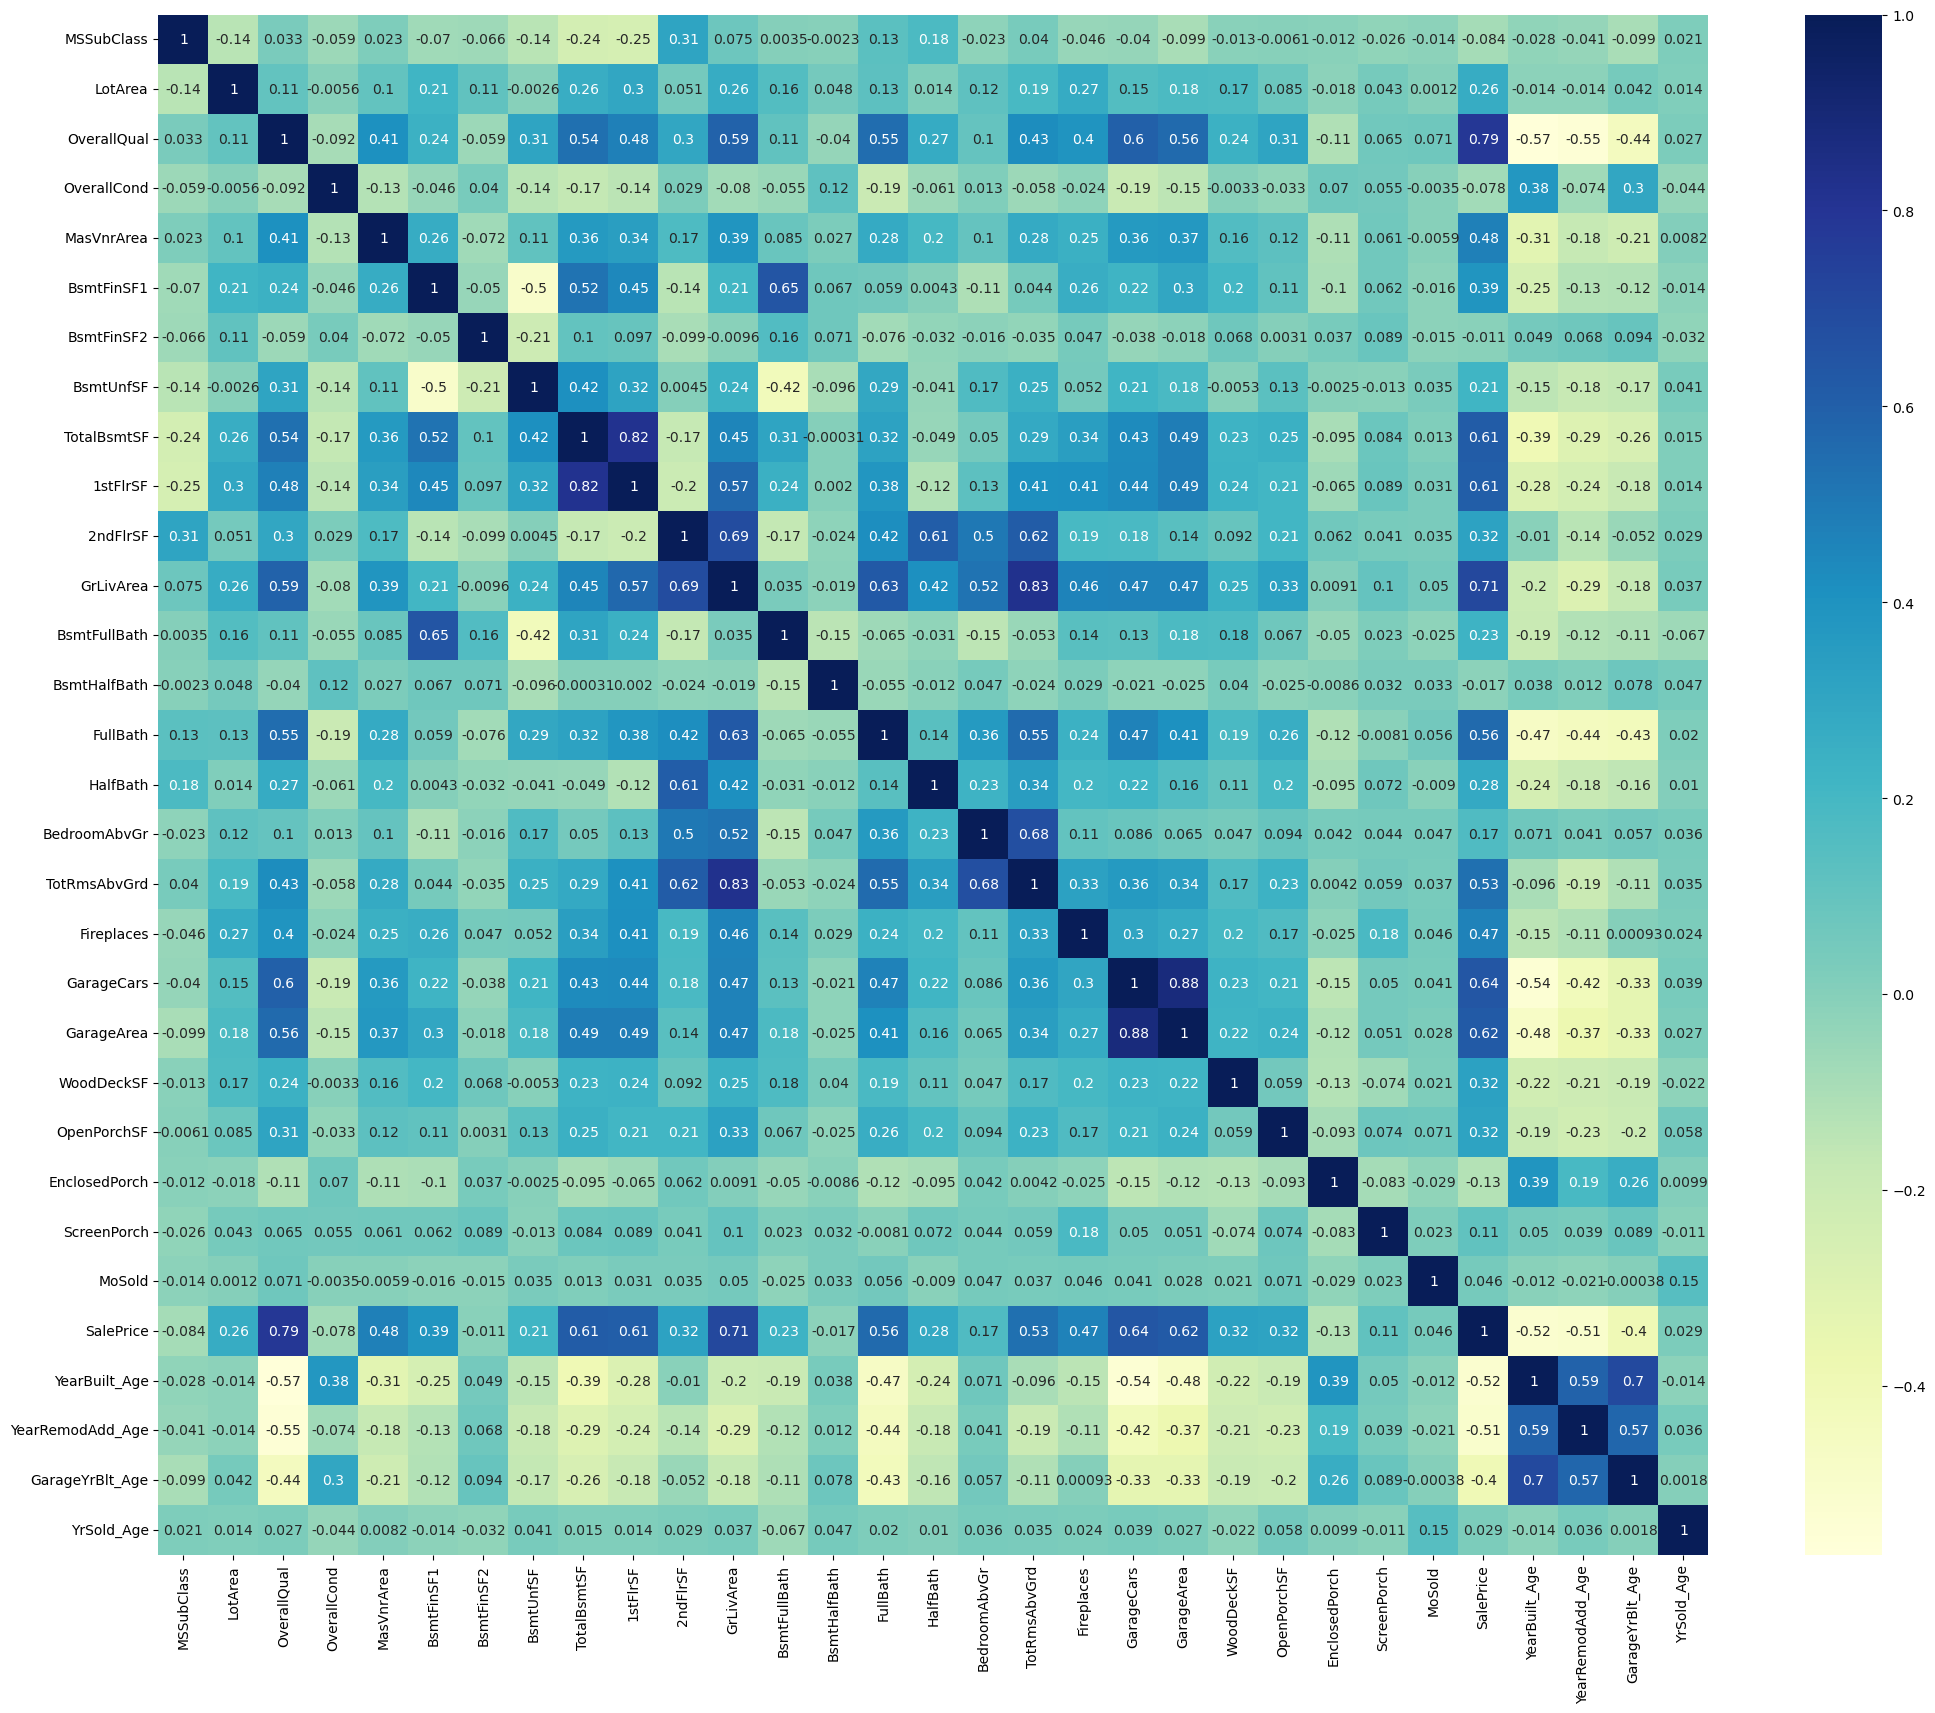

In [1825]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(25,20))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

In [1826]:
#from the heat map we see YrSold_Age,MiscVa are not much corelated with saleprice so droping them.
#There may be some more variables but lets see them further how they contribute to analysis
#Price = Price.drop(['YrSold_Age','MiscVal'], axis = 'columns')

In [1827]:
#lets create the numerica list to see the scatter plot
Numerical_col_list=Price.select_dtypes(include =np.number).columns.tolist()
Numerical_col_list.remove('SalePrice')


In [1828]:
Numerical_col_list

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'MoSold',
 'YearBuilt_Age',
 'YearRemodAdd_Age',
 'GarageYrBlt_Age',
 'YrSold_Age']

In [1829]:
#lets create the catagorial list to plot the box plots
Catagorial_col_list=Price.select_dtypes(include =np.object_).columns.tolist()

In [1830]:
Catagorial_col_list

['MSZoning',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [1831]:
def numericColPlots(df, index,Predictor ,target):
    plt.figure(figsize = (15, 15))
    plt.figure(index)
    sns.scatterplot(data=df, x=Predictor, y=target)

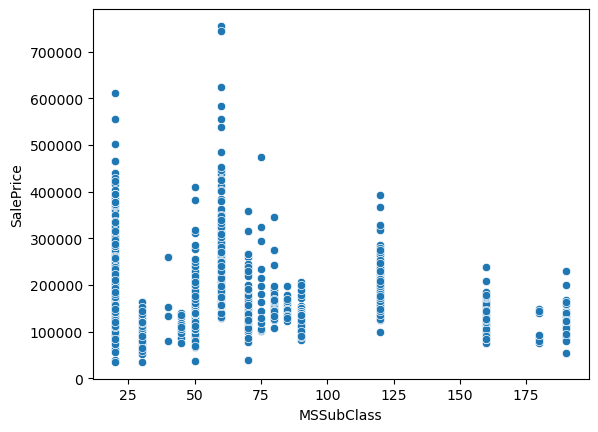

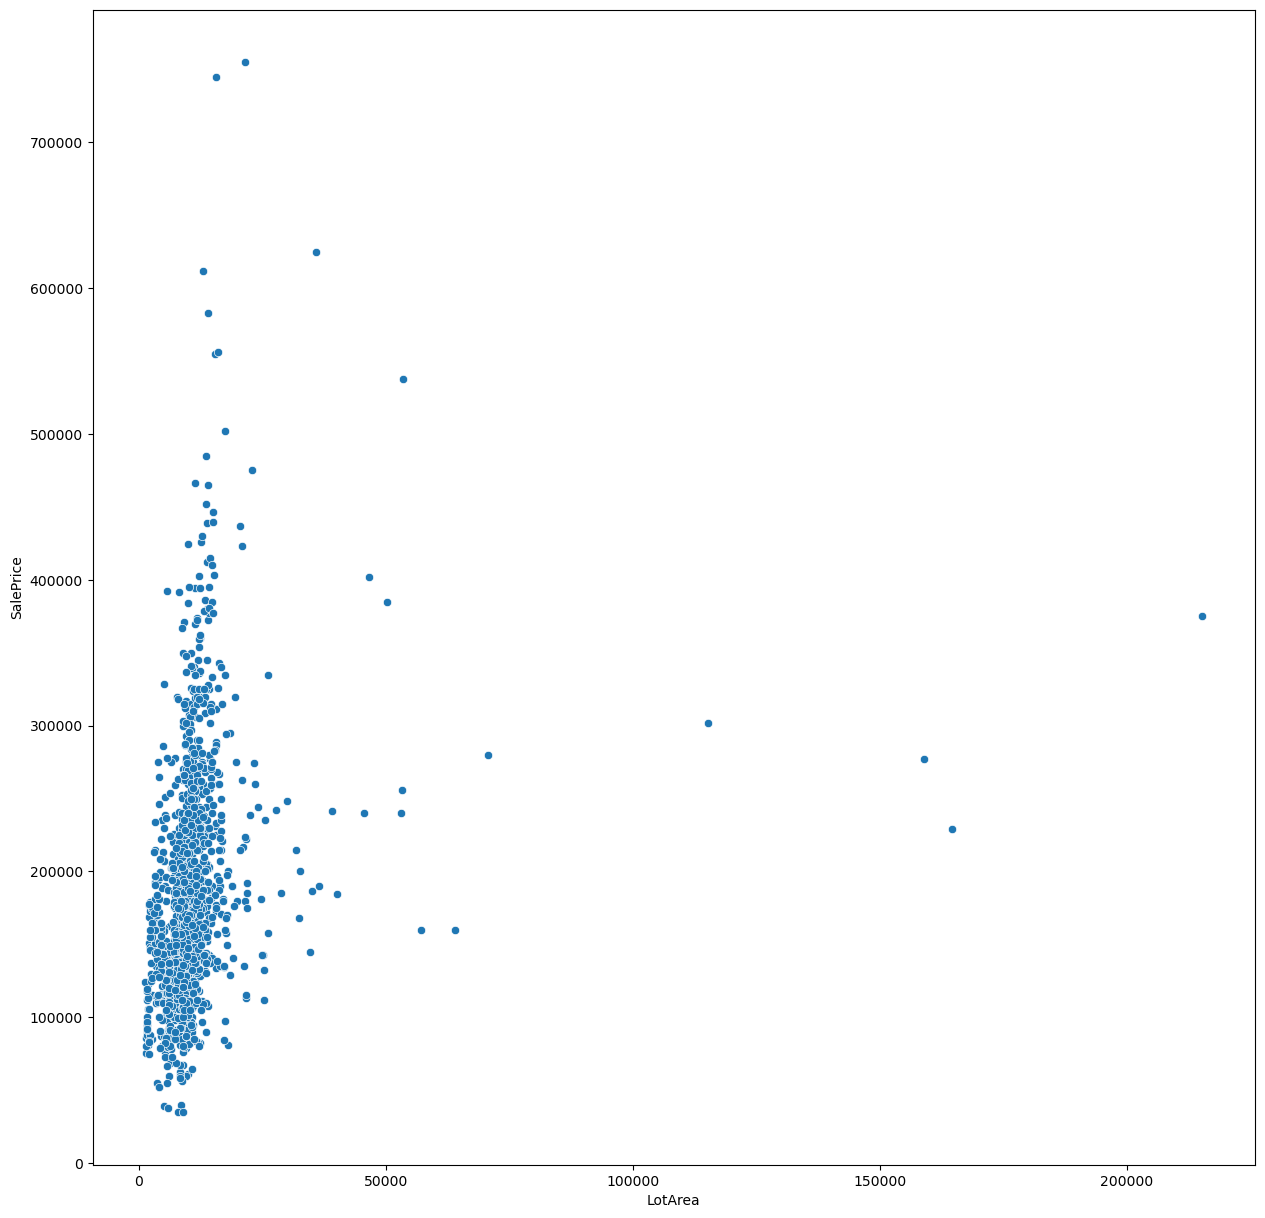

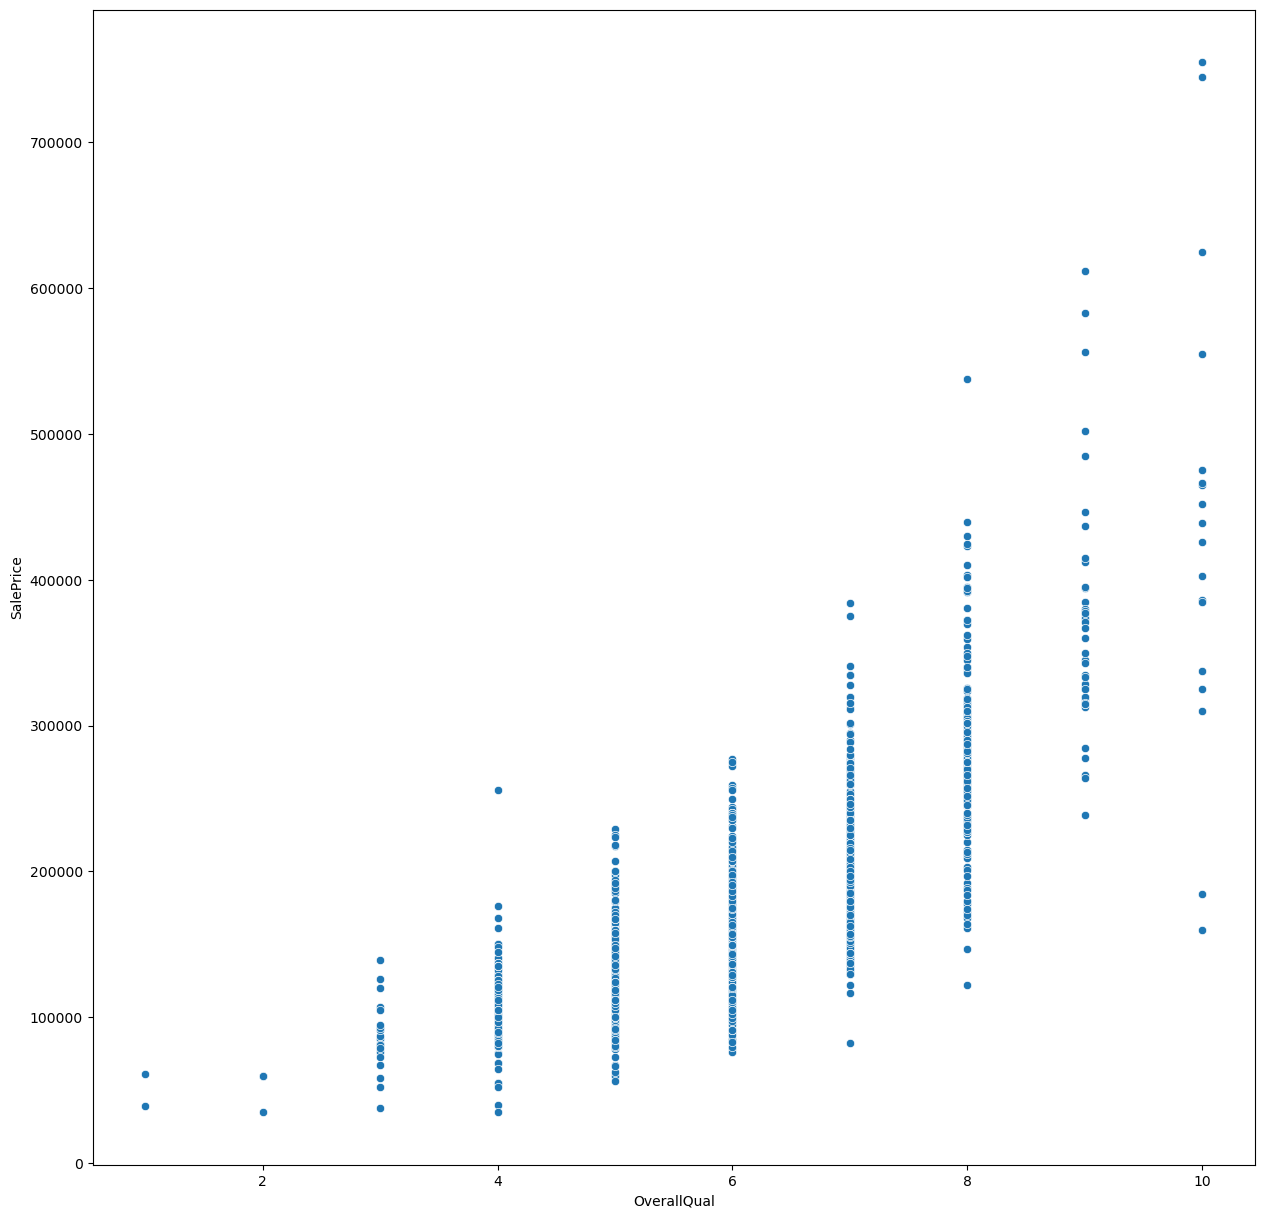

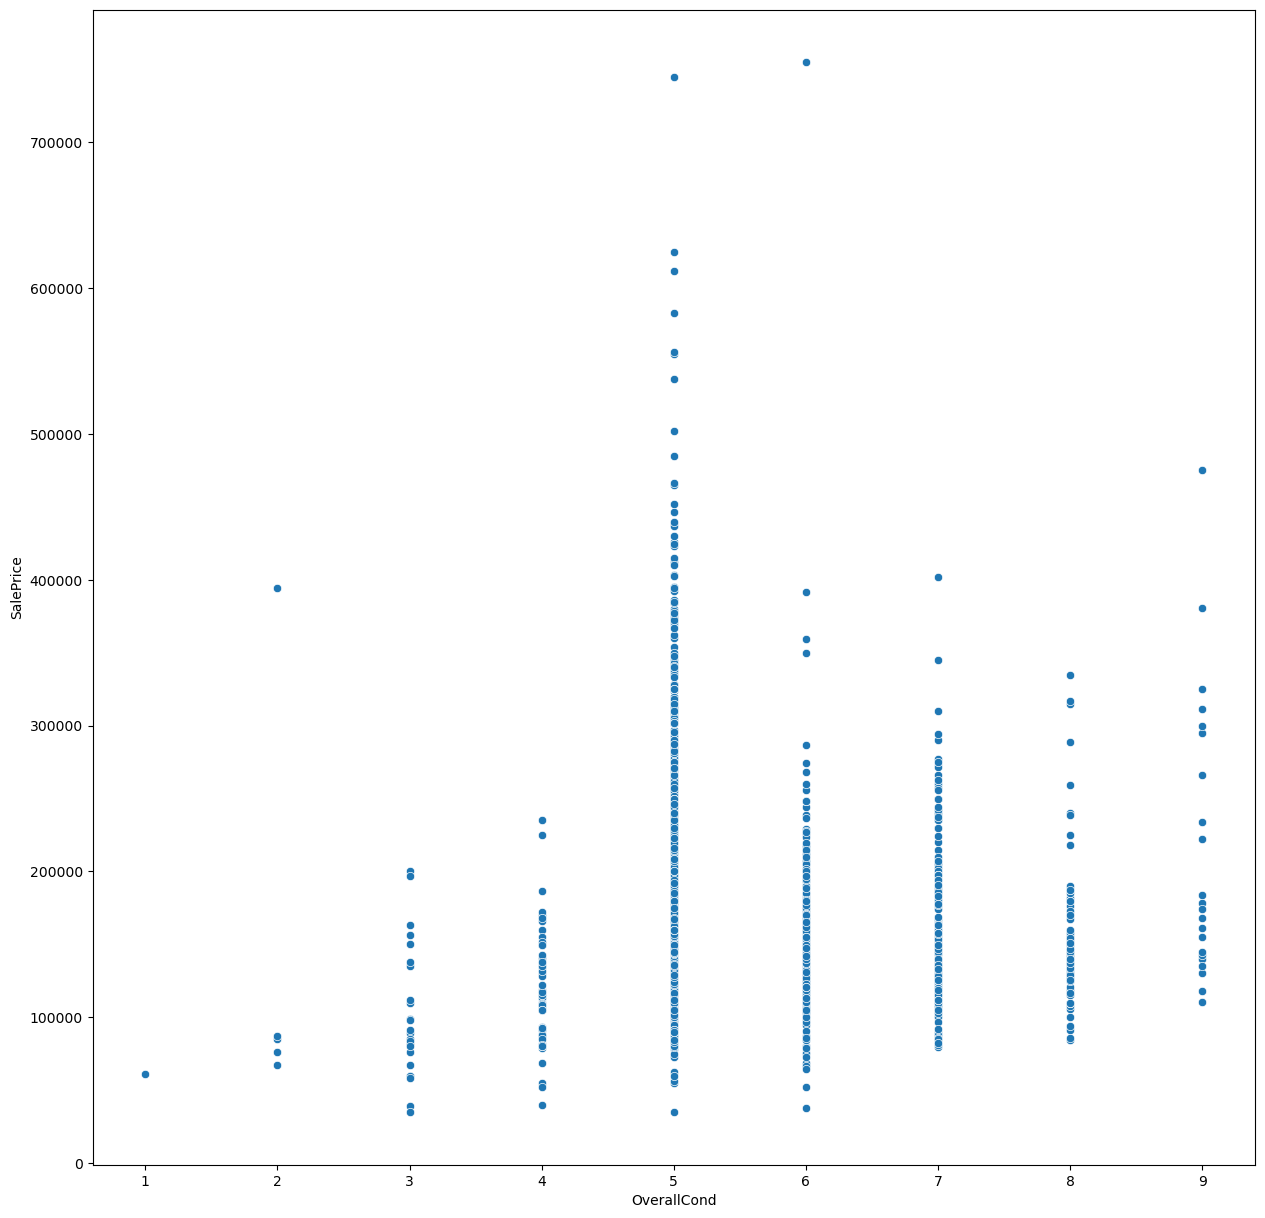

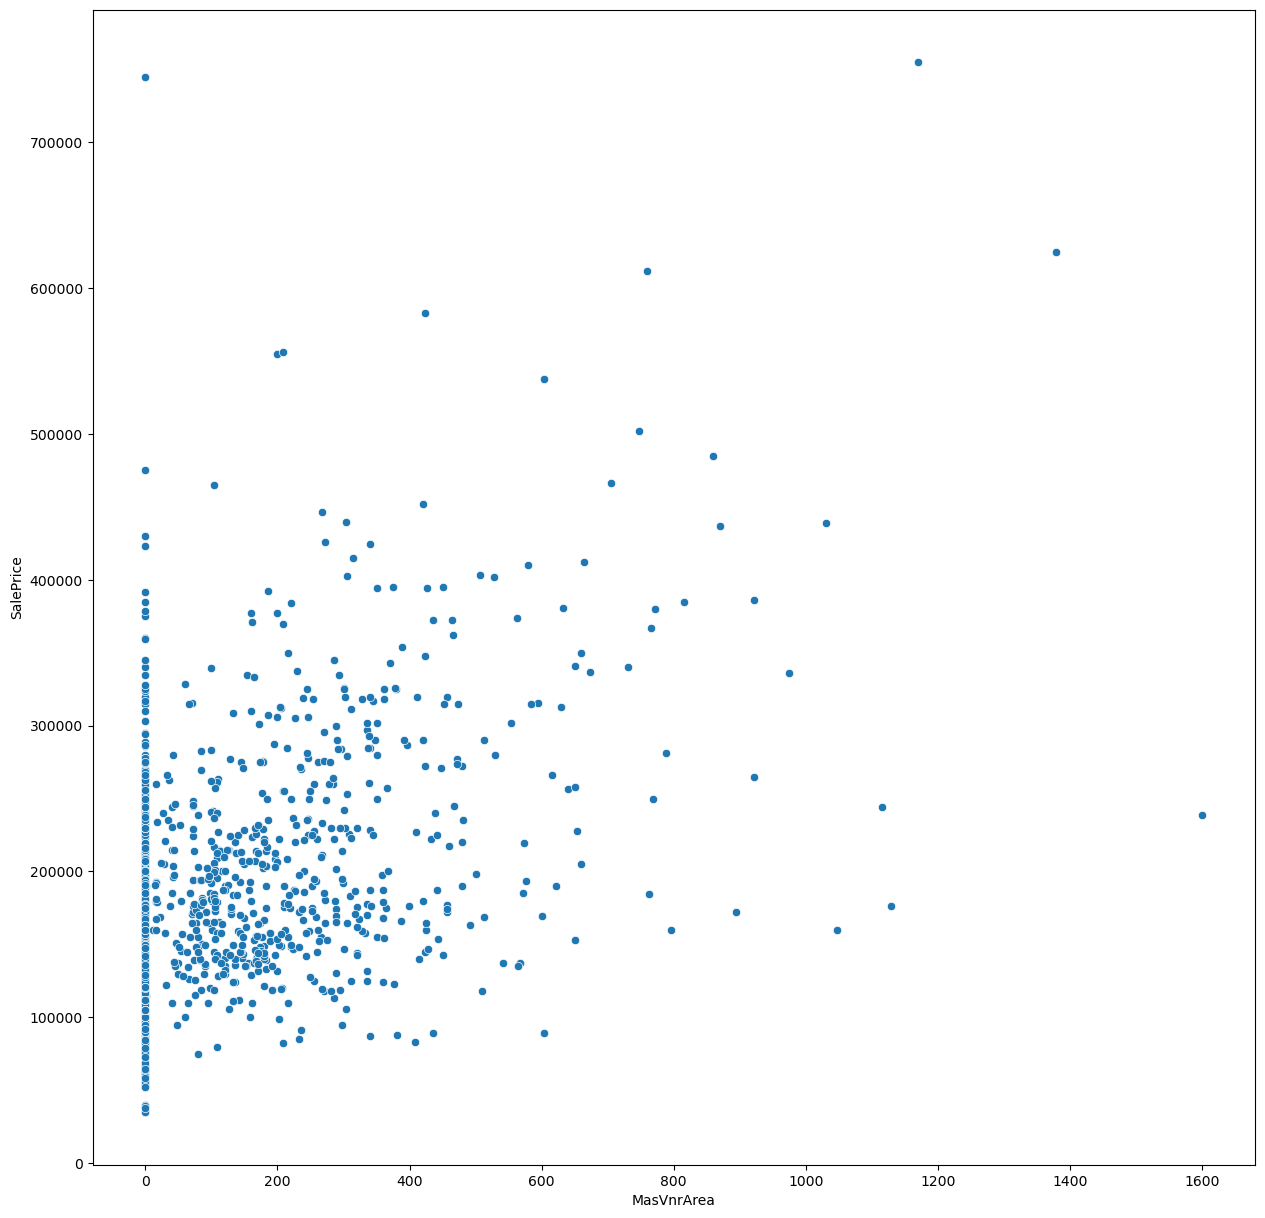

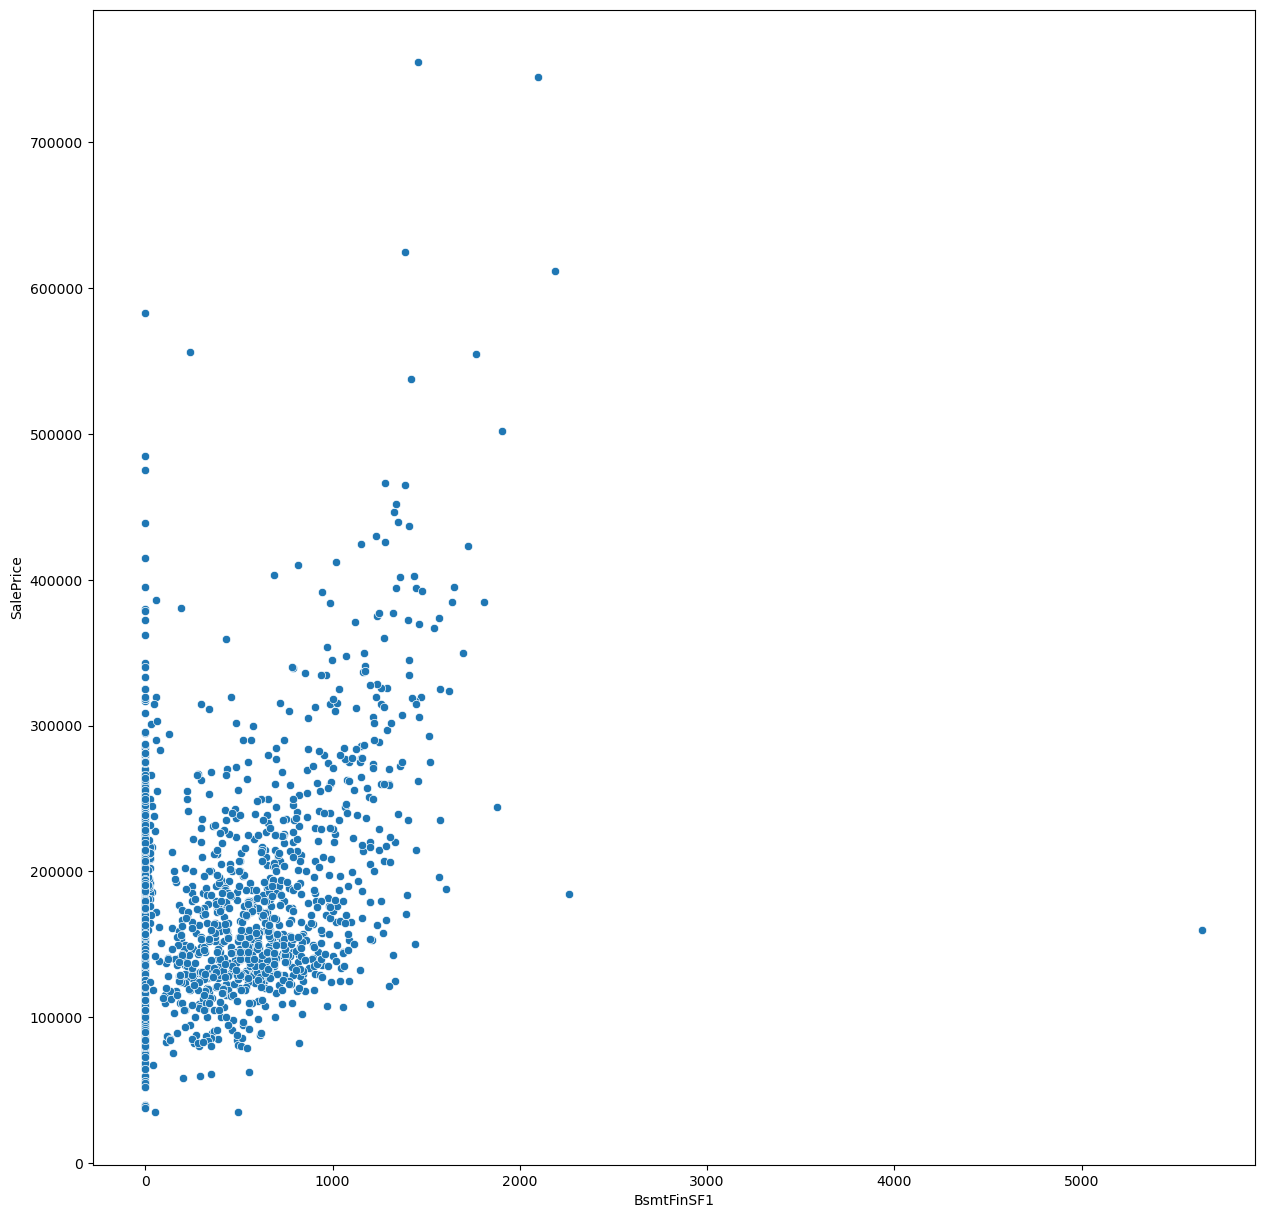

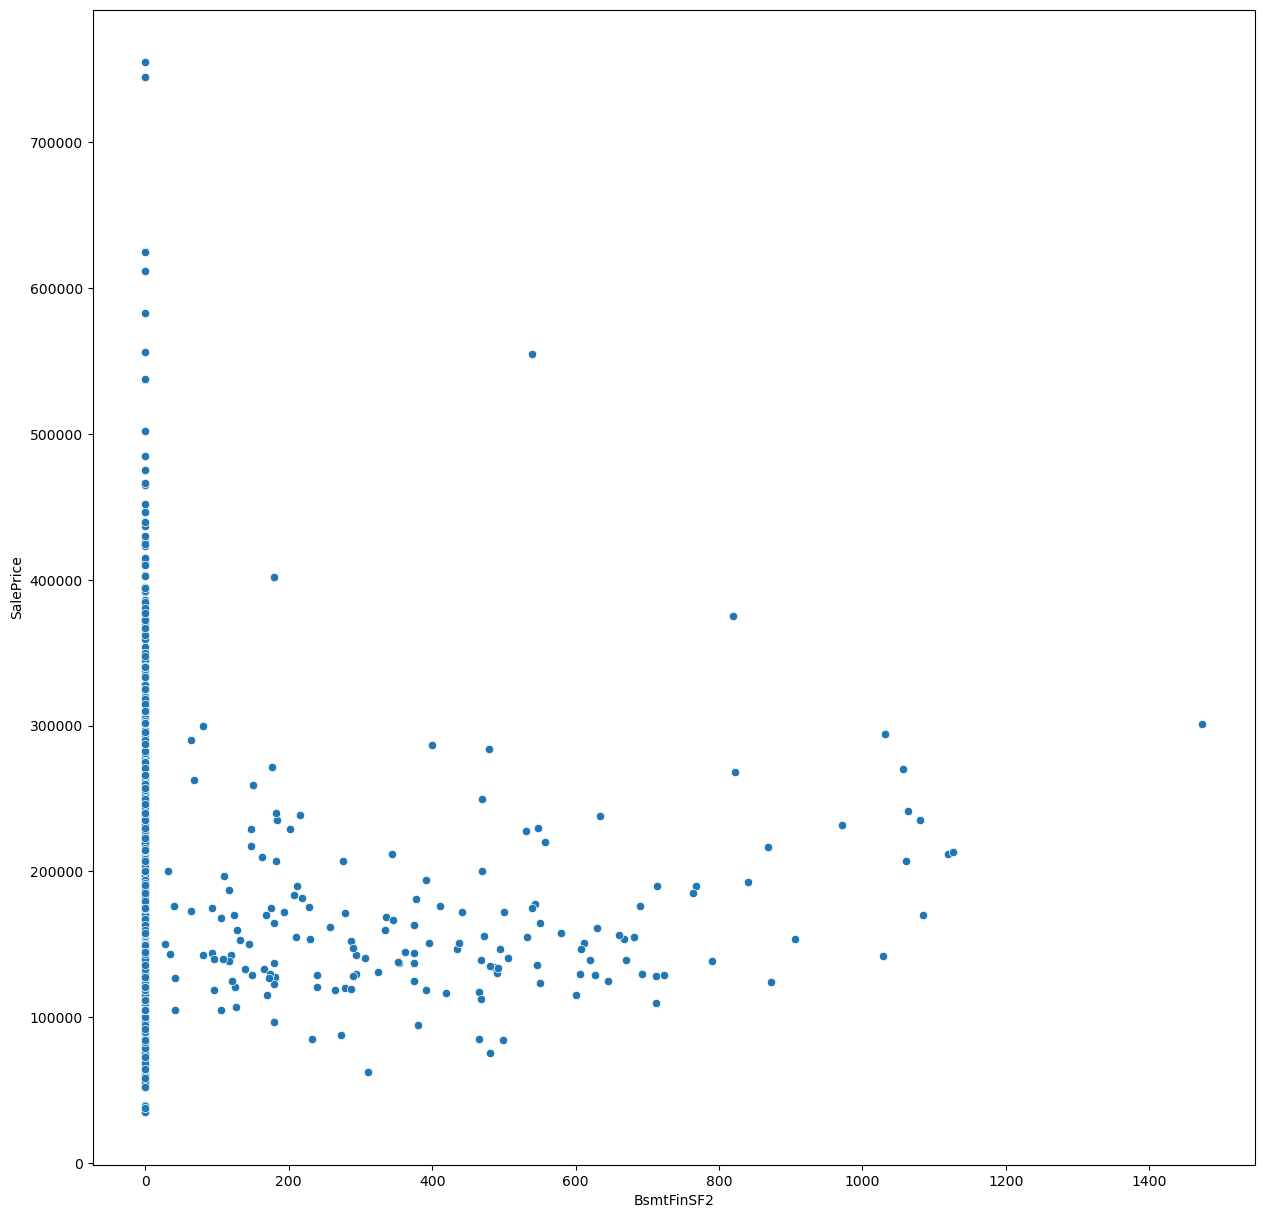

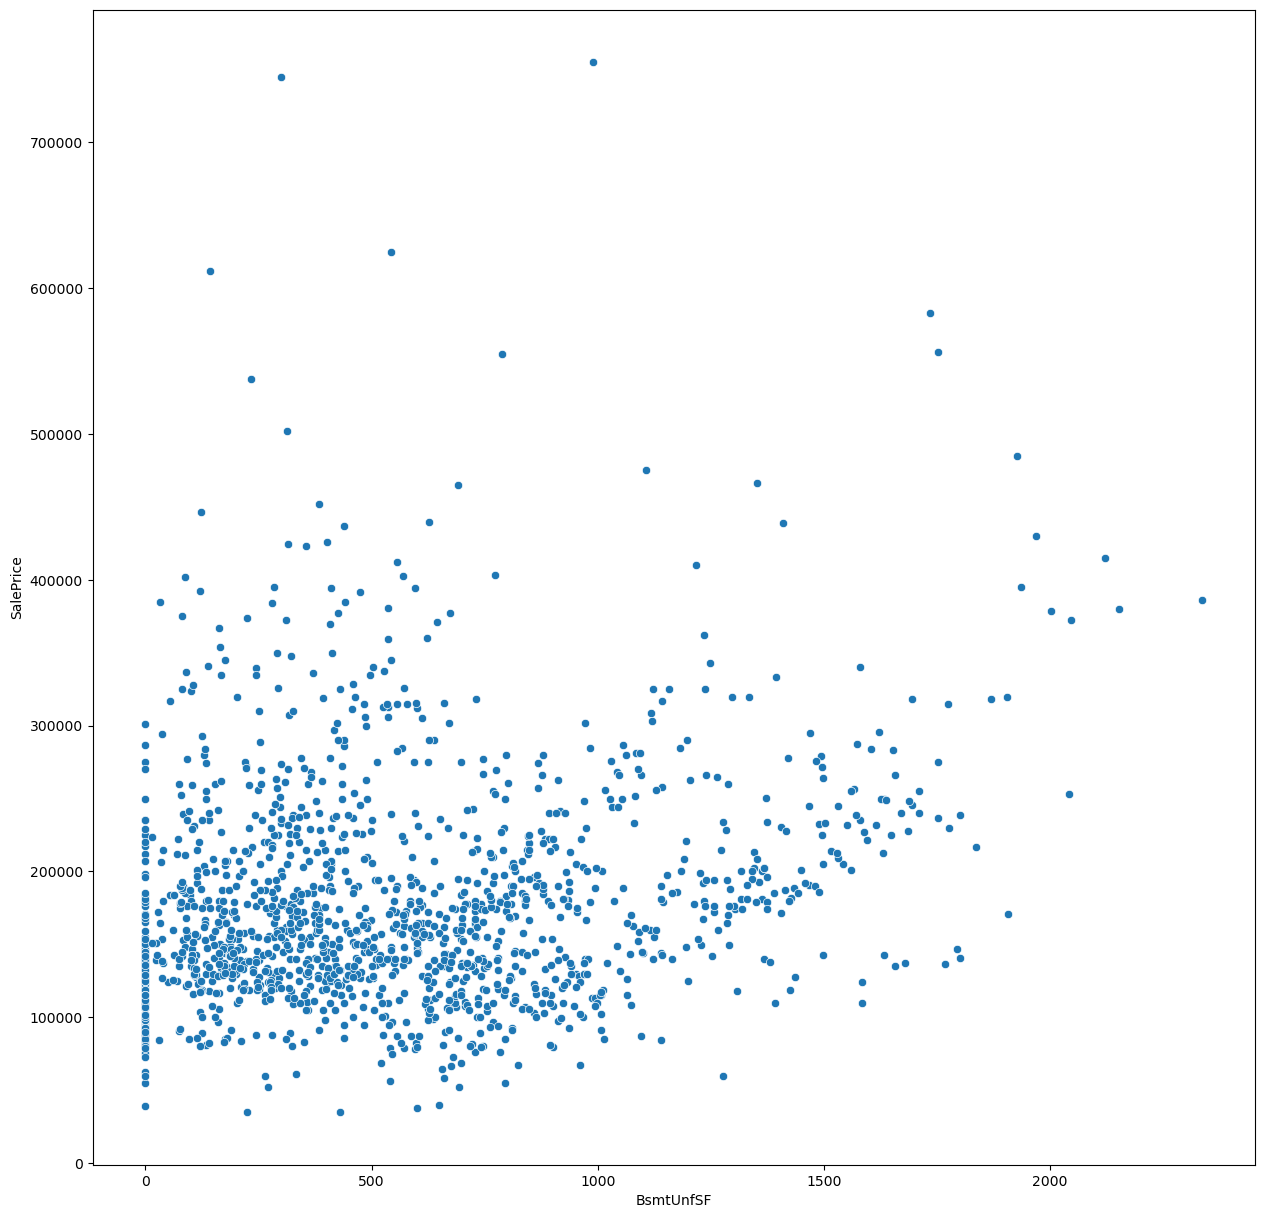

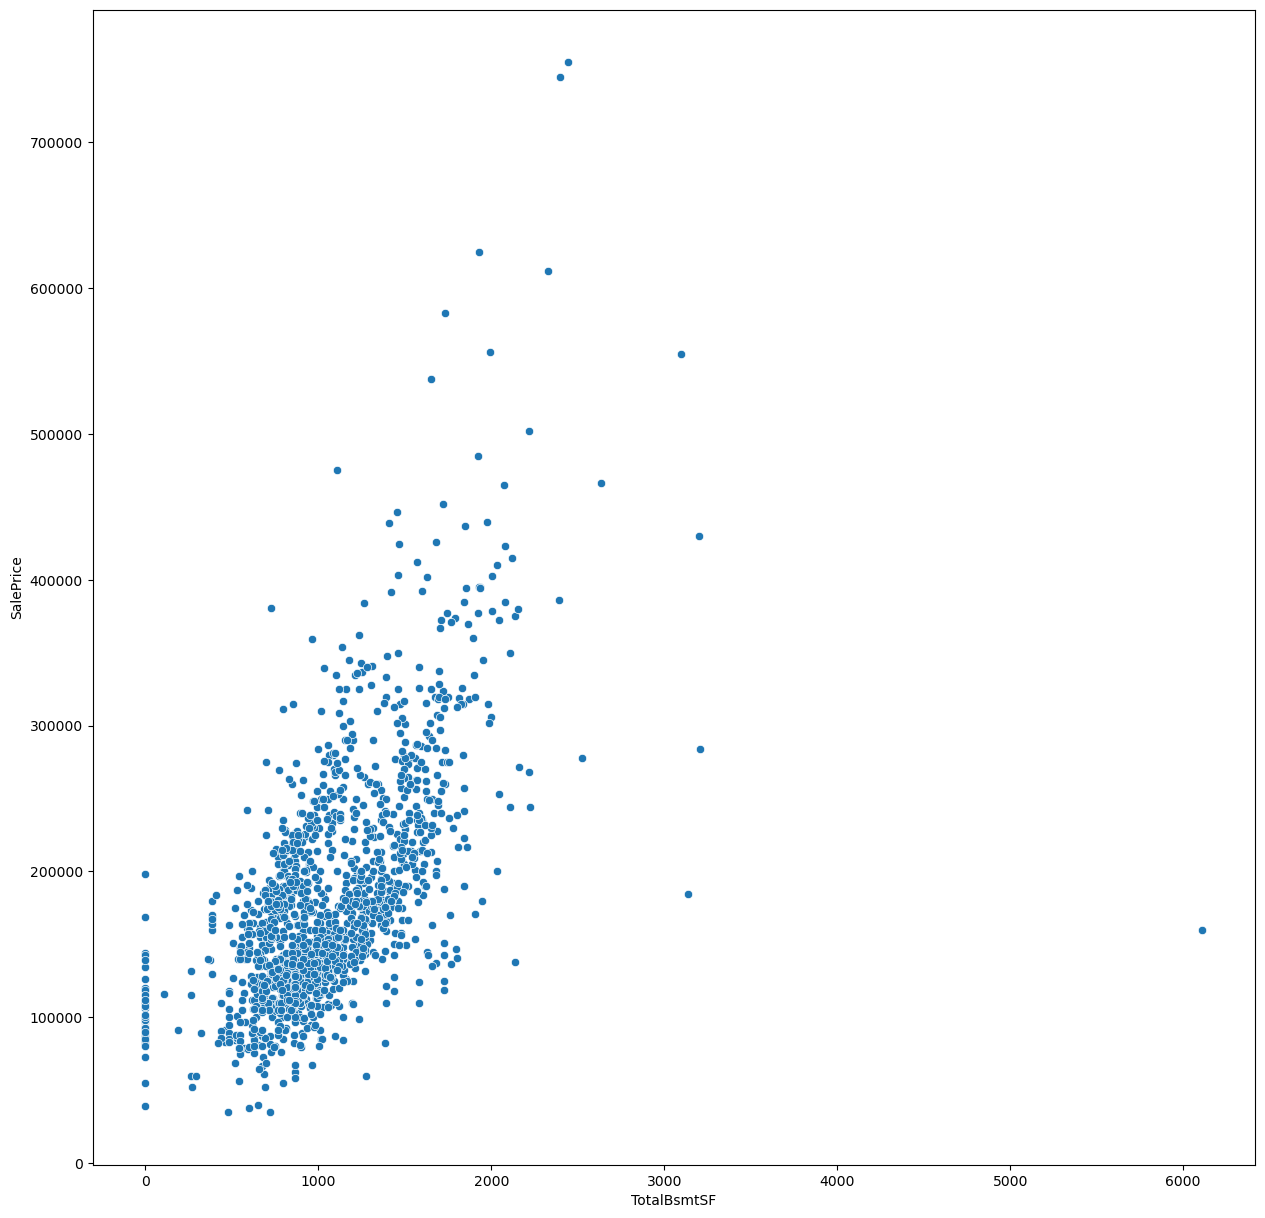

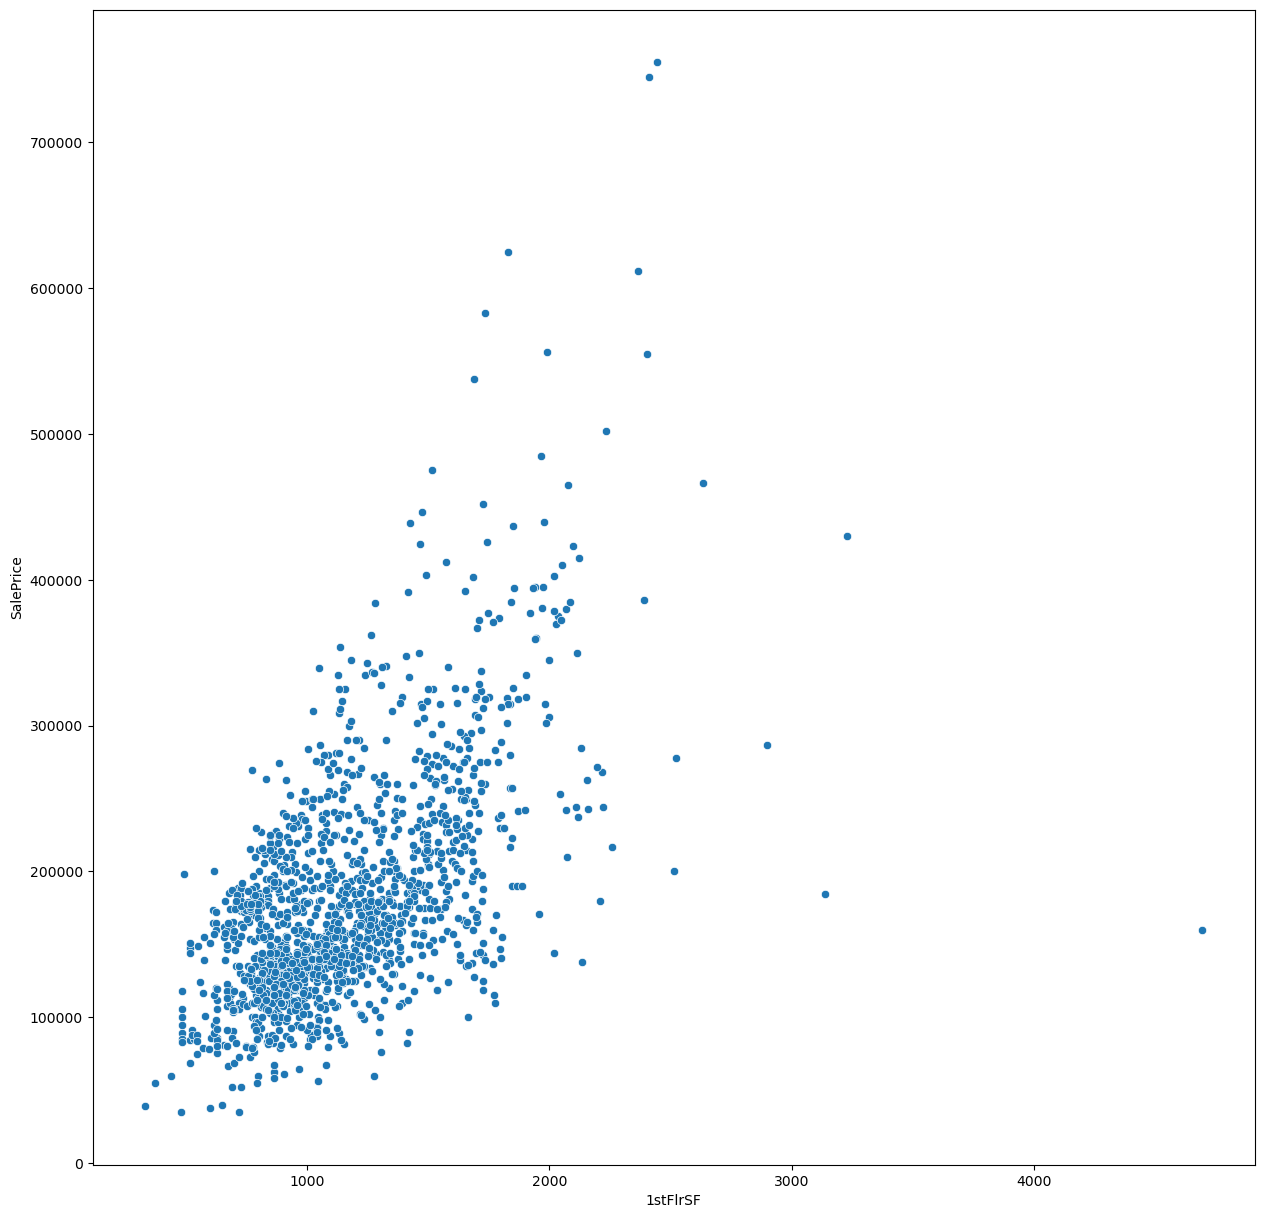

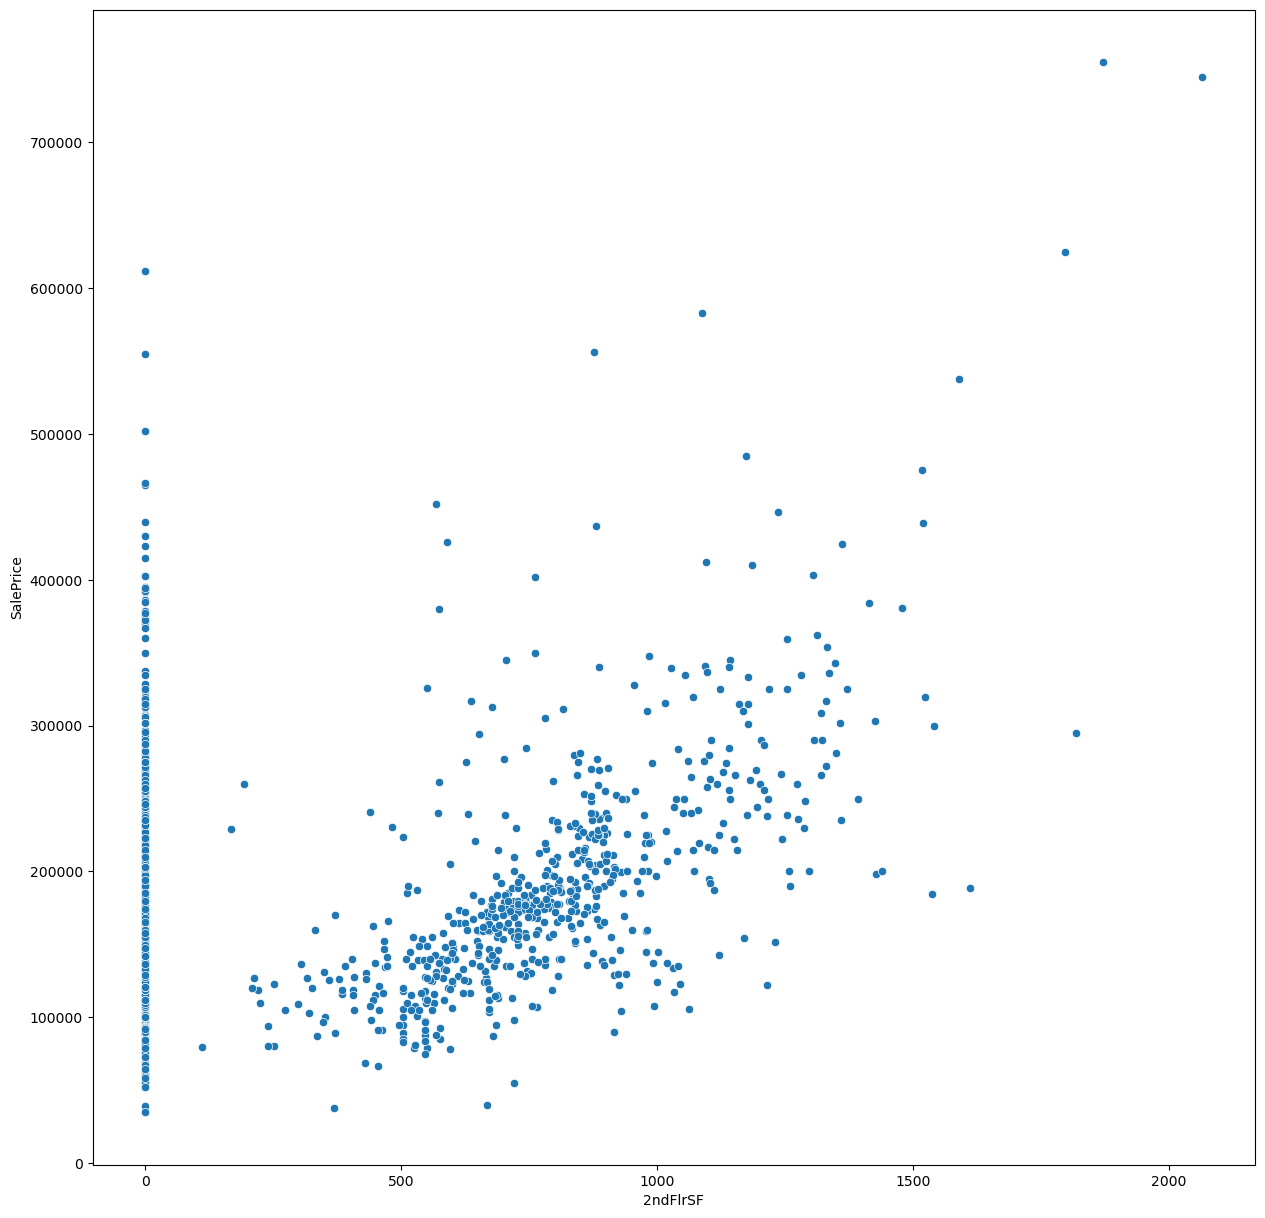

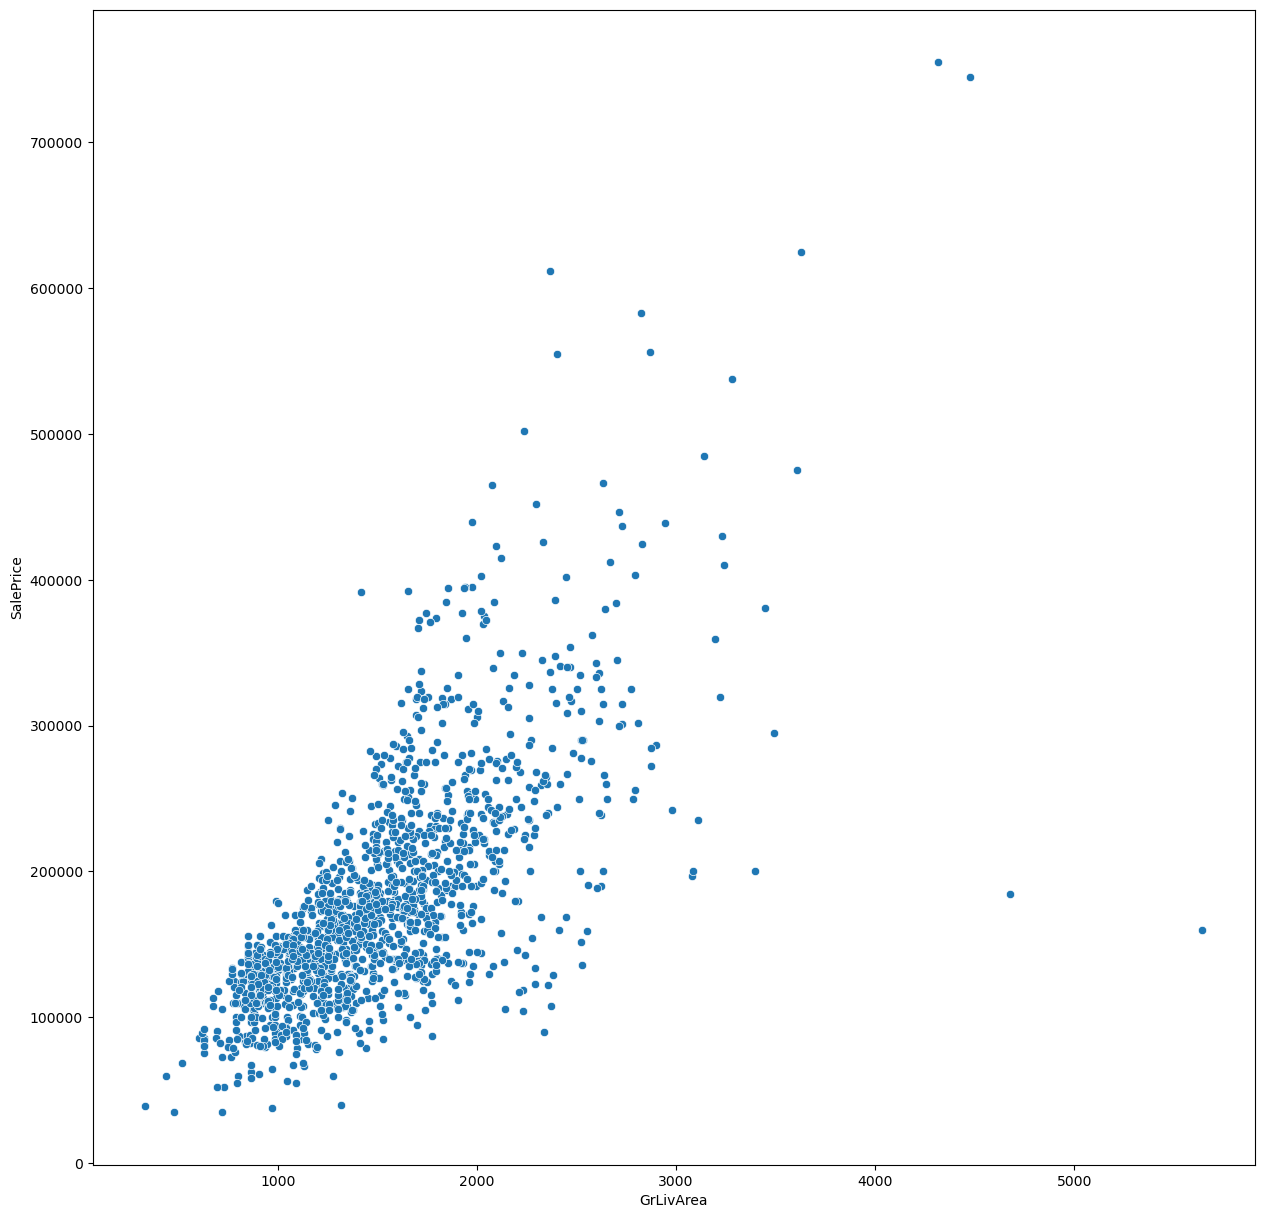

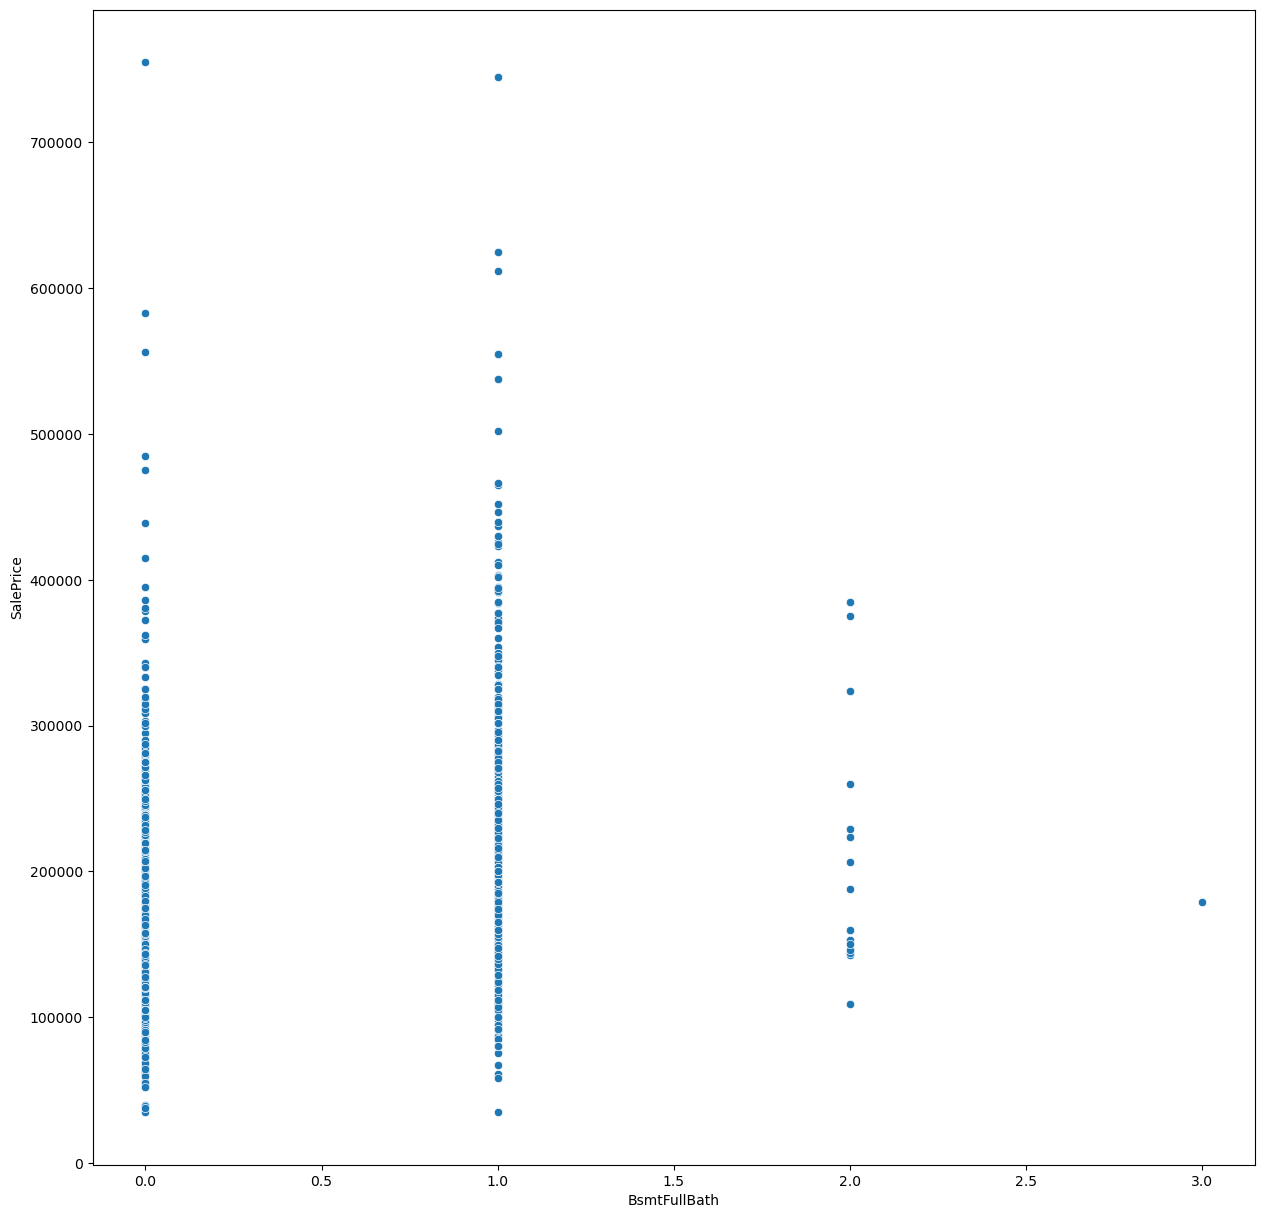

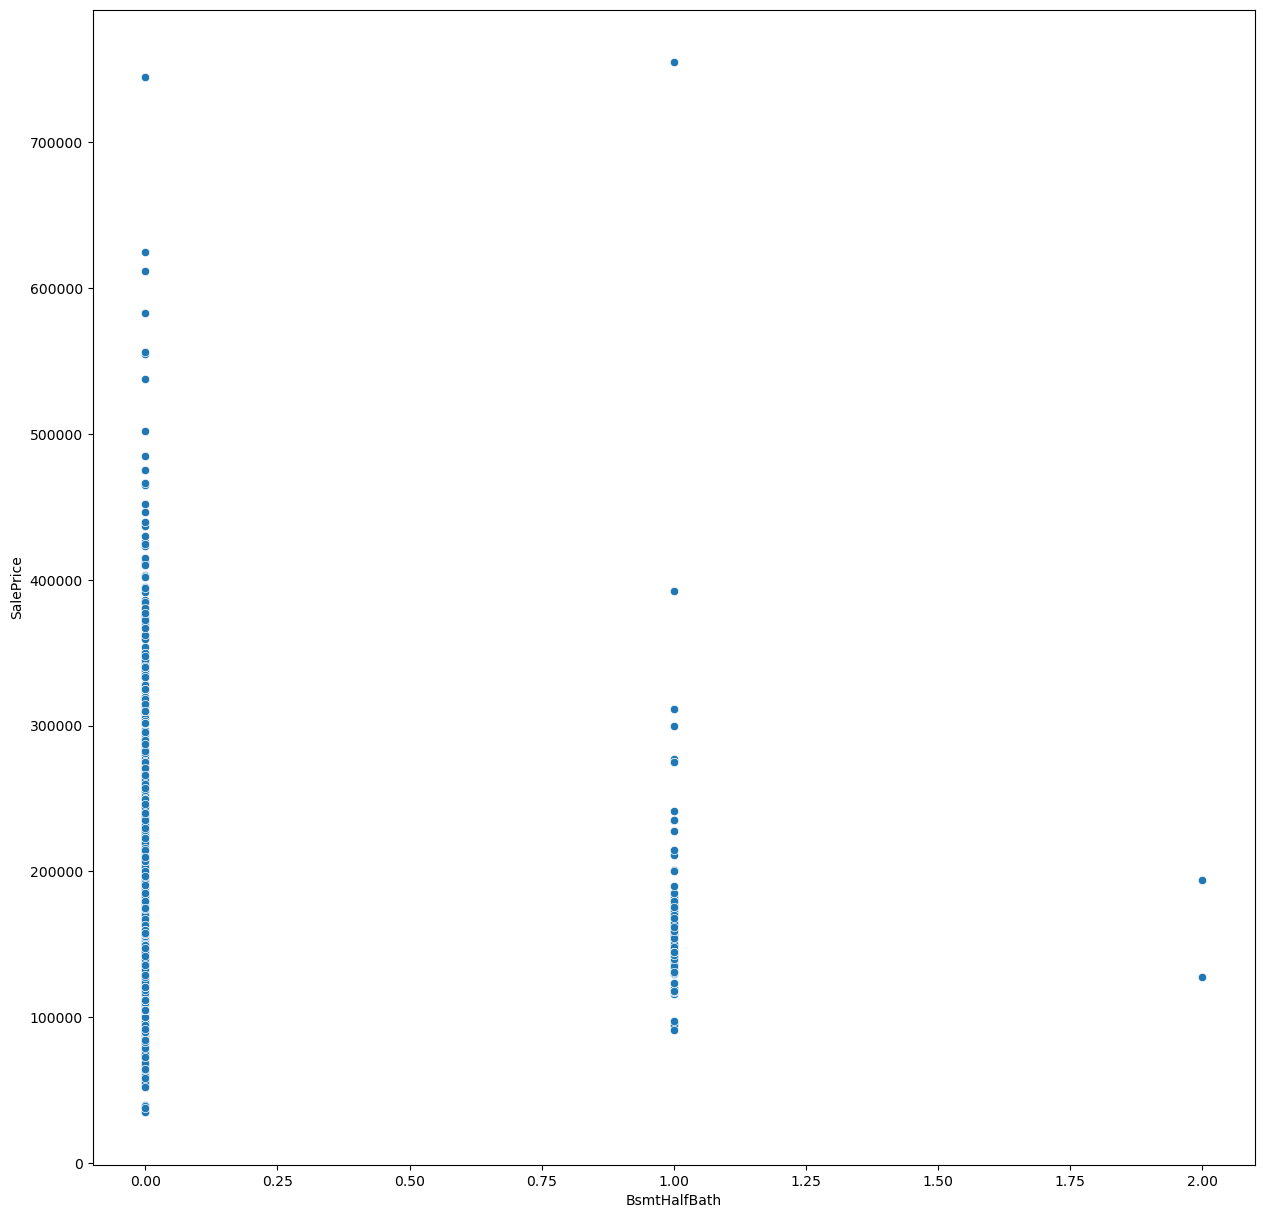

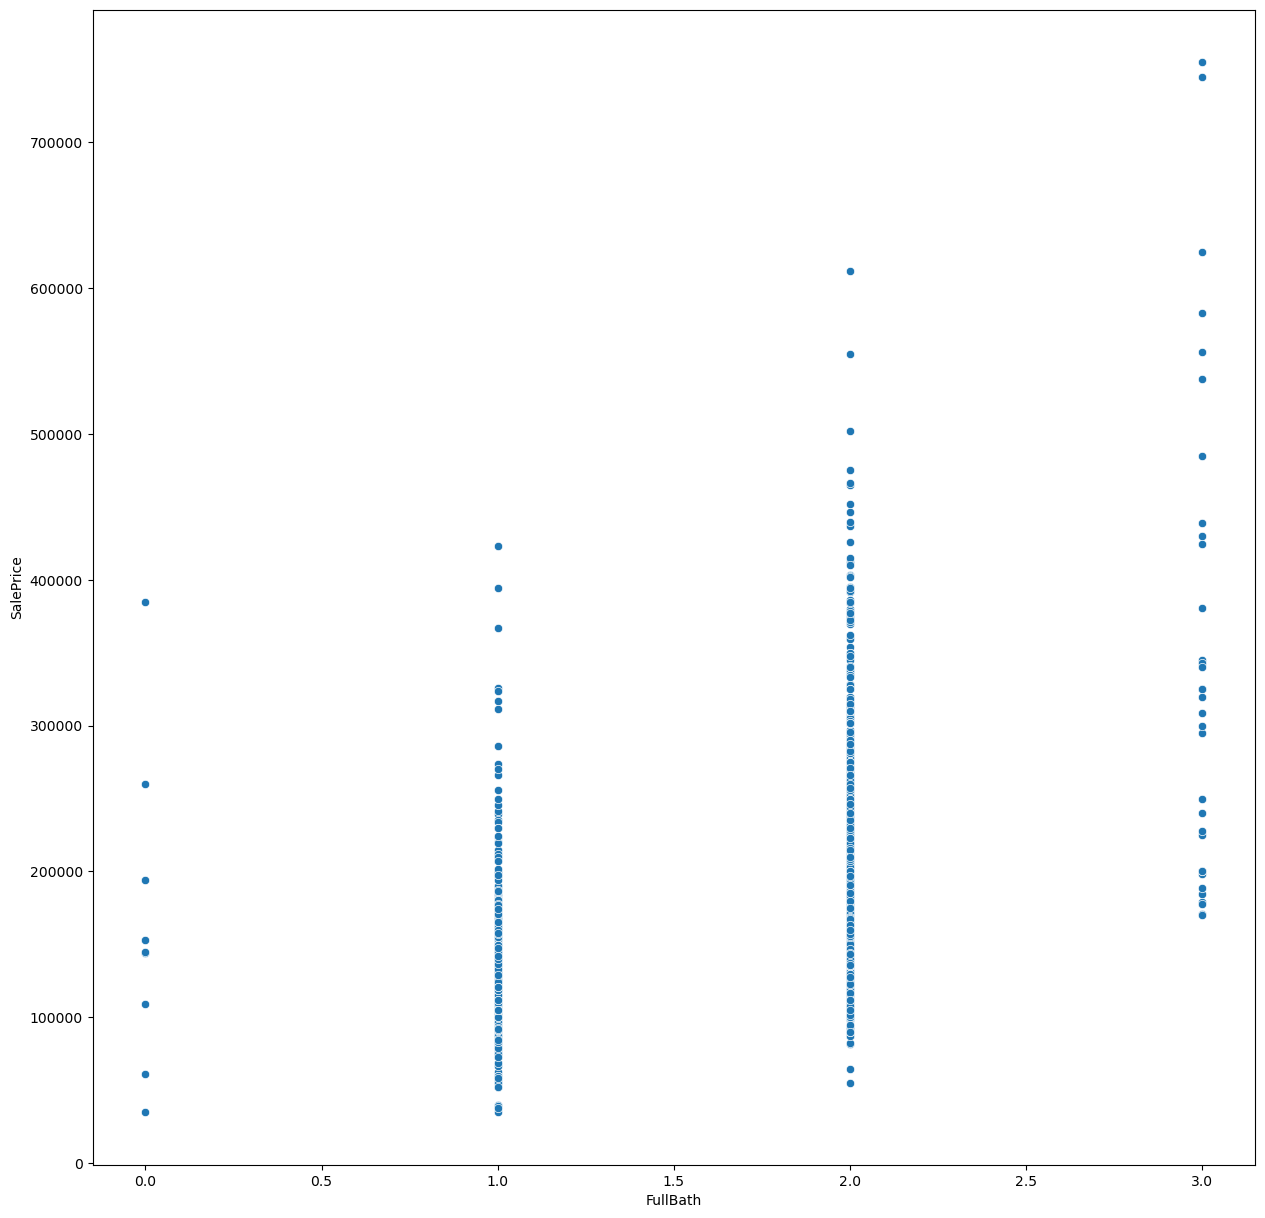

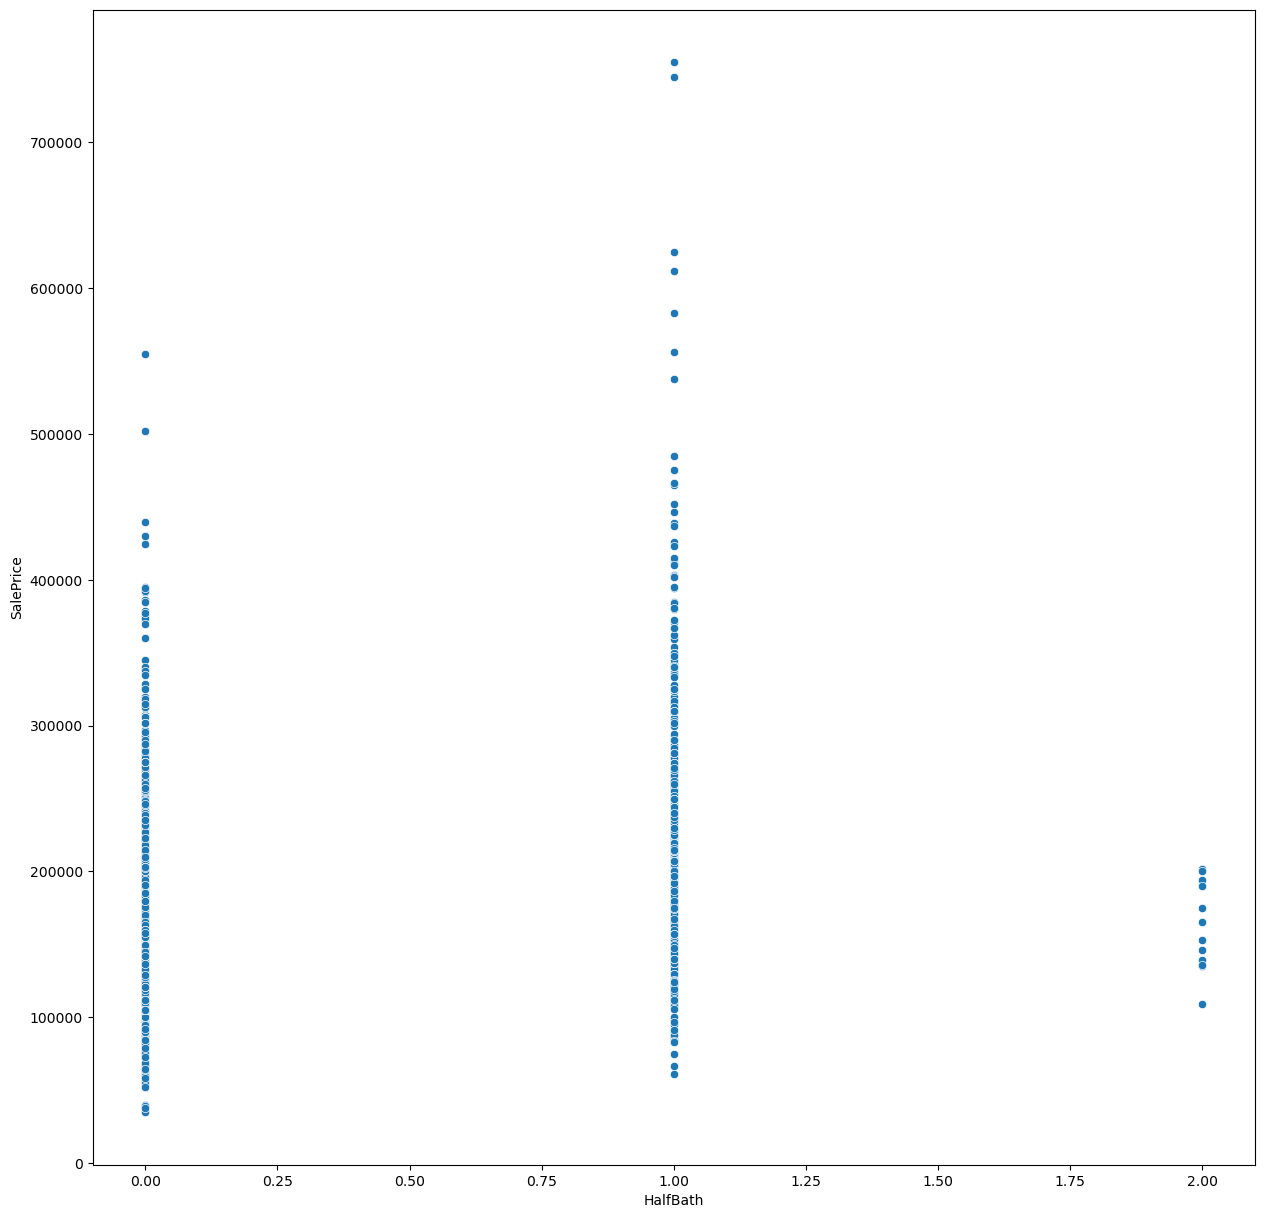

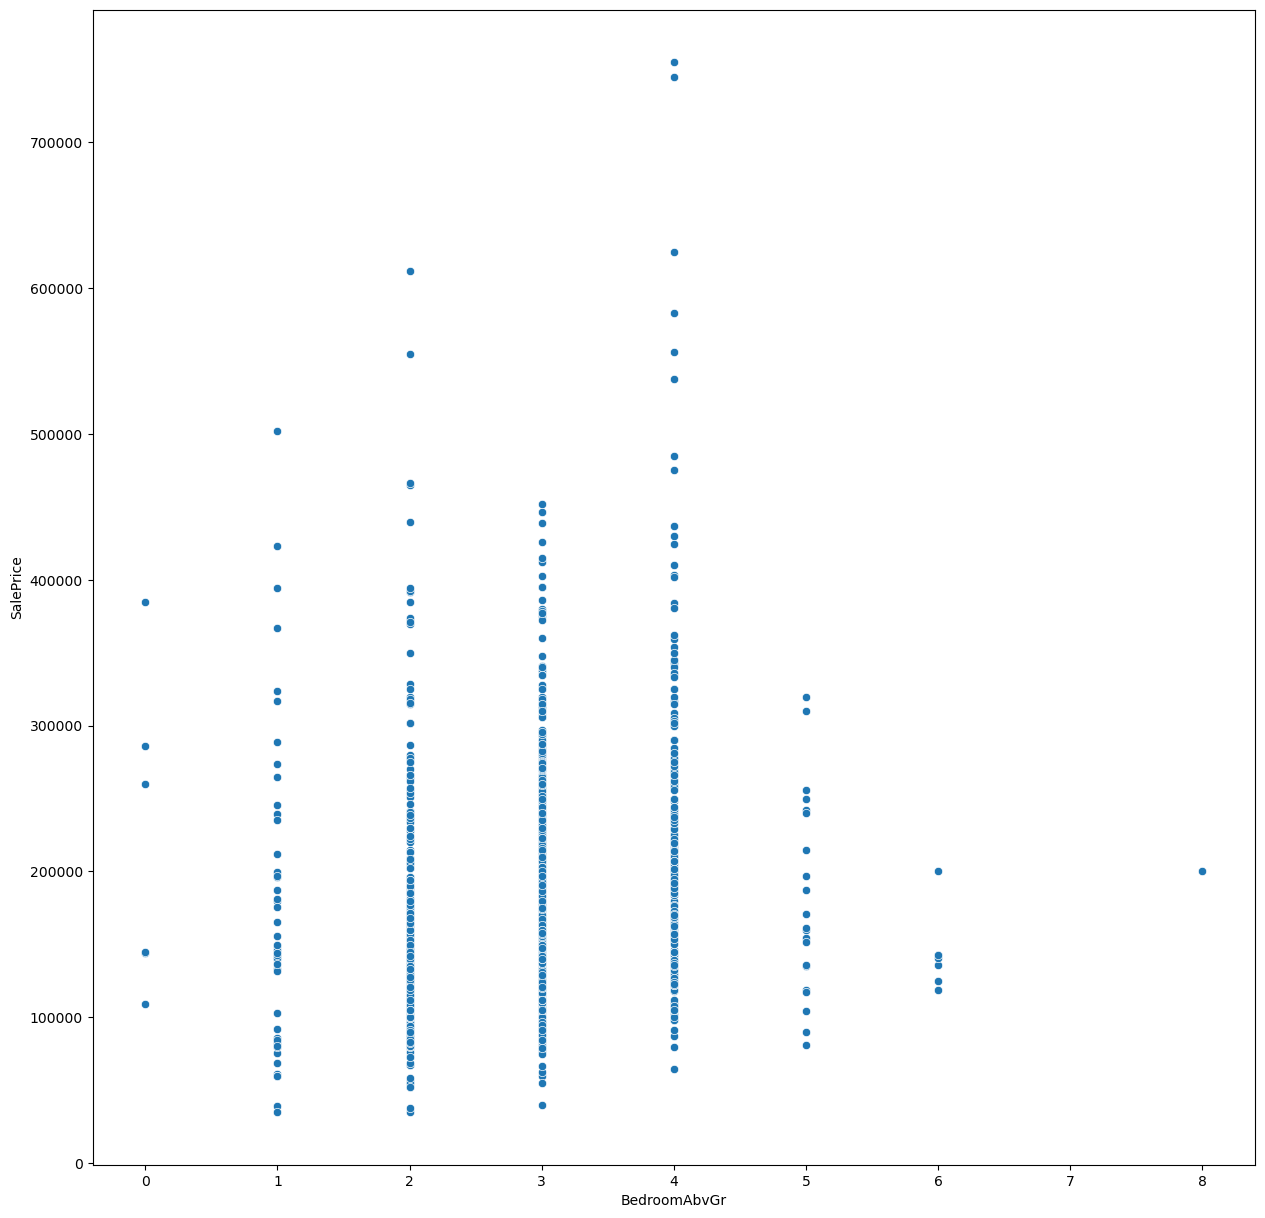

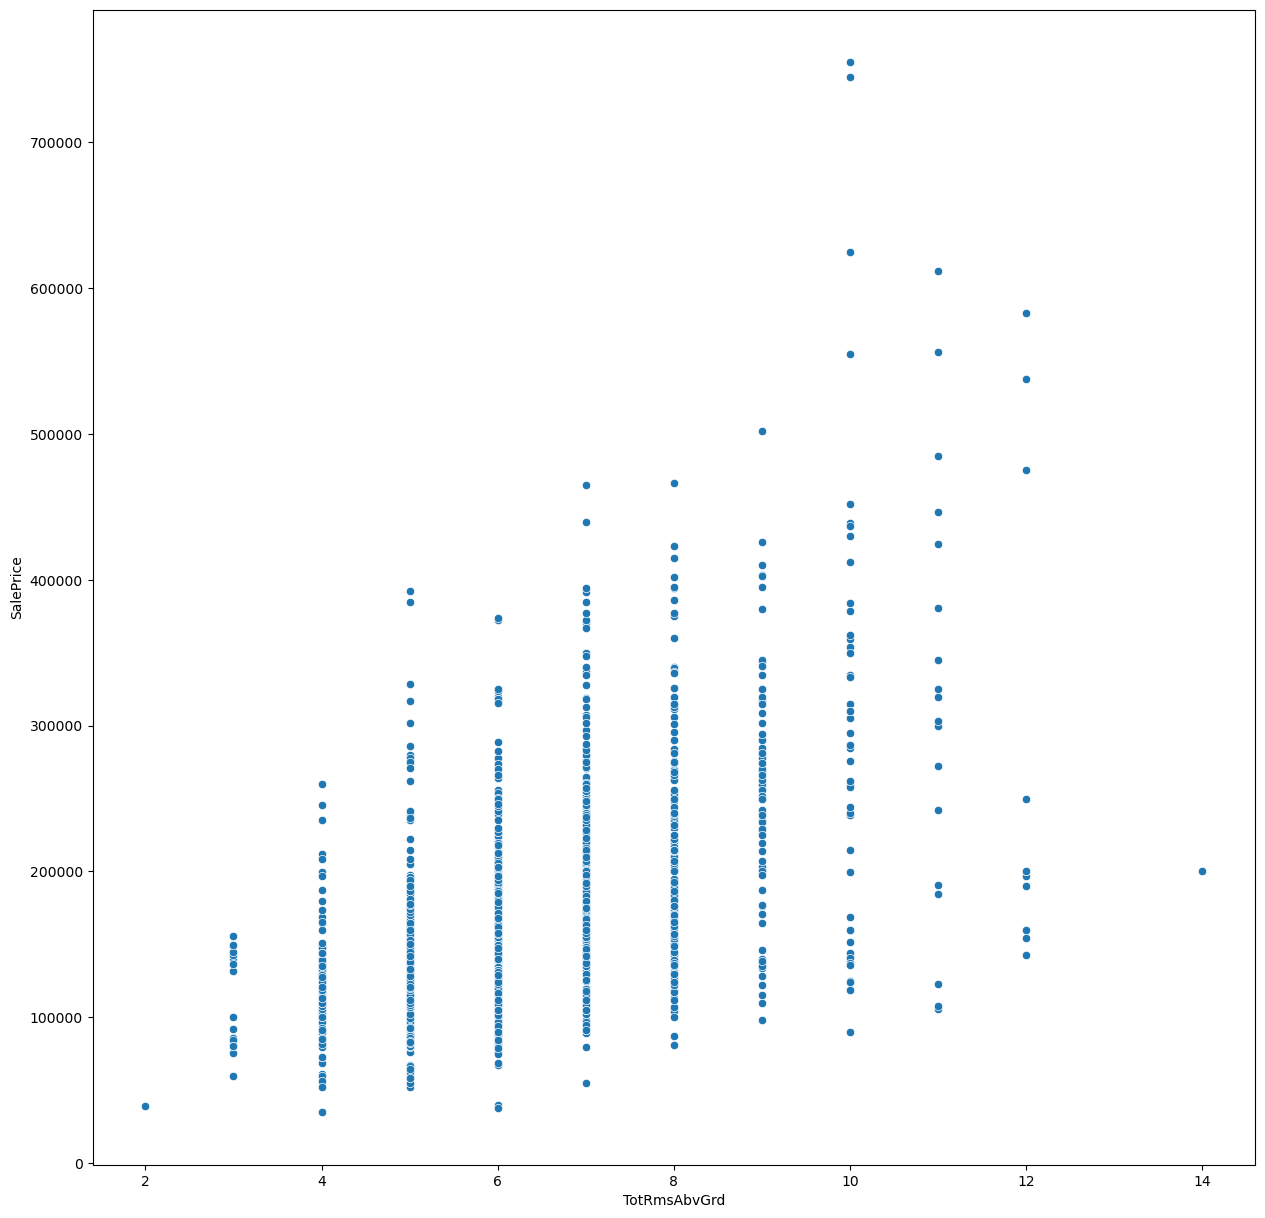

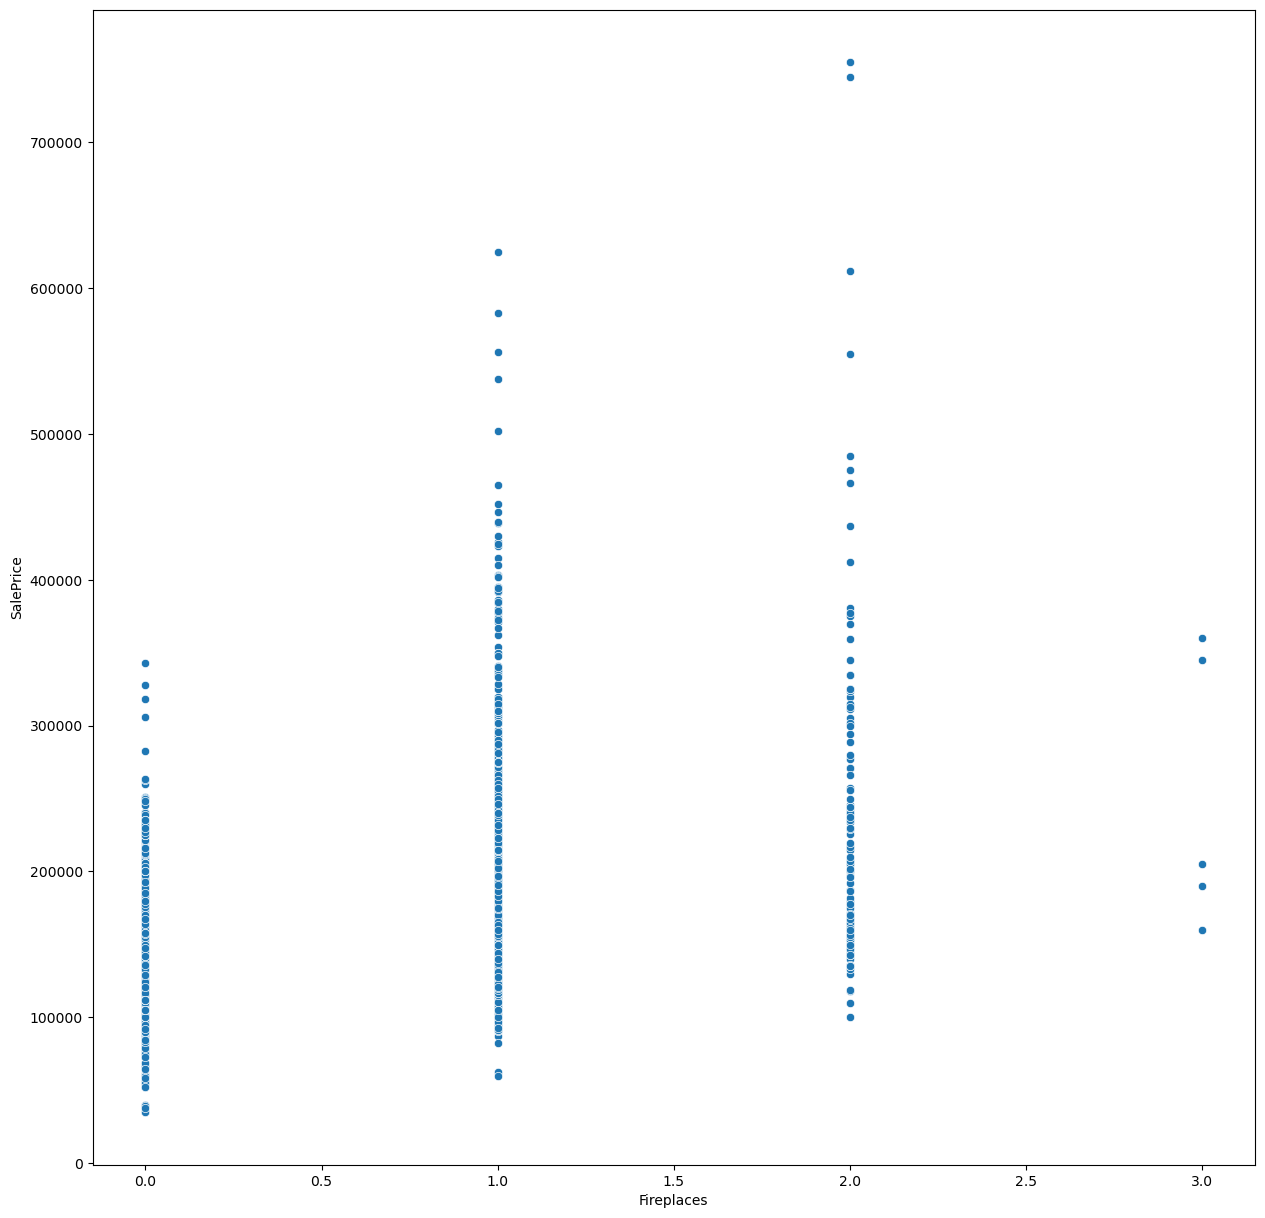

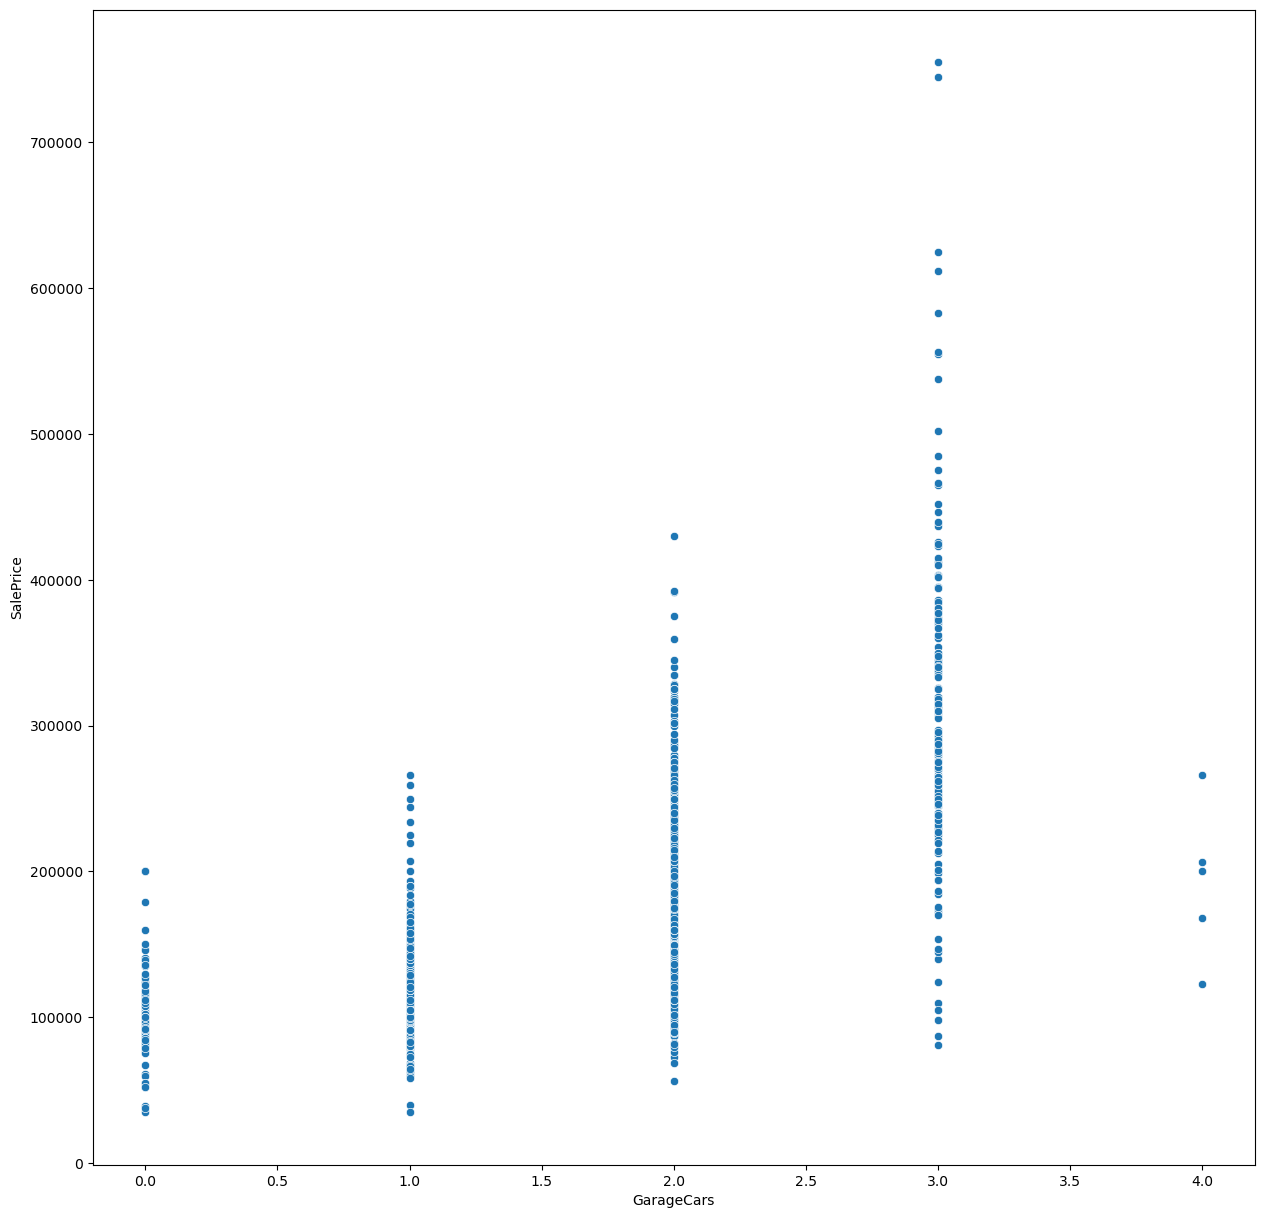

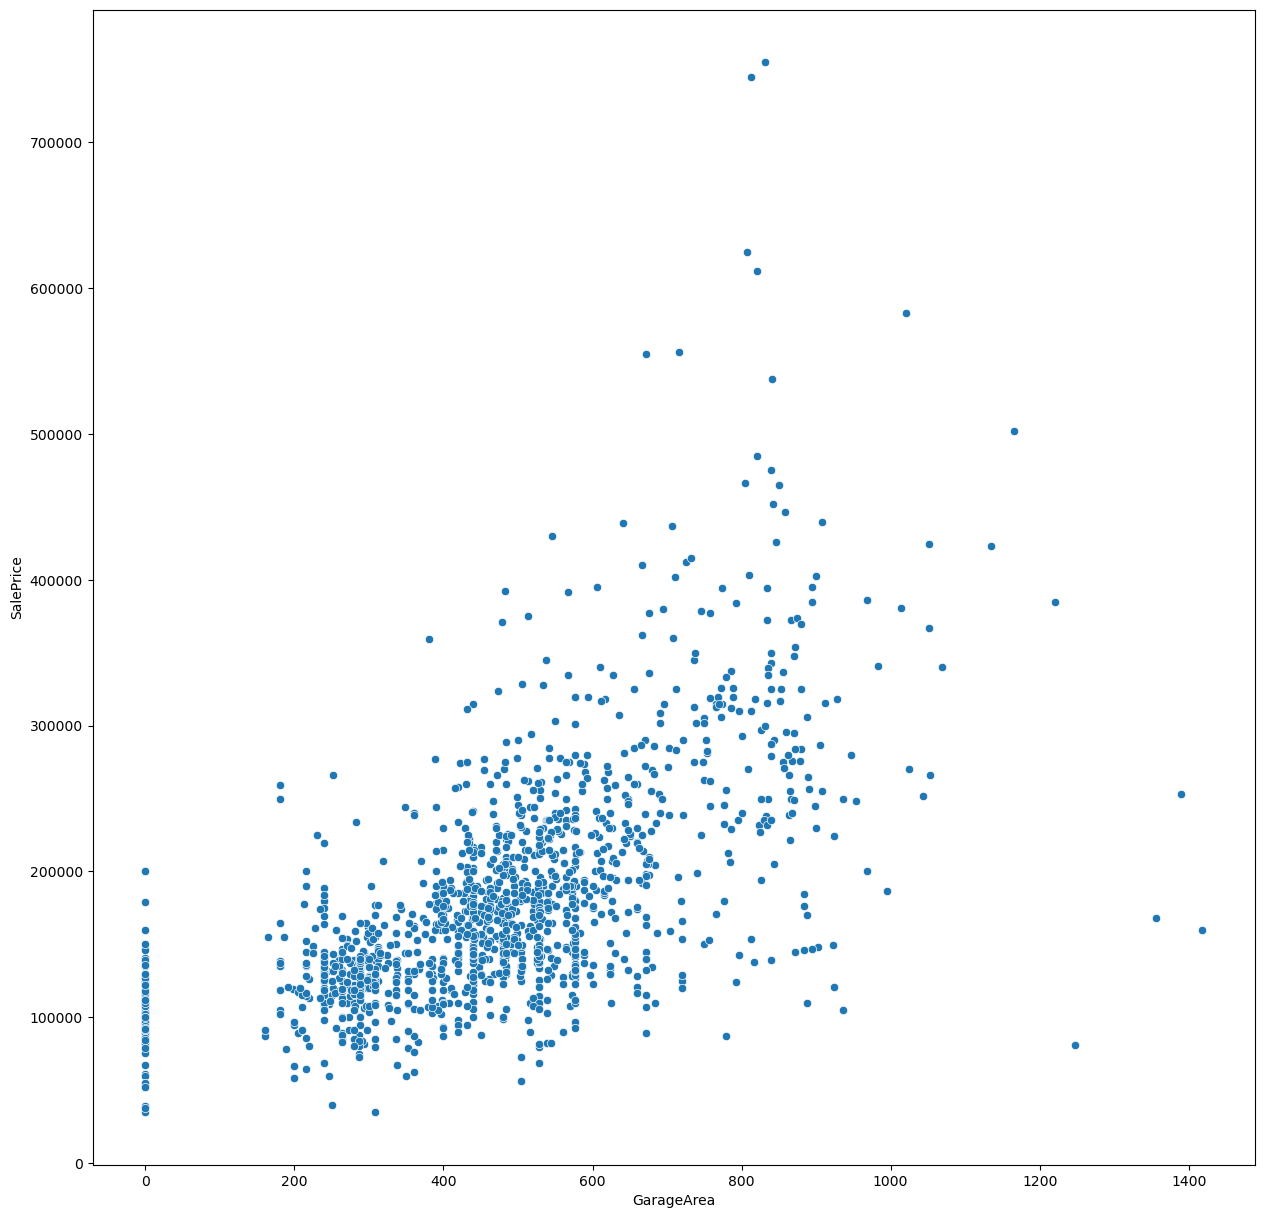

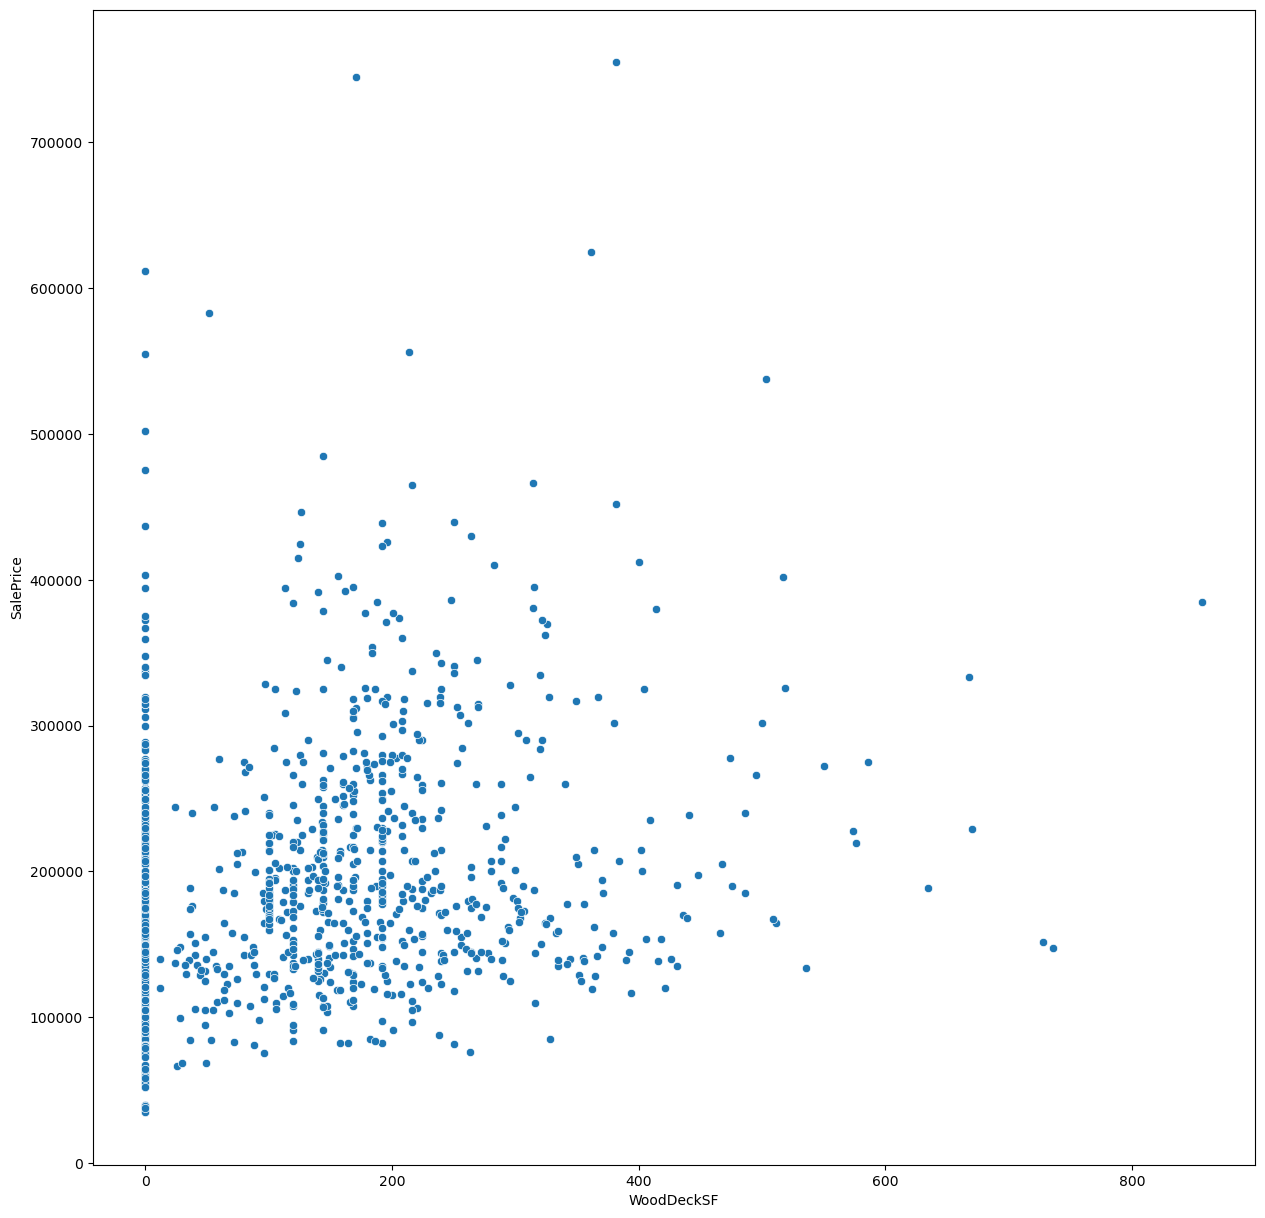

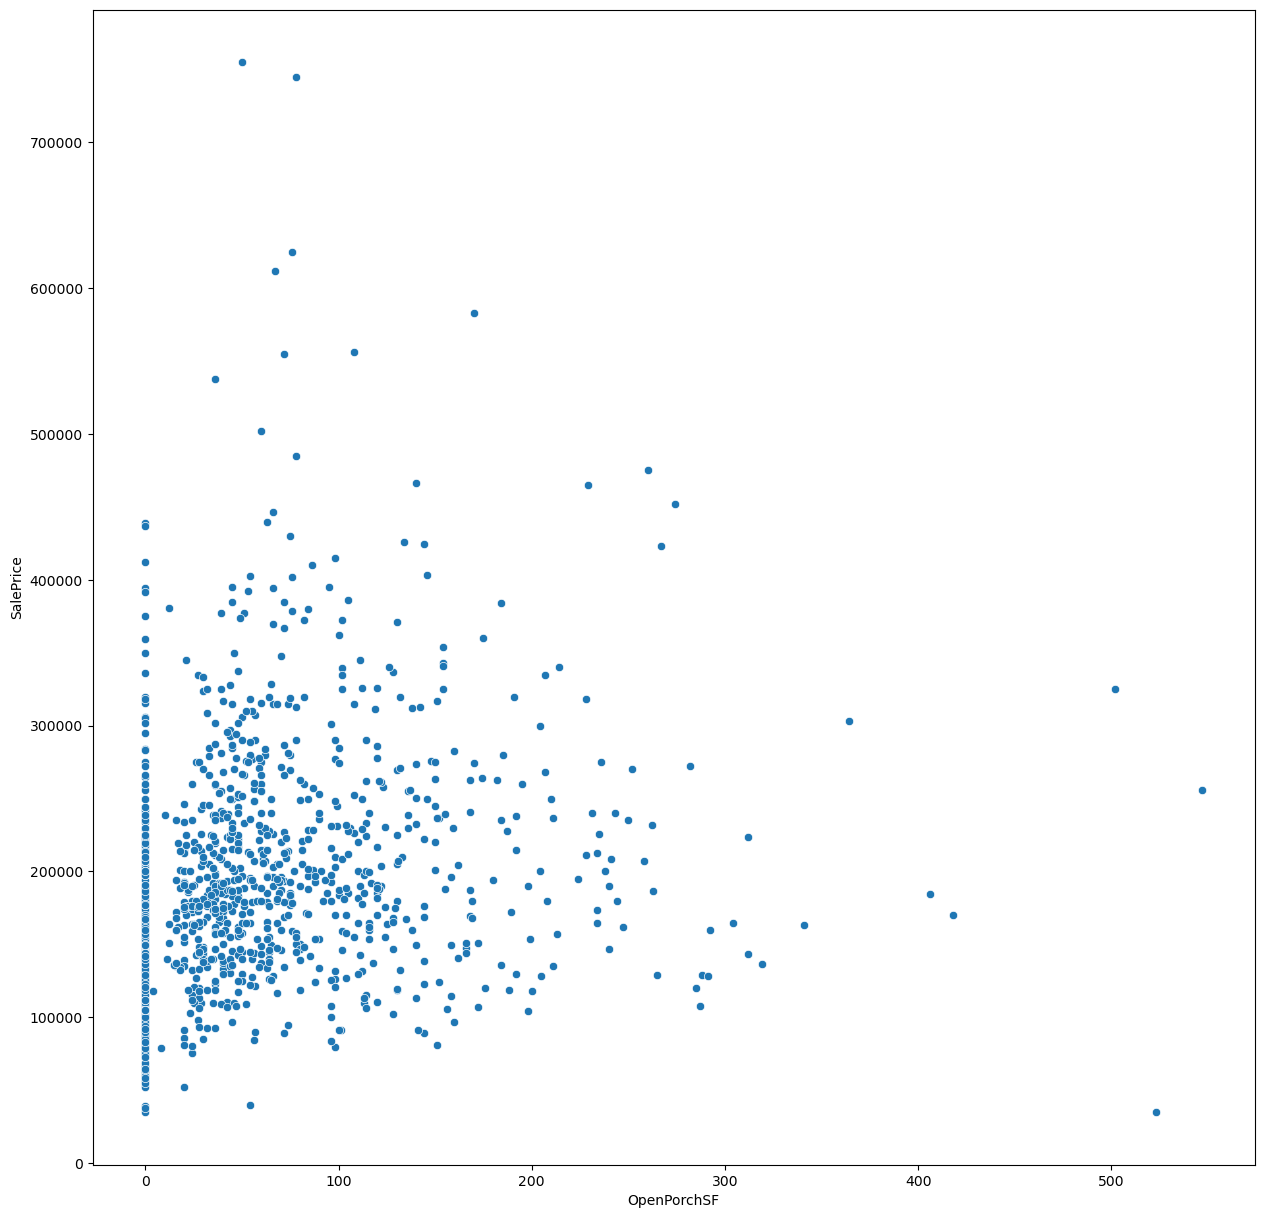

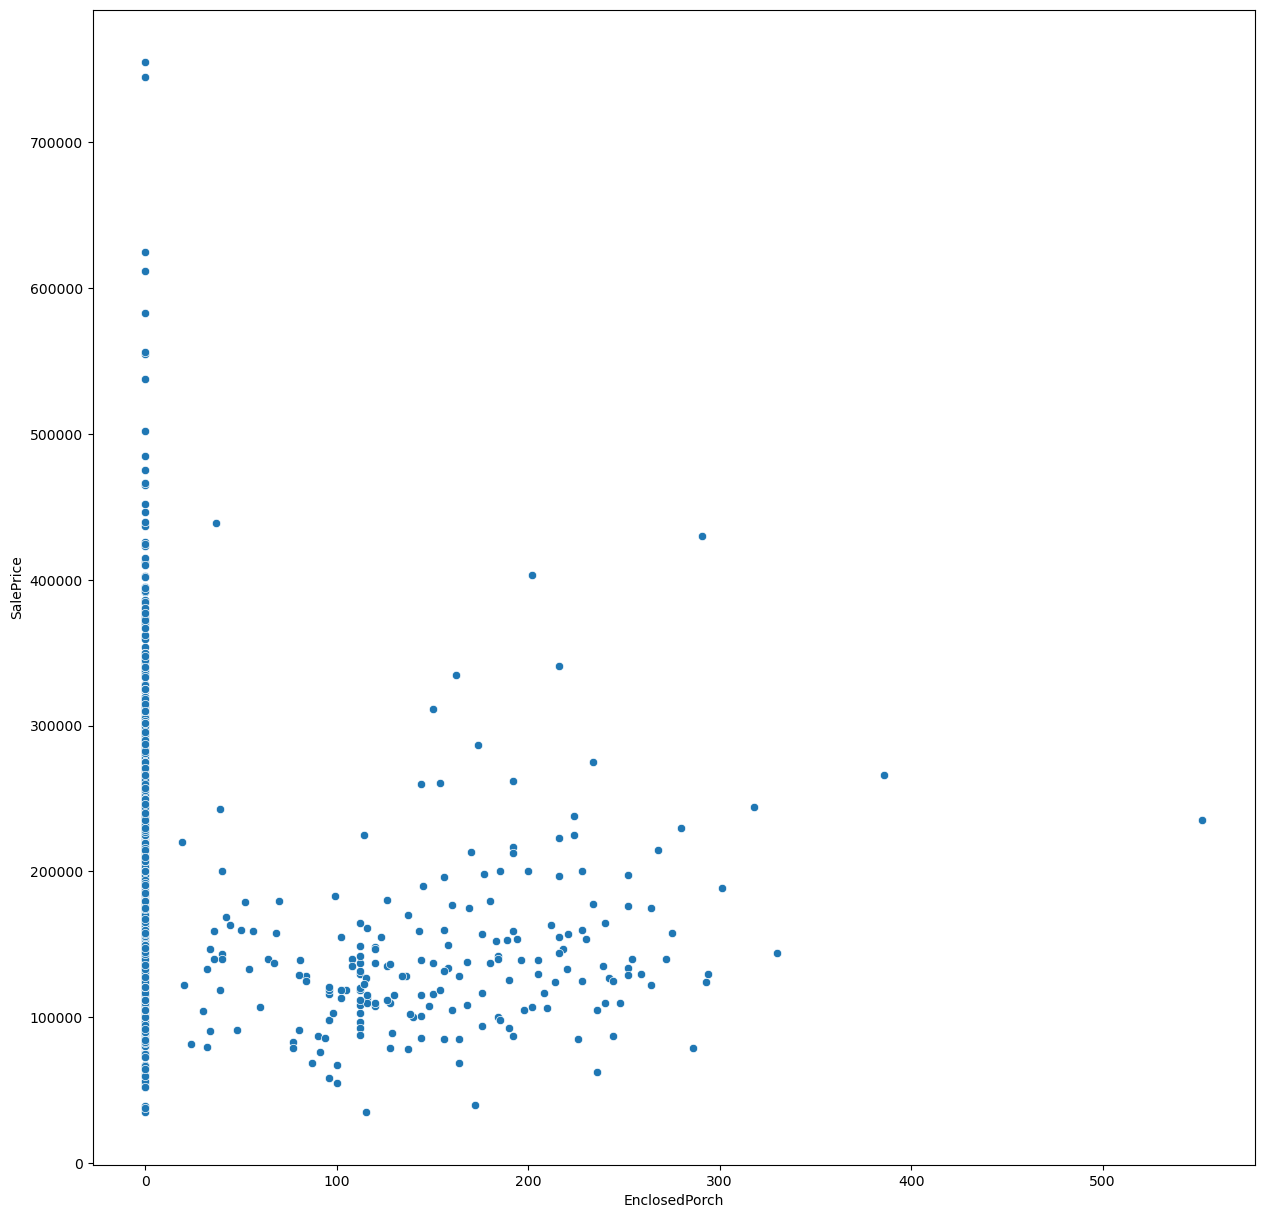

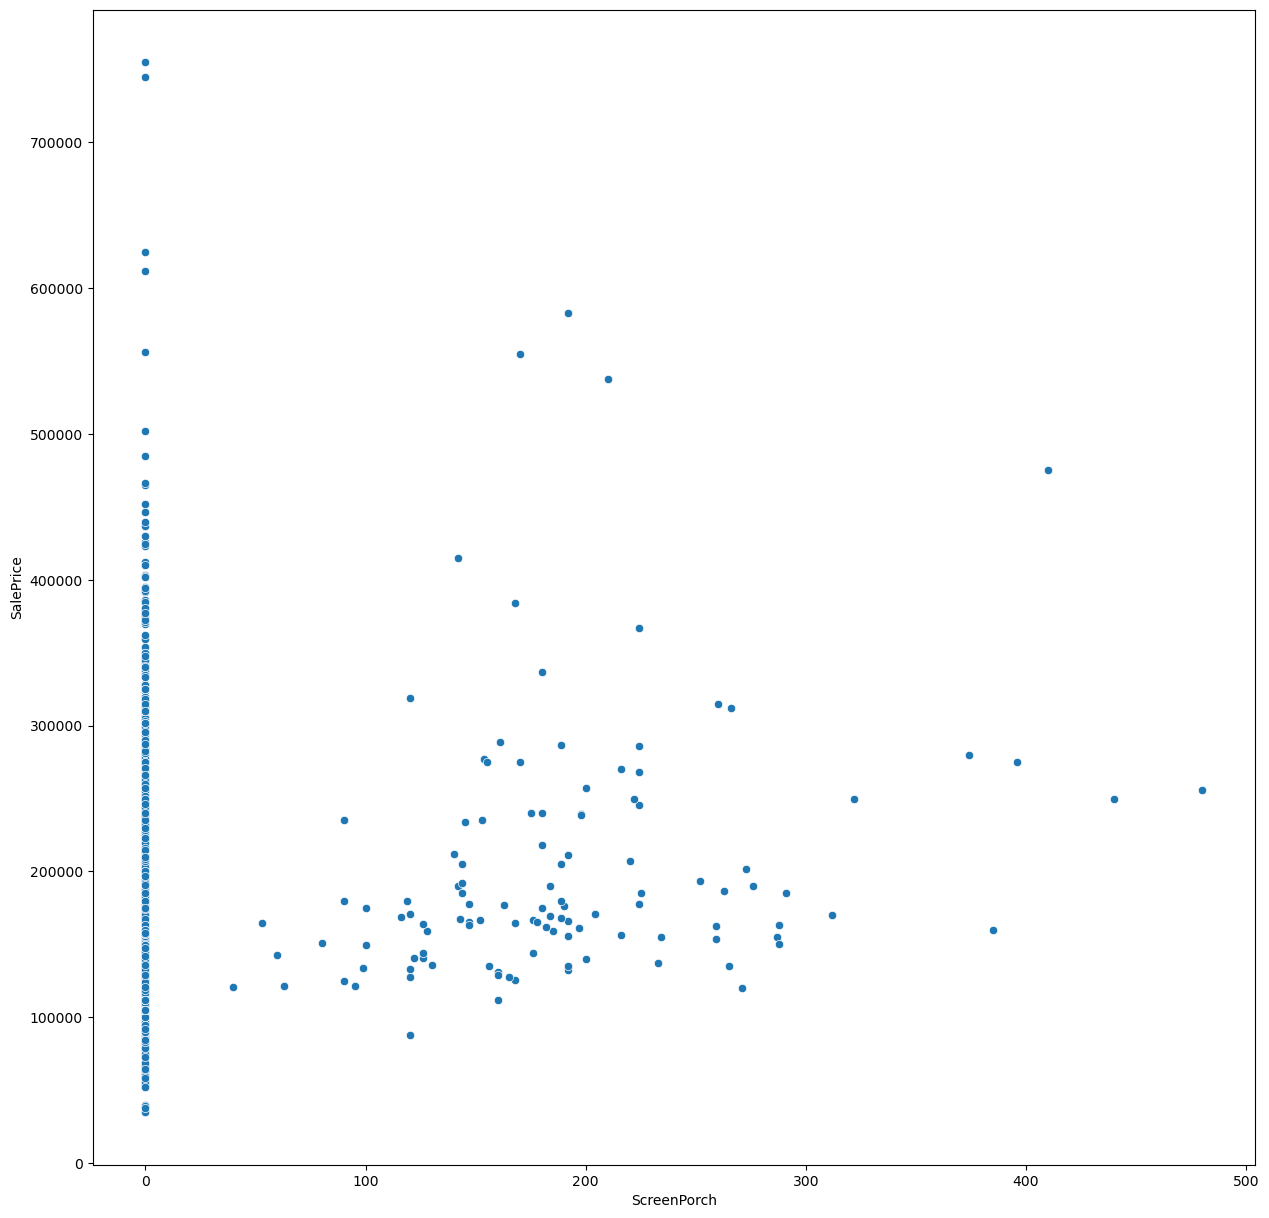

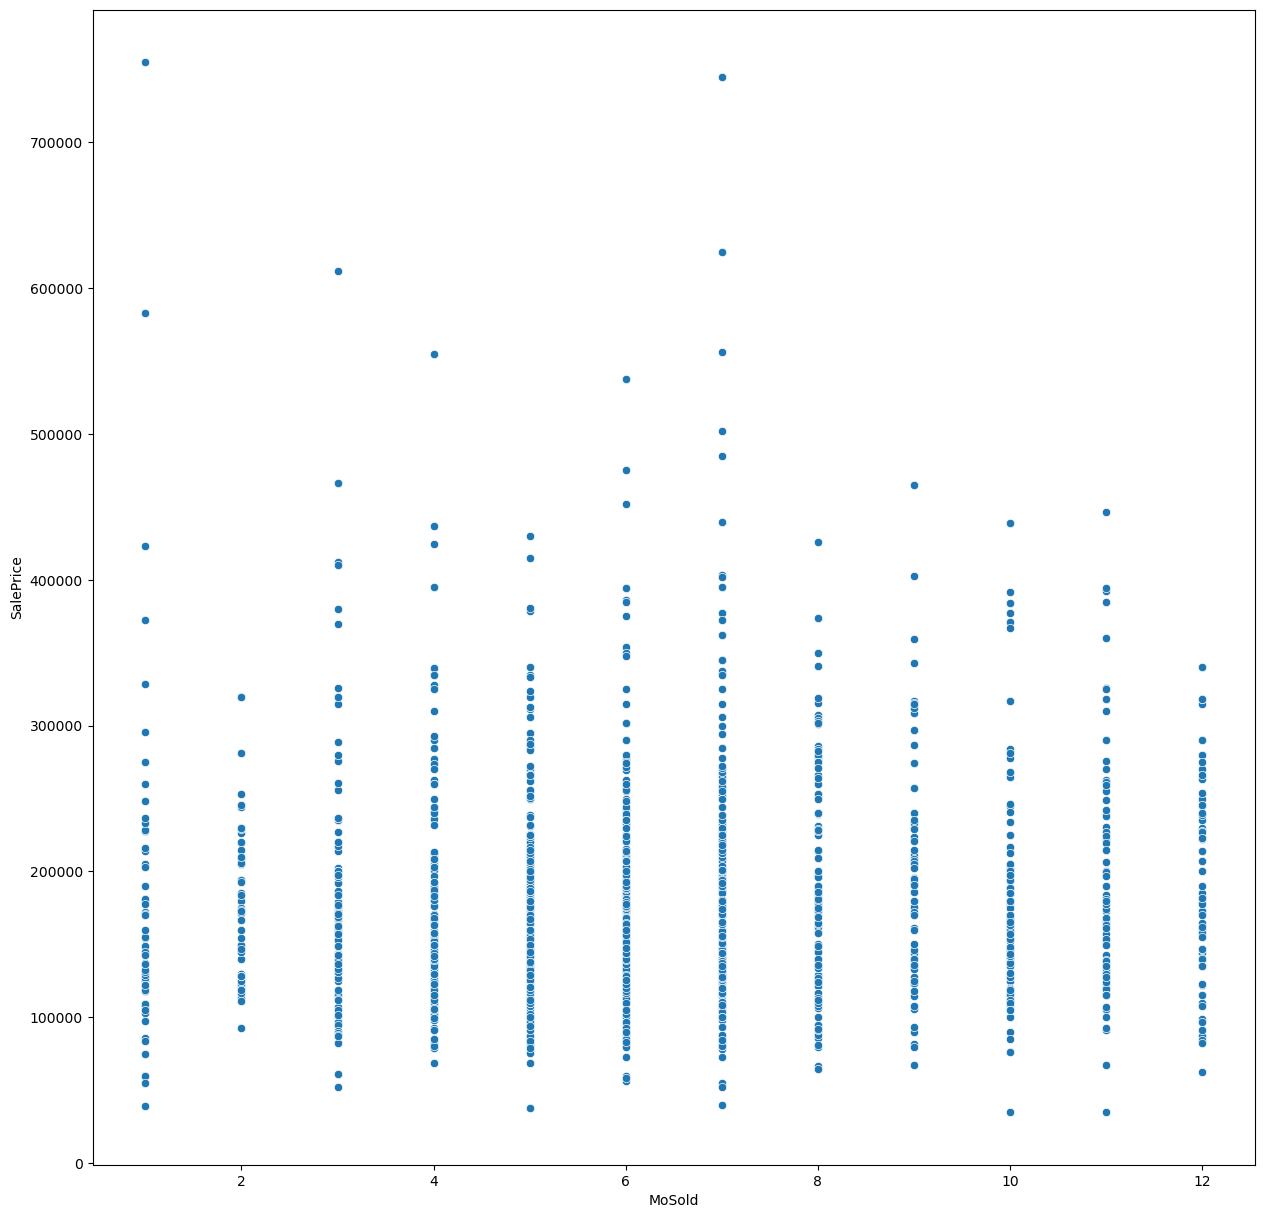

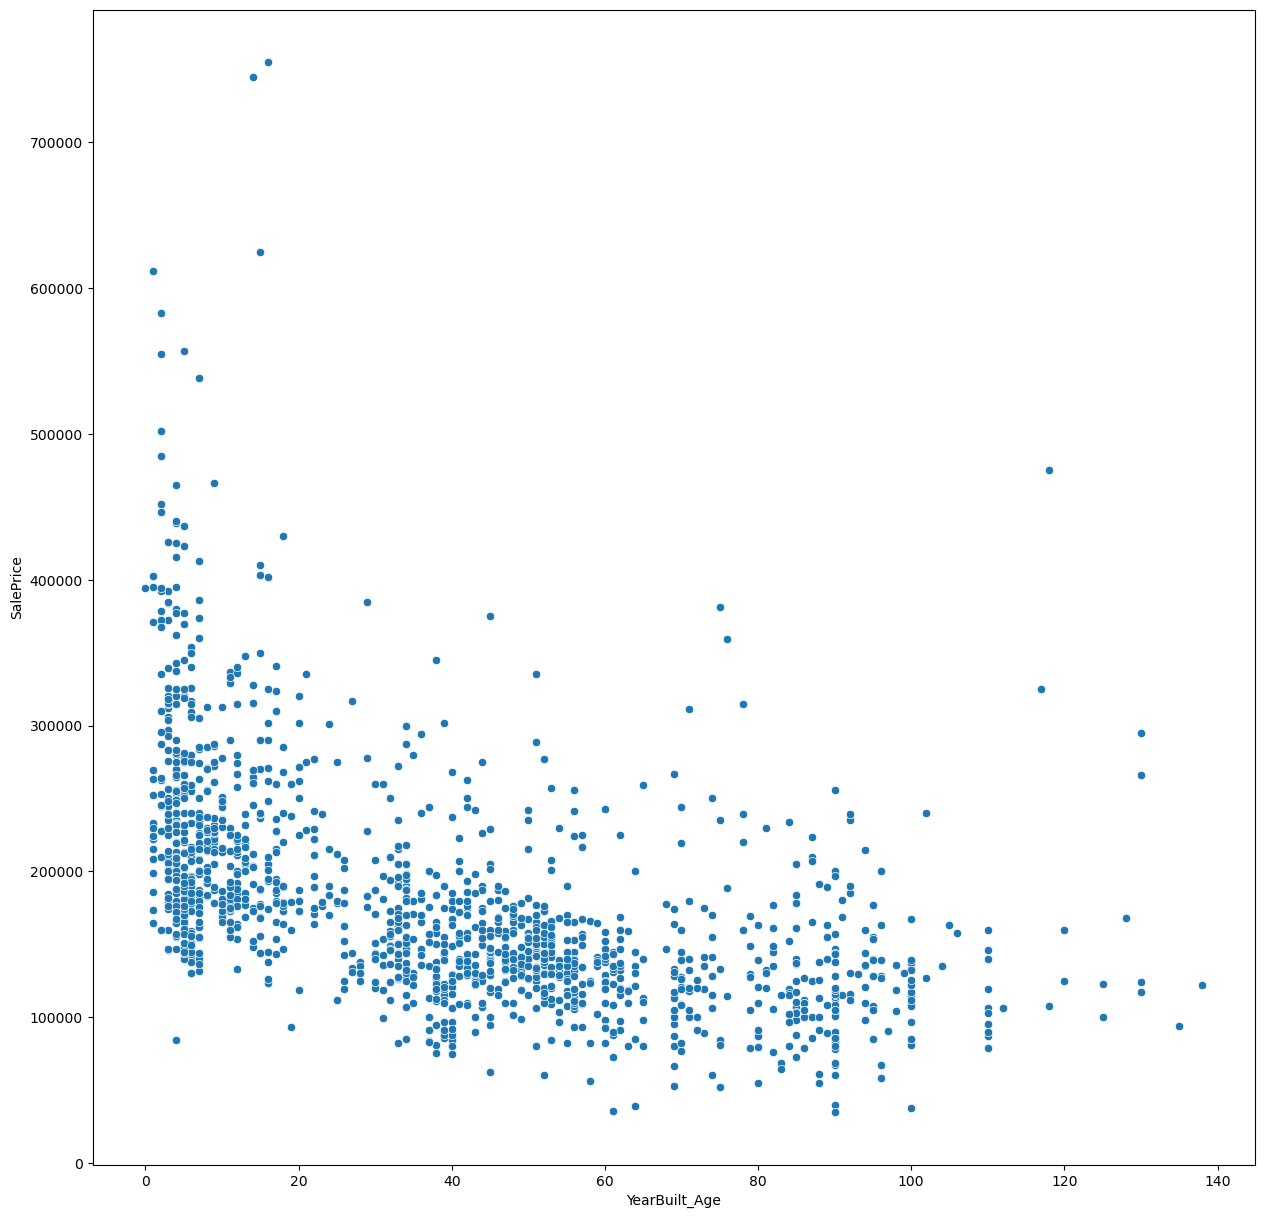

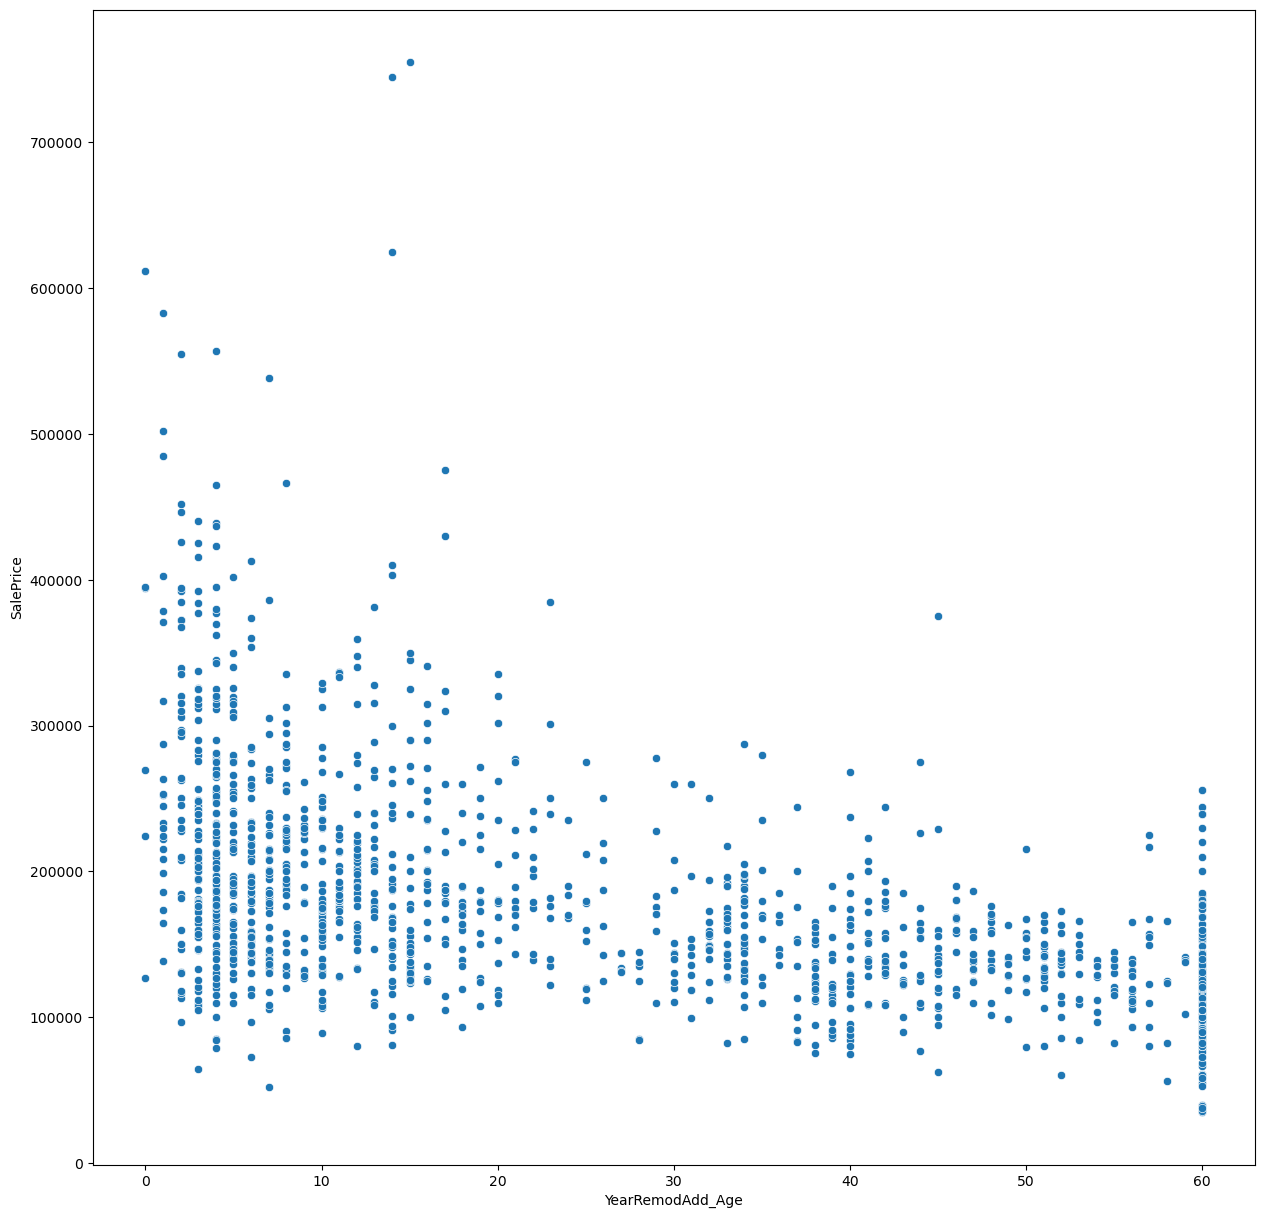

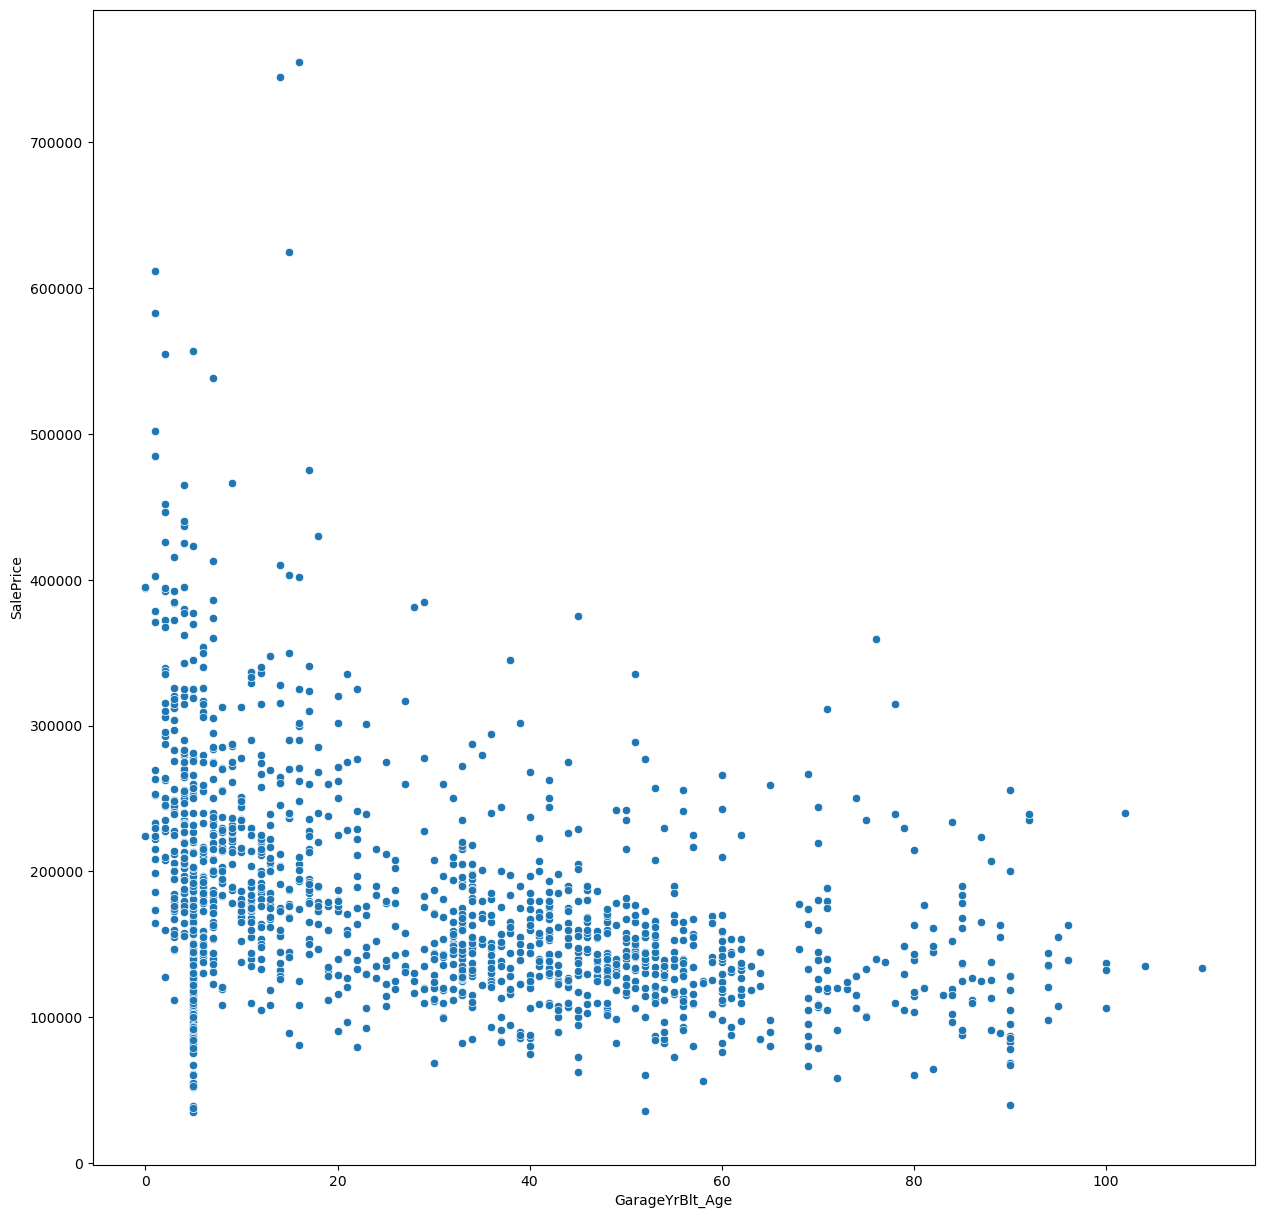

<Figure size 1500x1500 with 0 Axes>

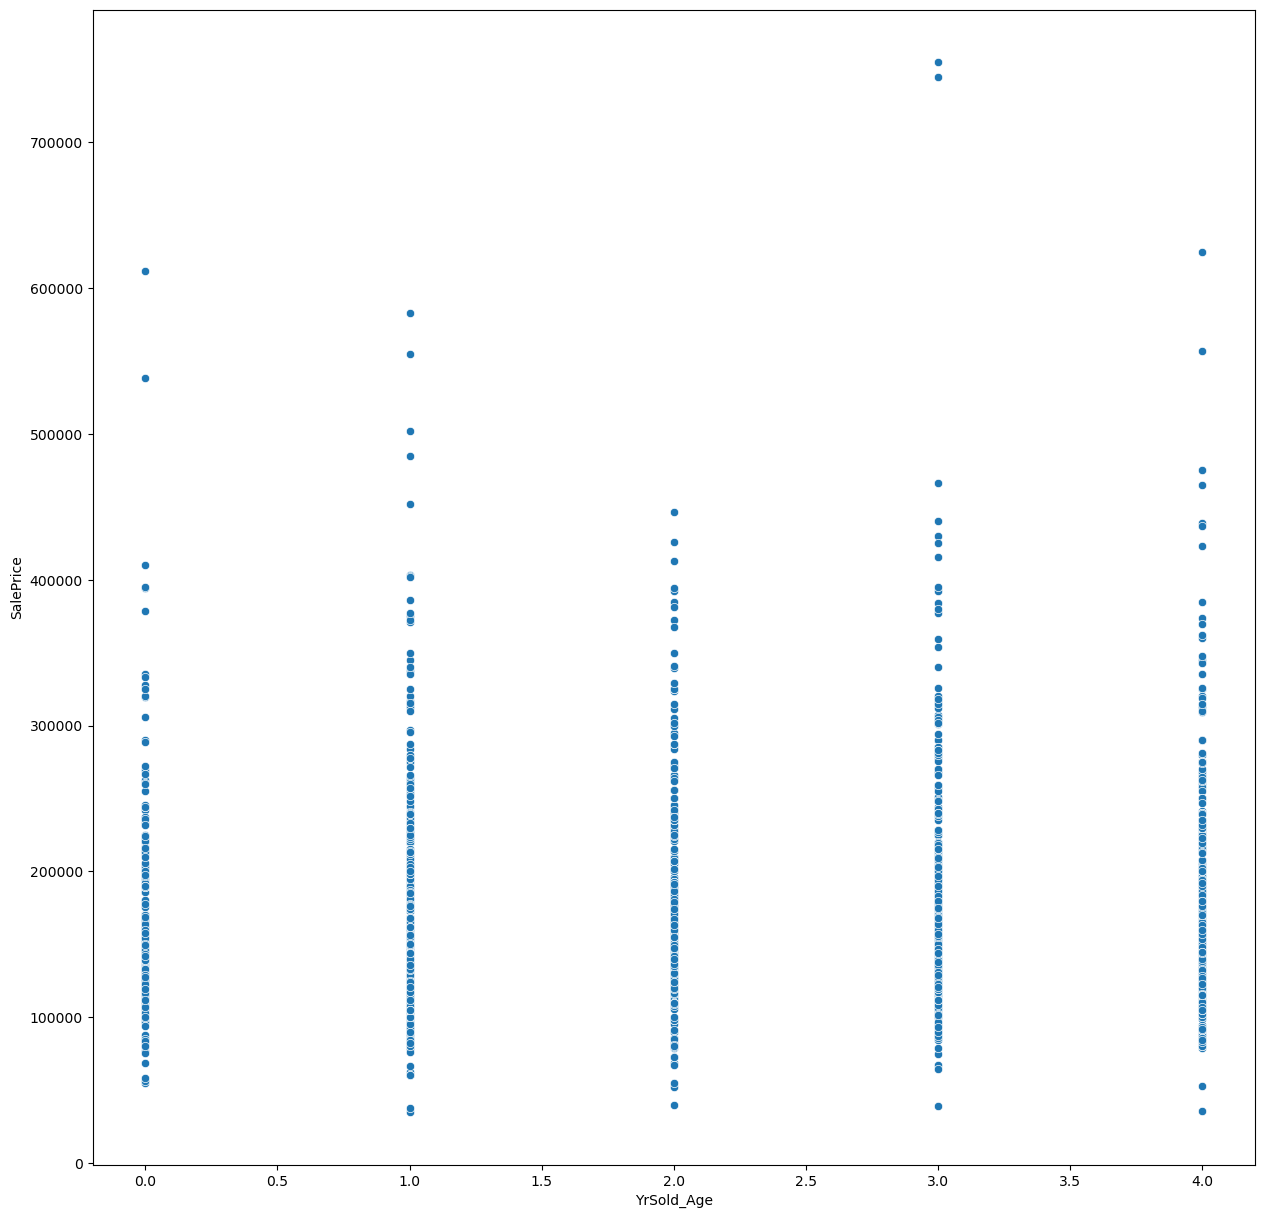

In [1832]:
#Ploting the graph for all numerical variables
for index, col in enumerate(Numerical_col_list):
    numericColPlots(Price, index, col, 'SalePrice')

In [1833]:
def CategoryColPlots(df, index,Predictor ,target):
    plt.figure(figsize = (10, 10))
    plt.figure(index)
    sns.boxplot(data=df, x=Predictor, y=target)

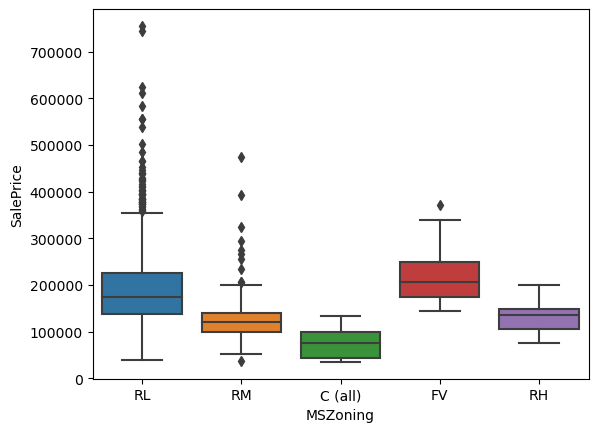

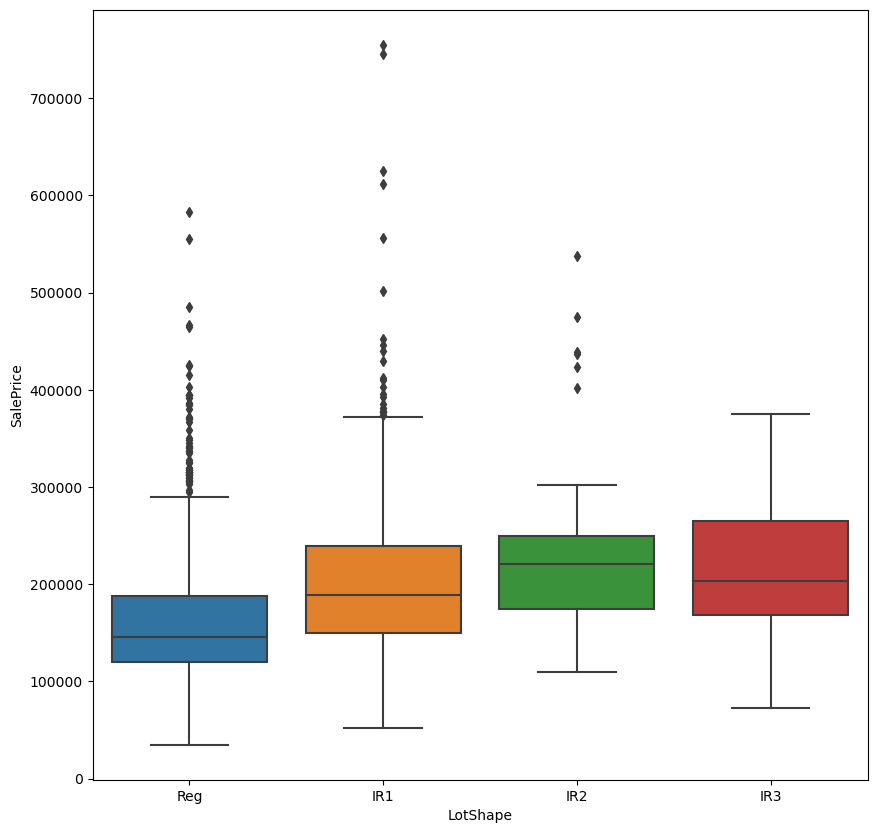

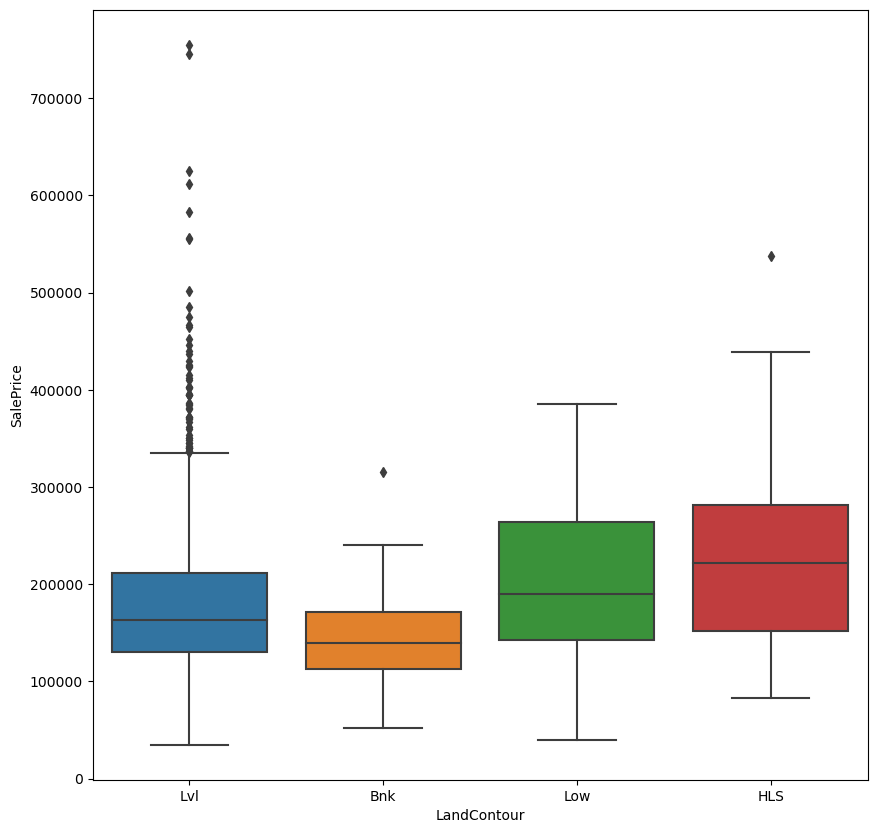

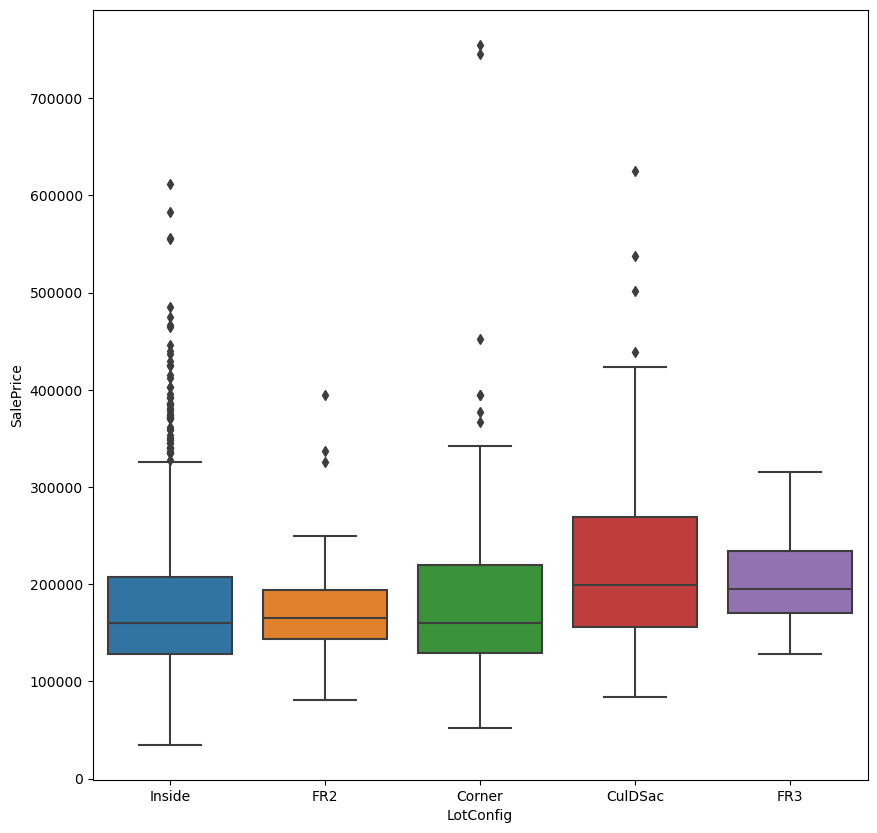

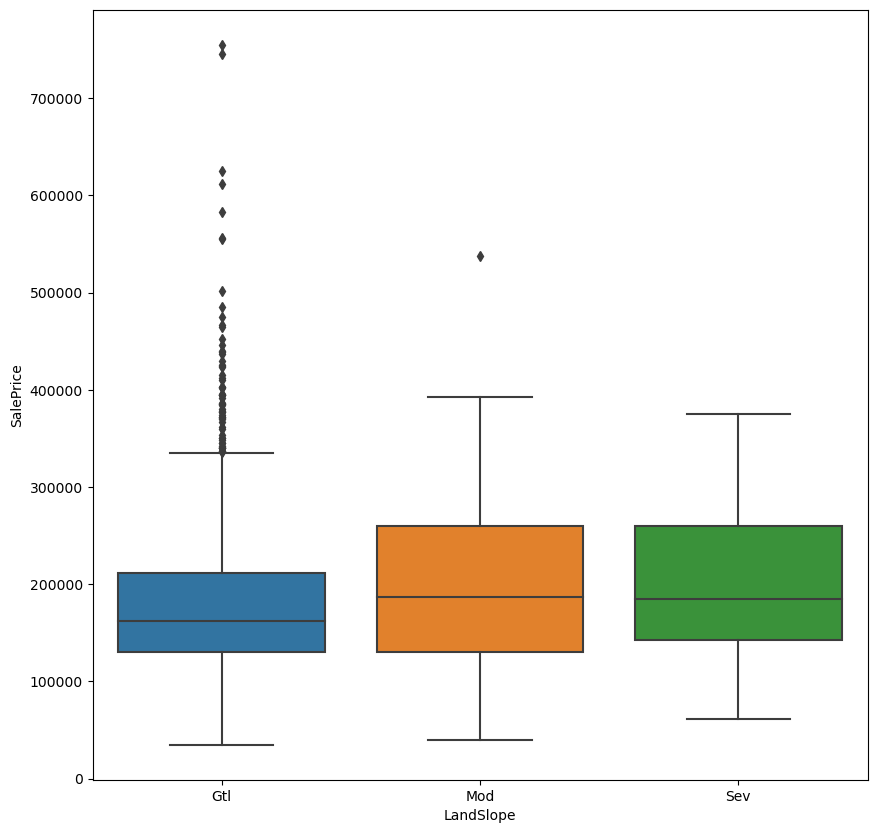

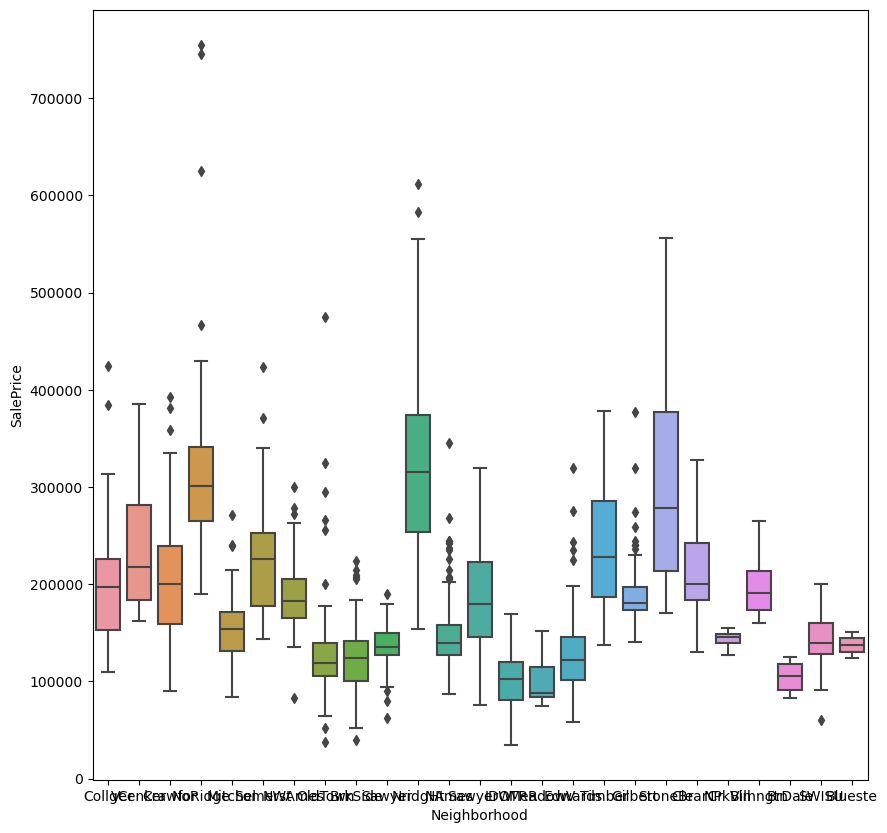

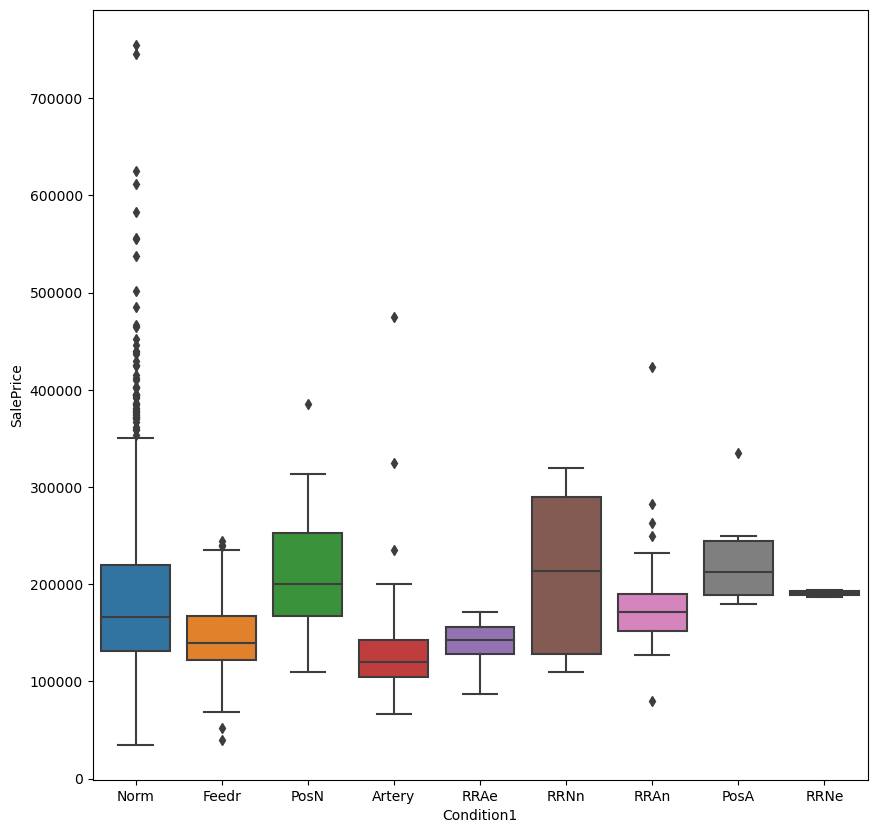

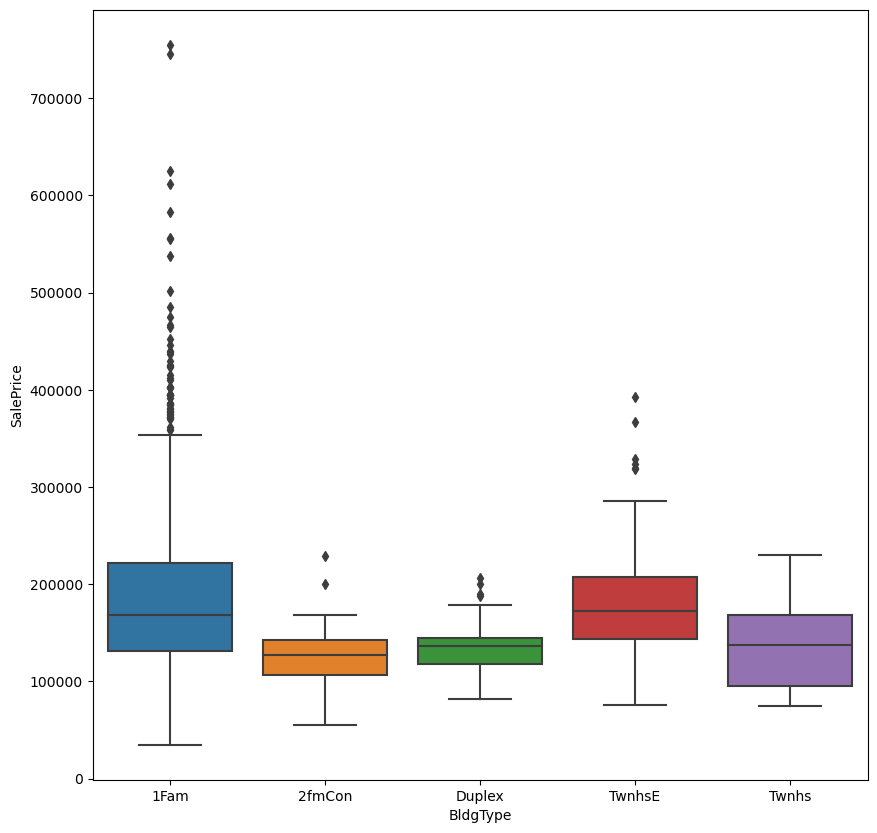

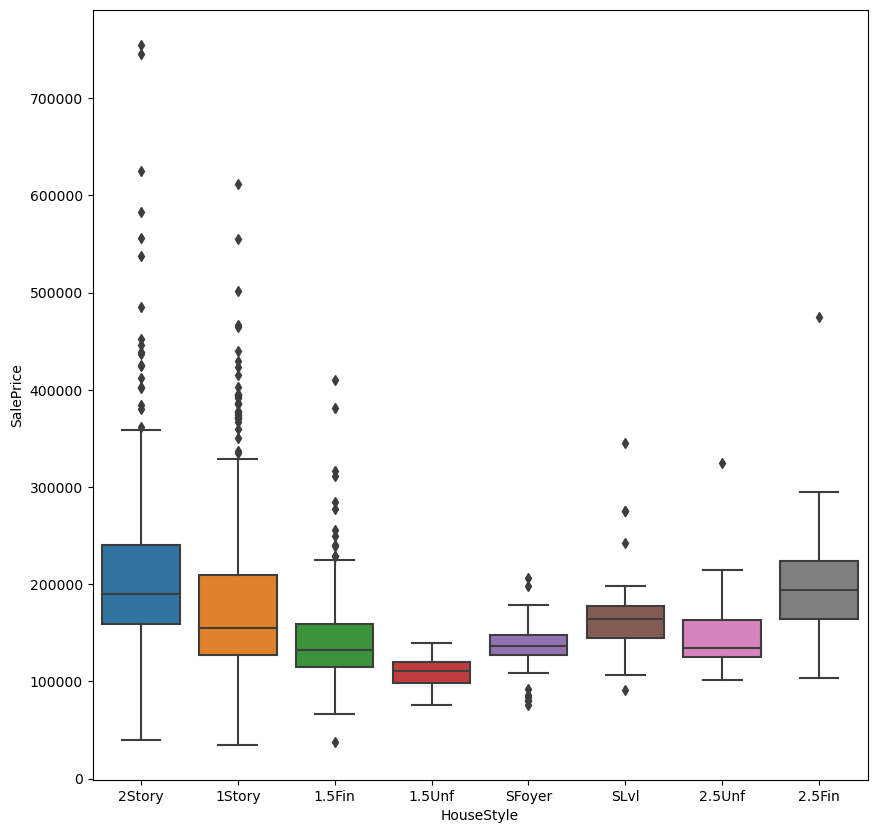

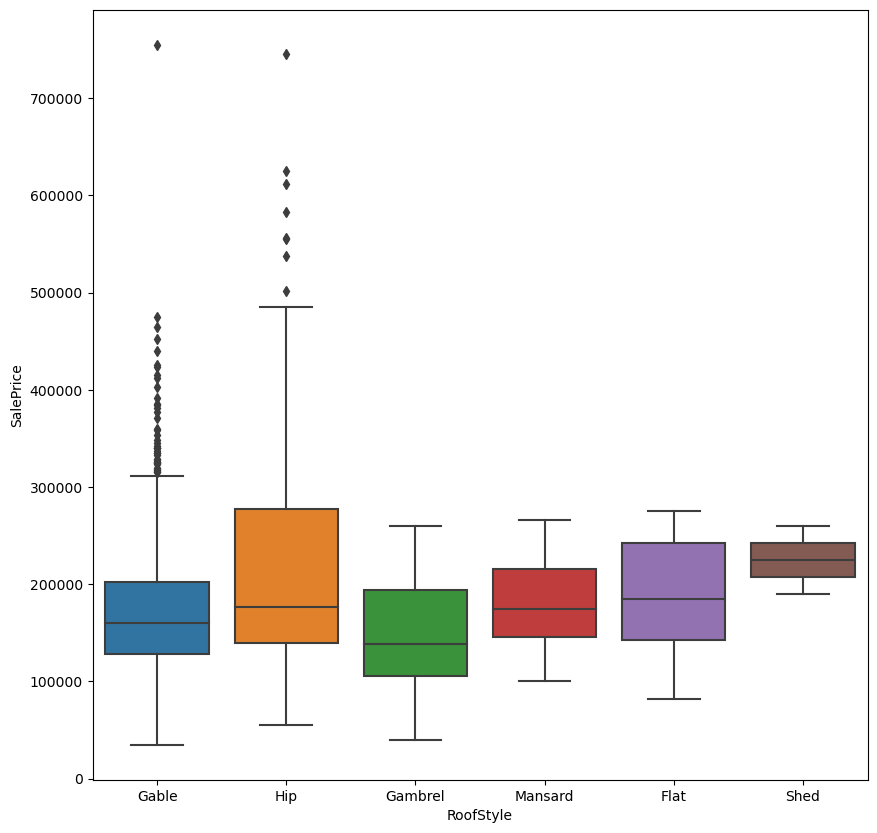

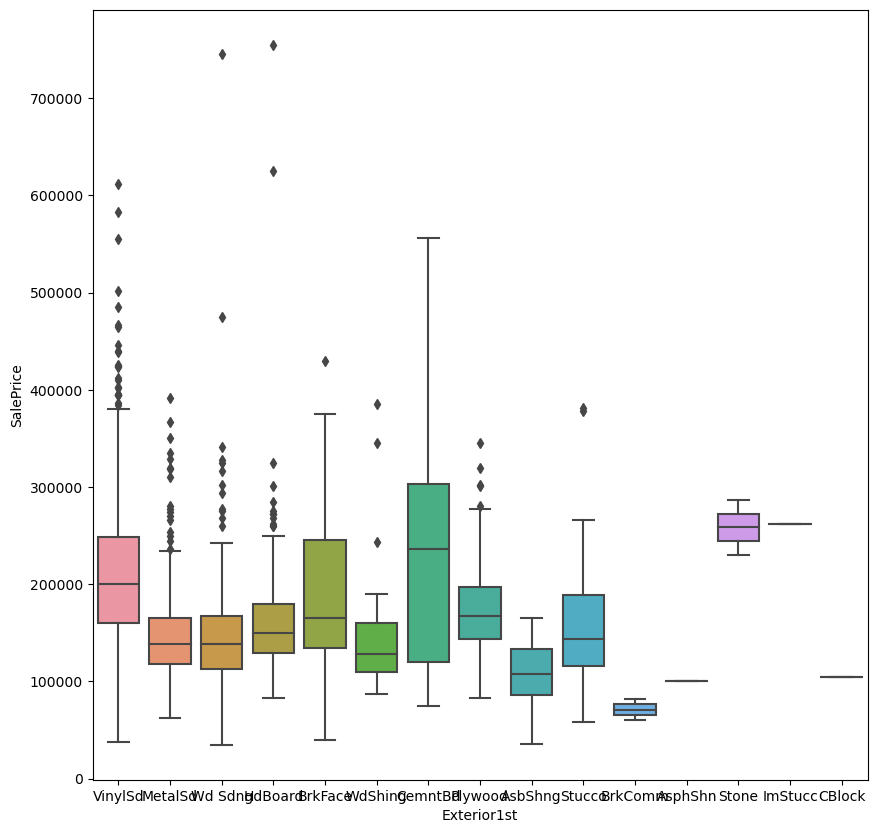

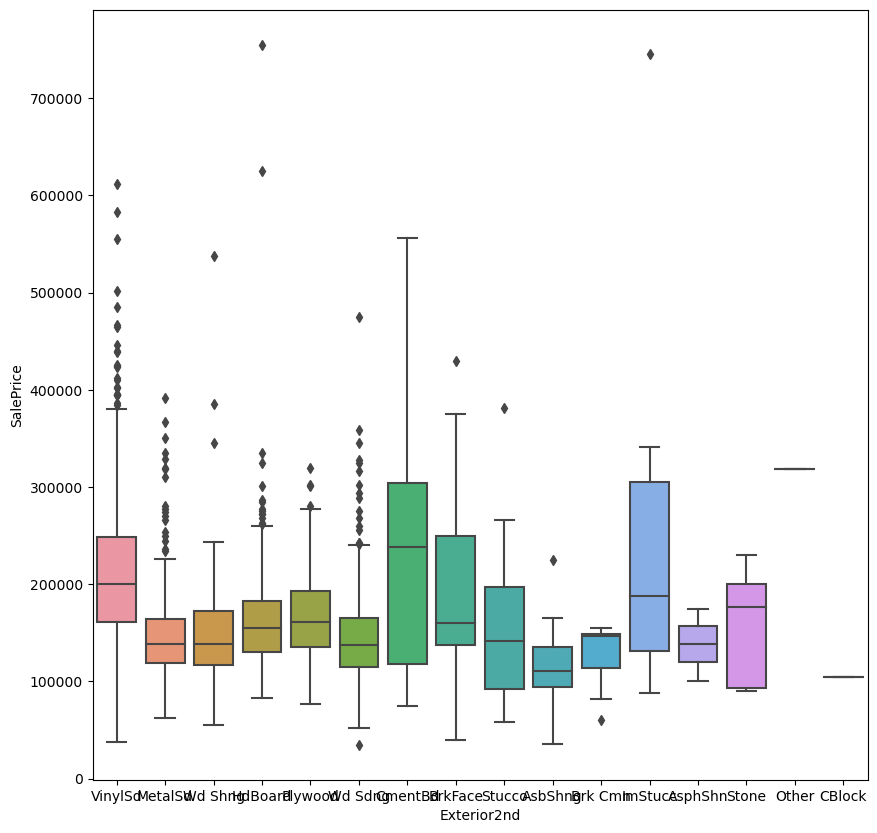

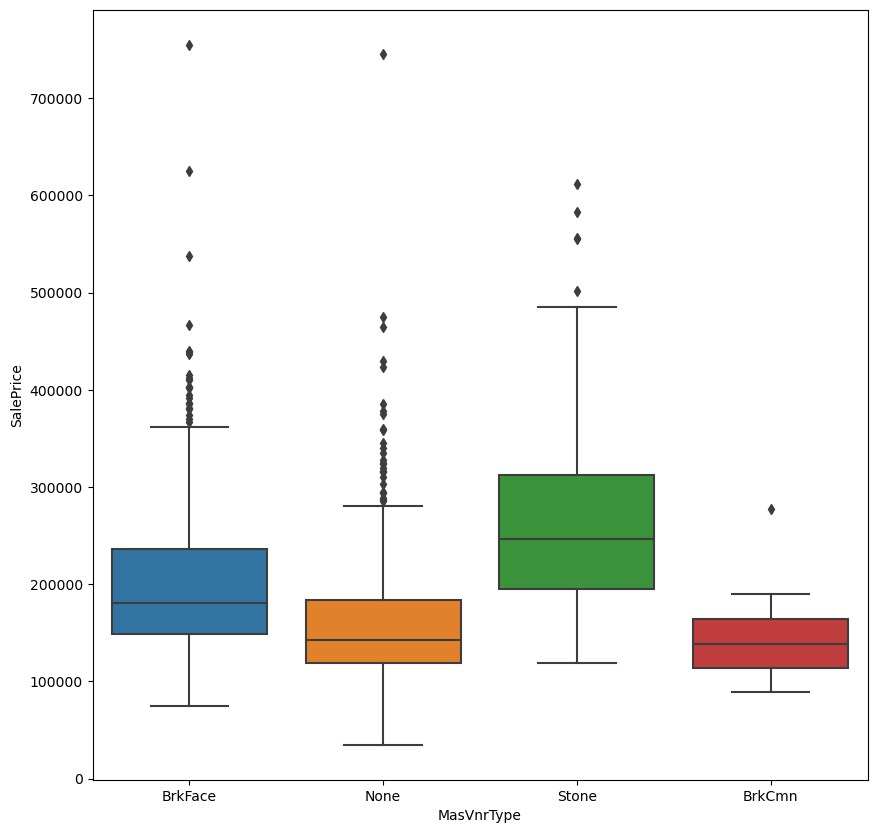

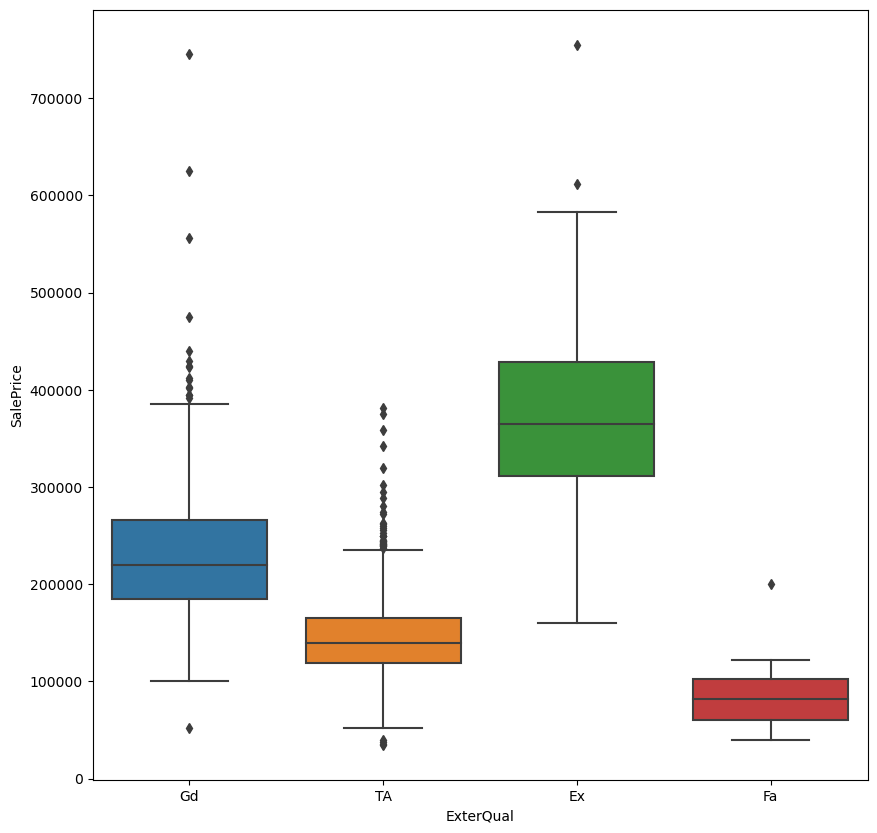

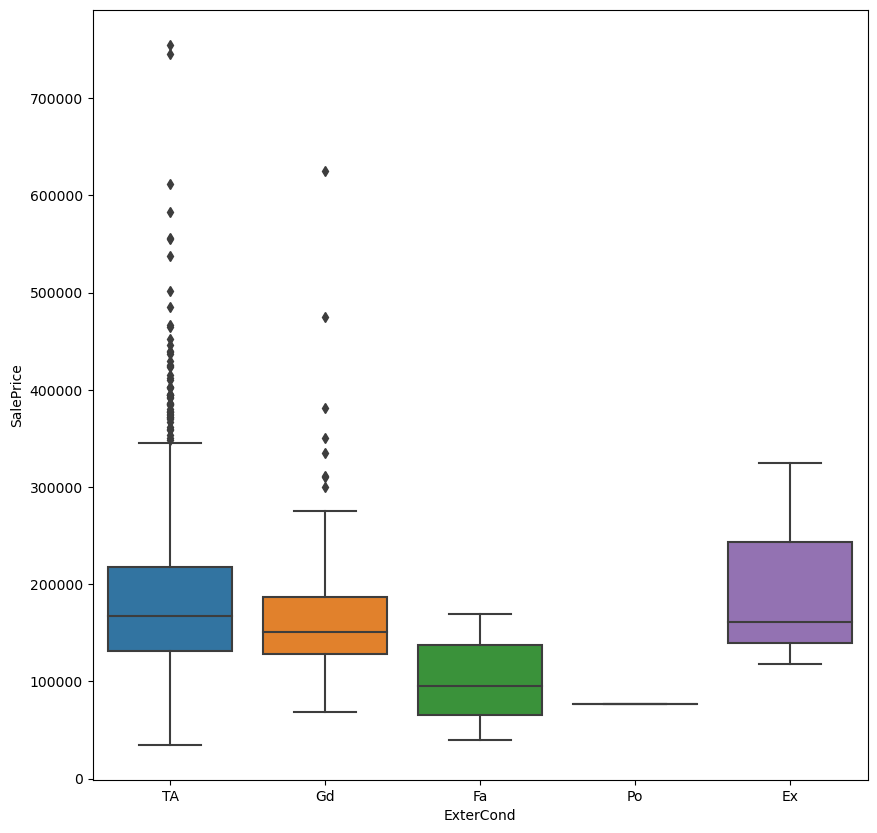

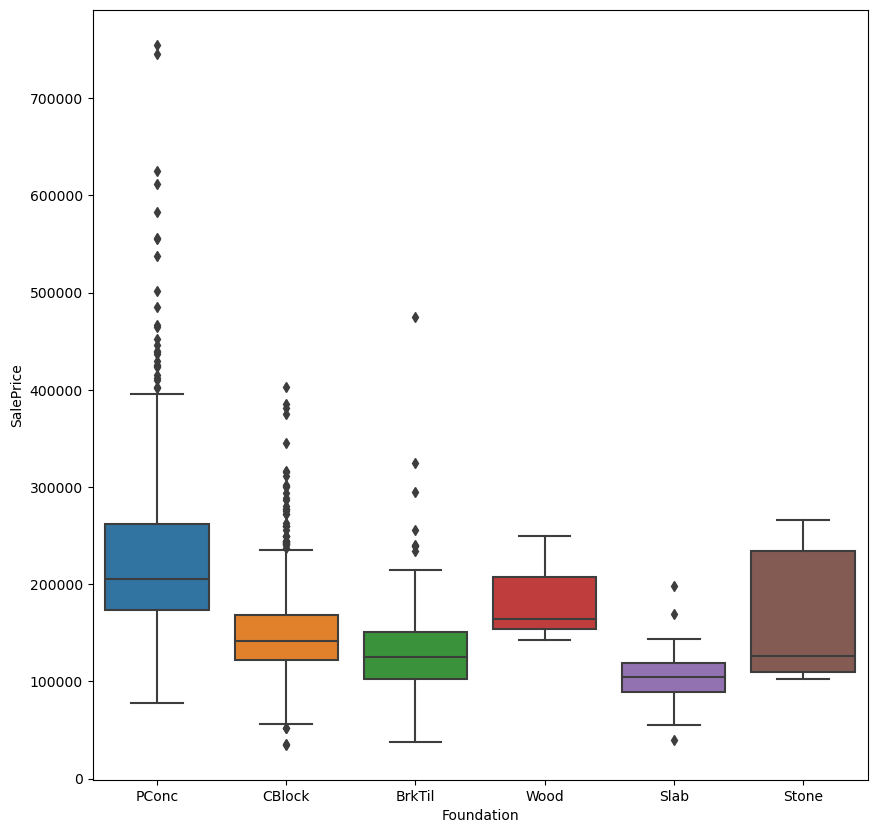

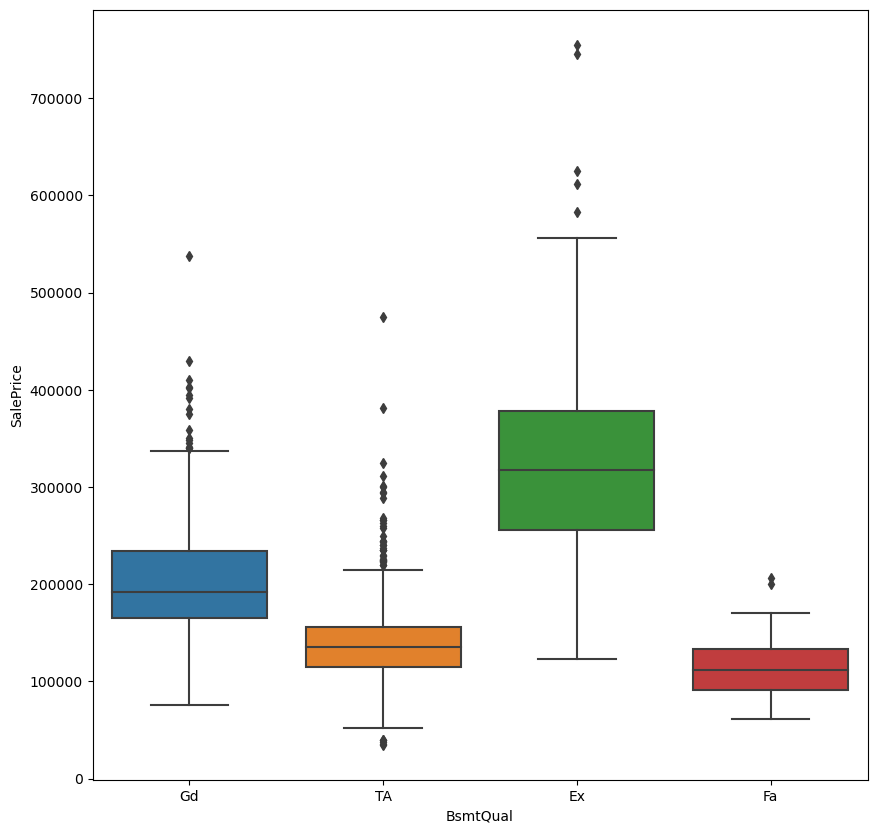

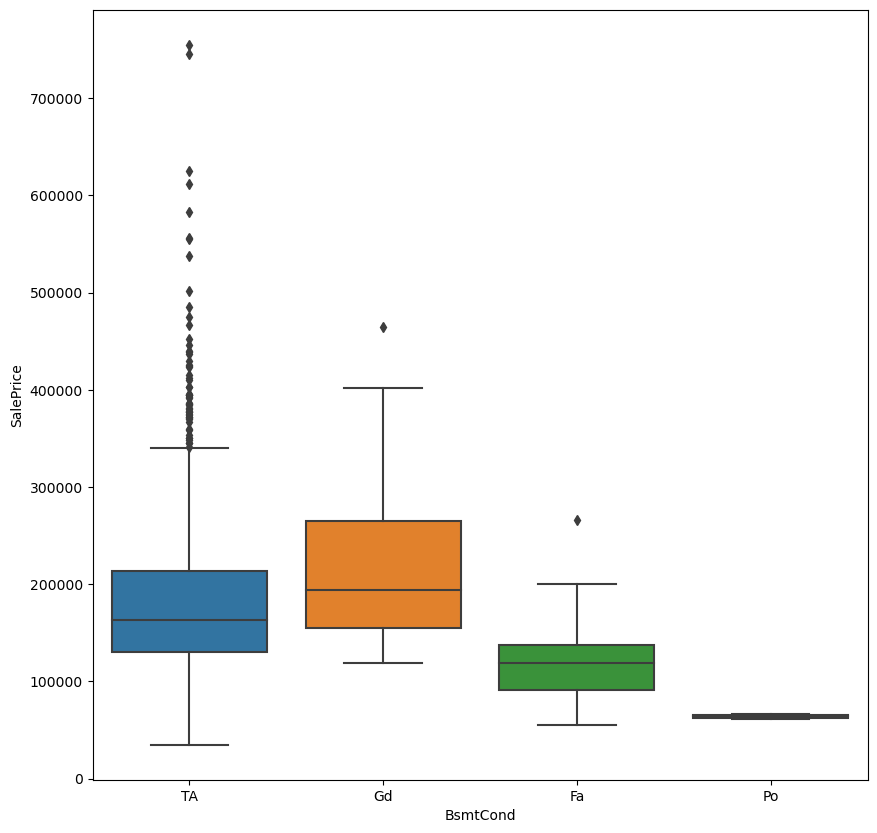

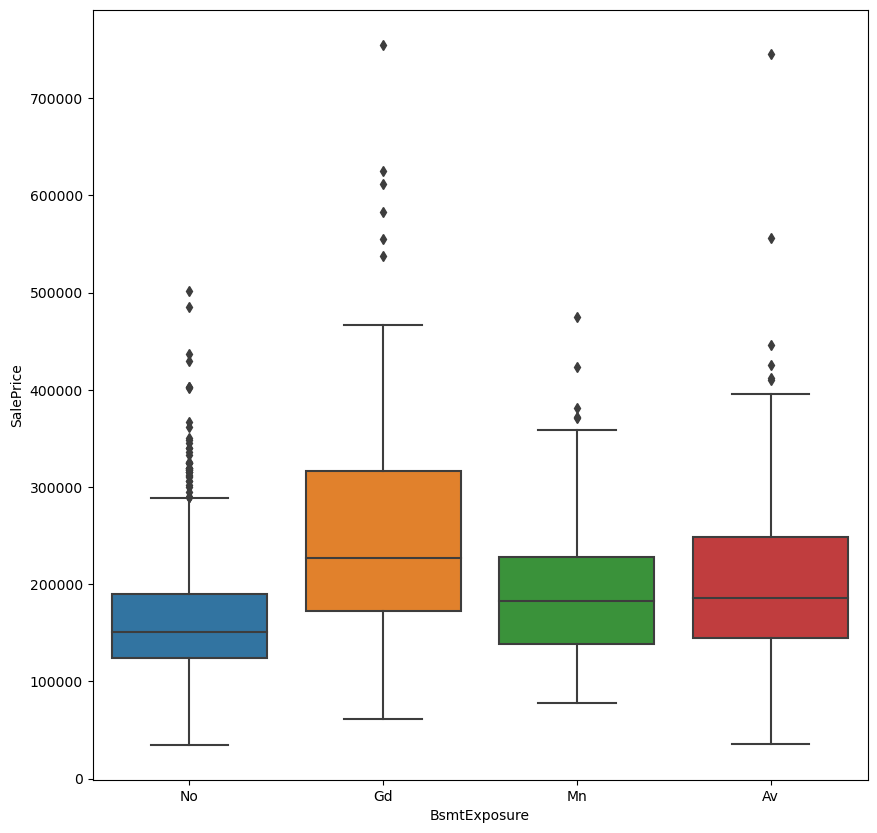

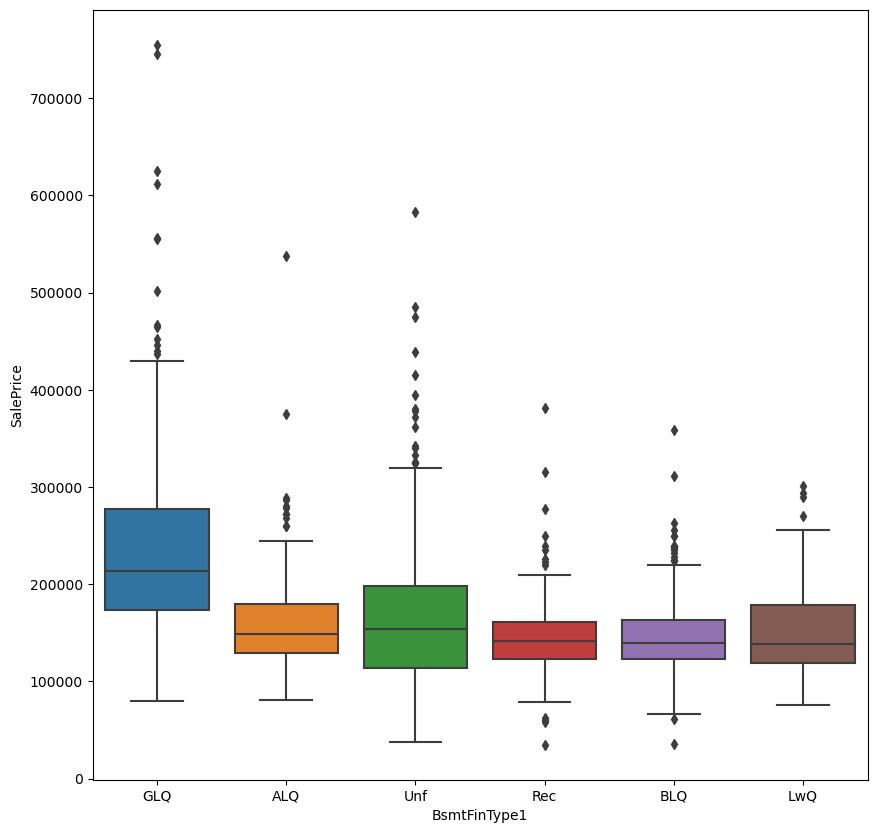

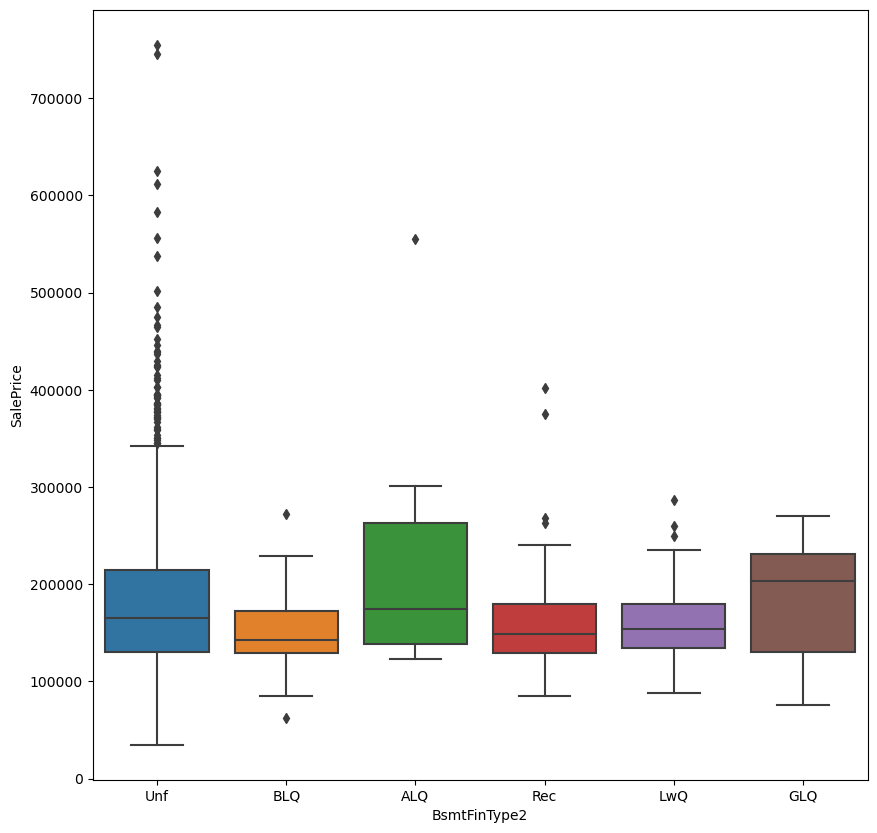

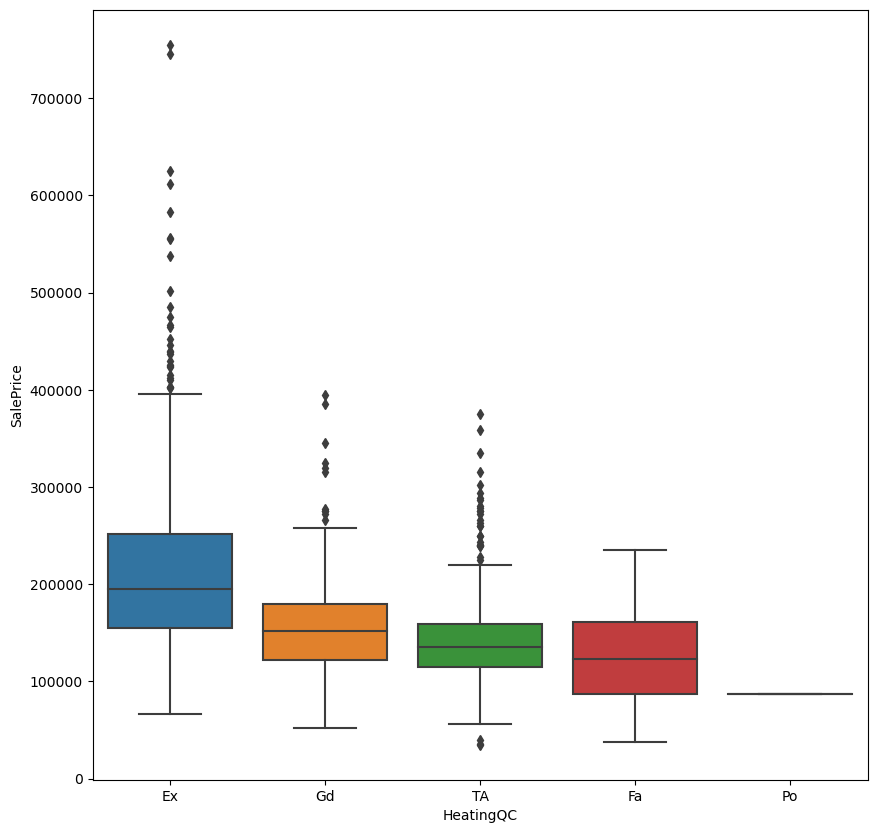

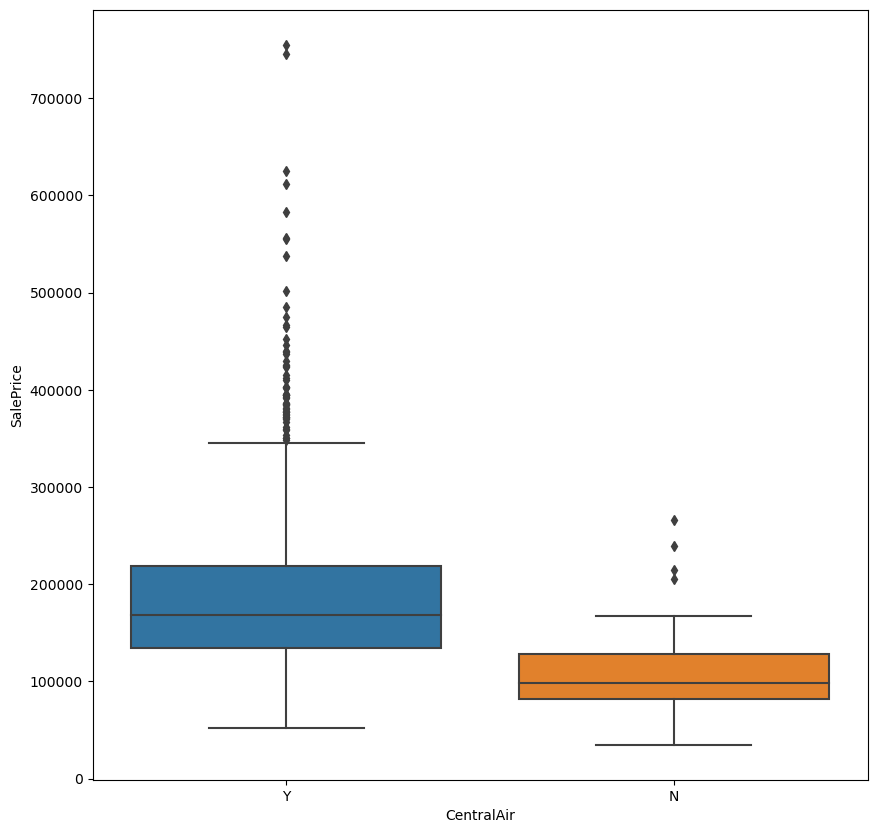

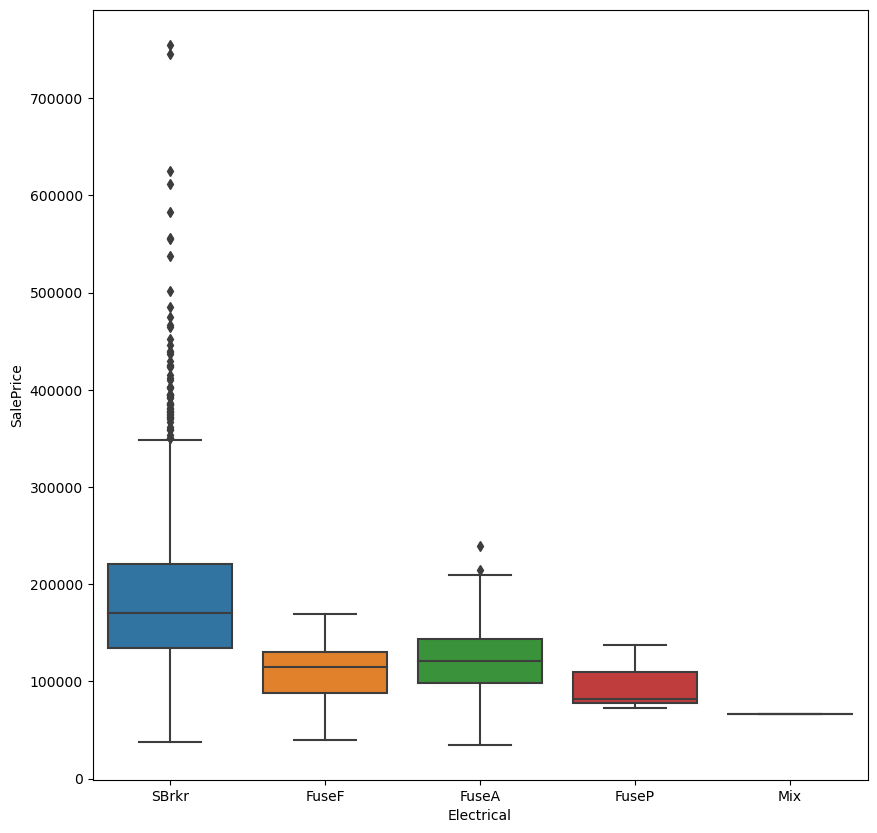

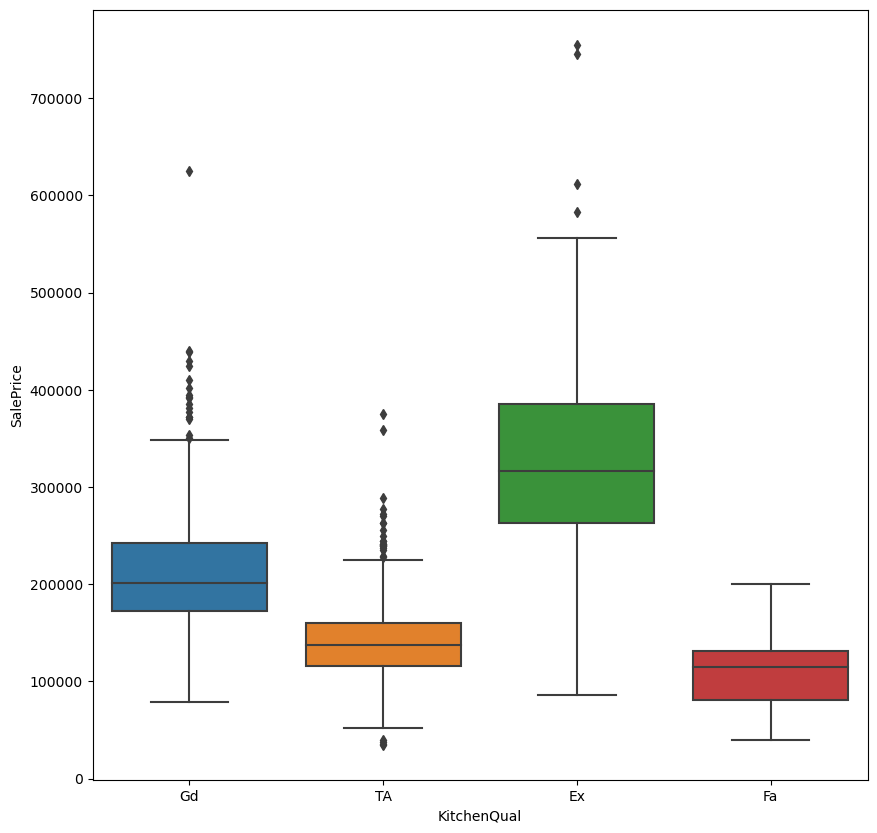

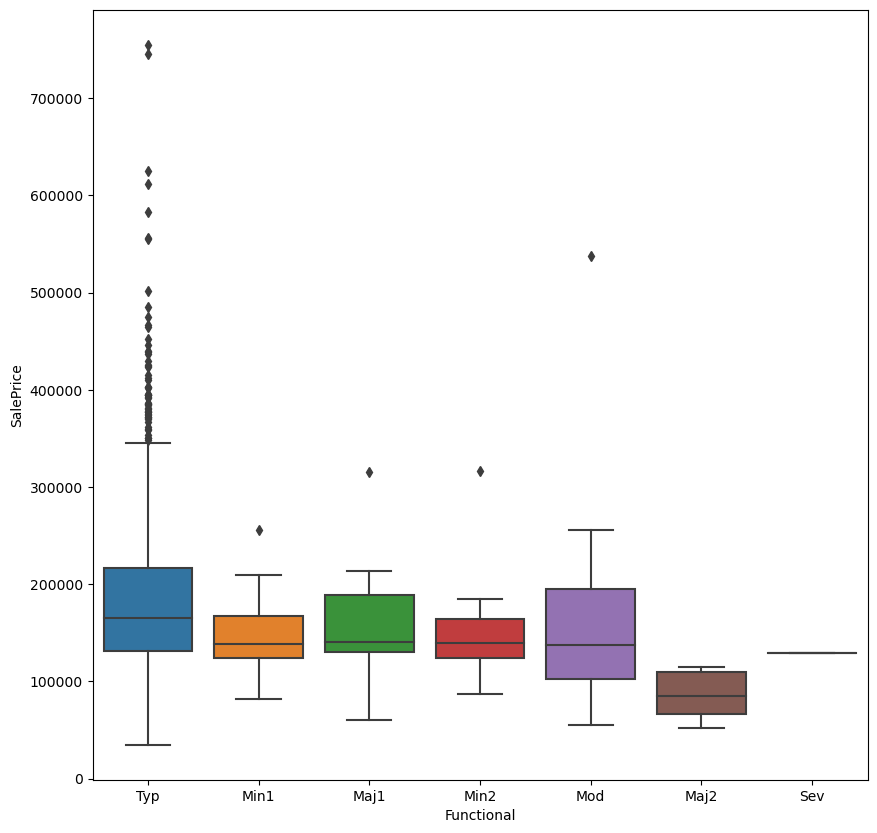

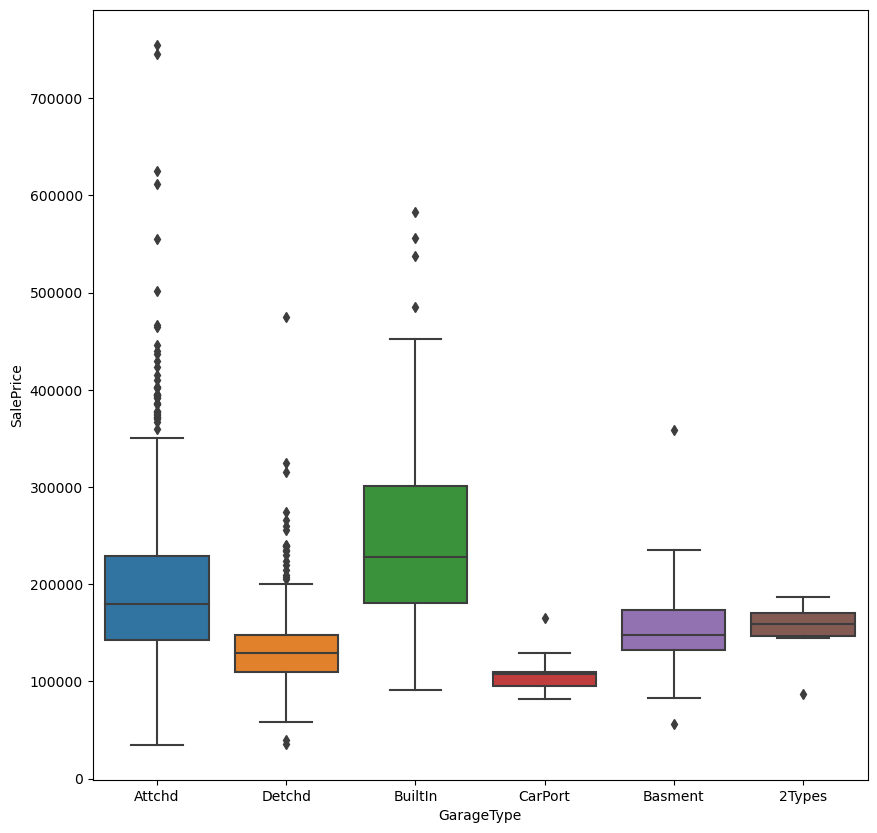

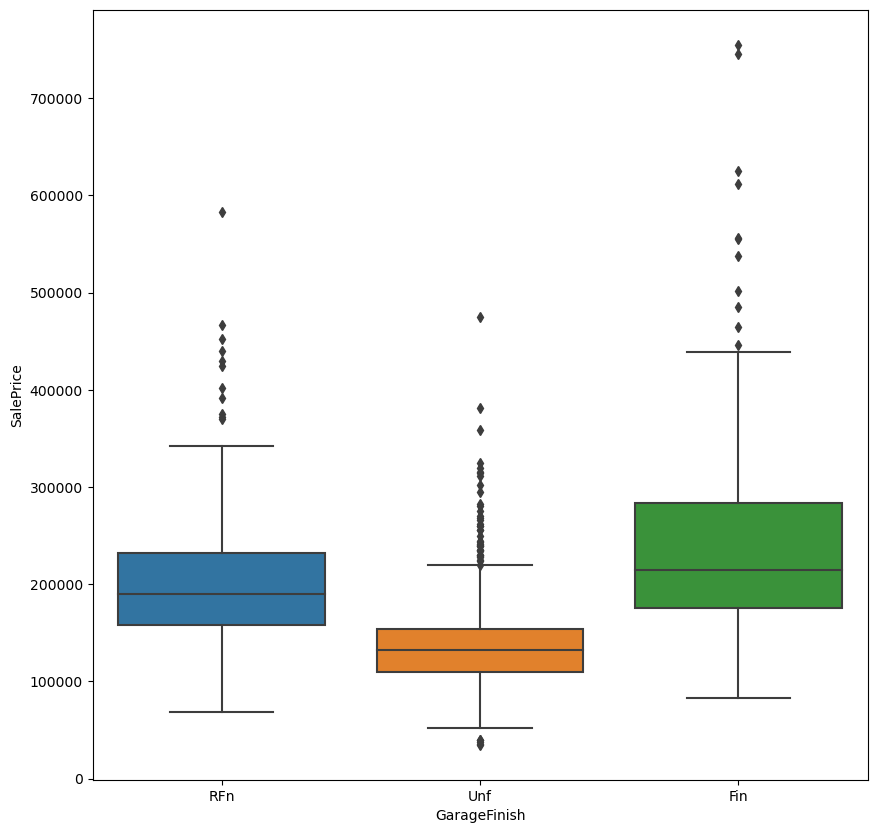

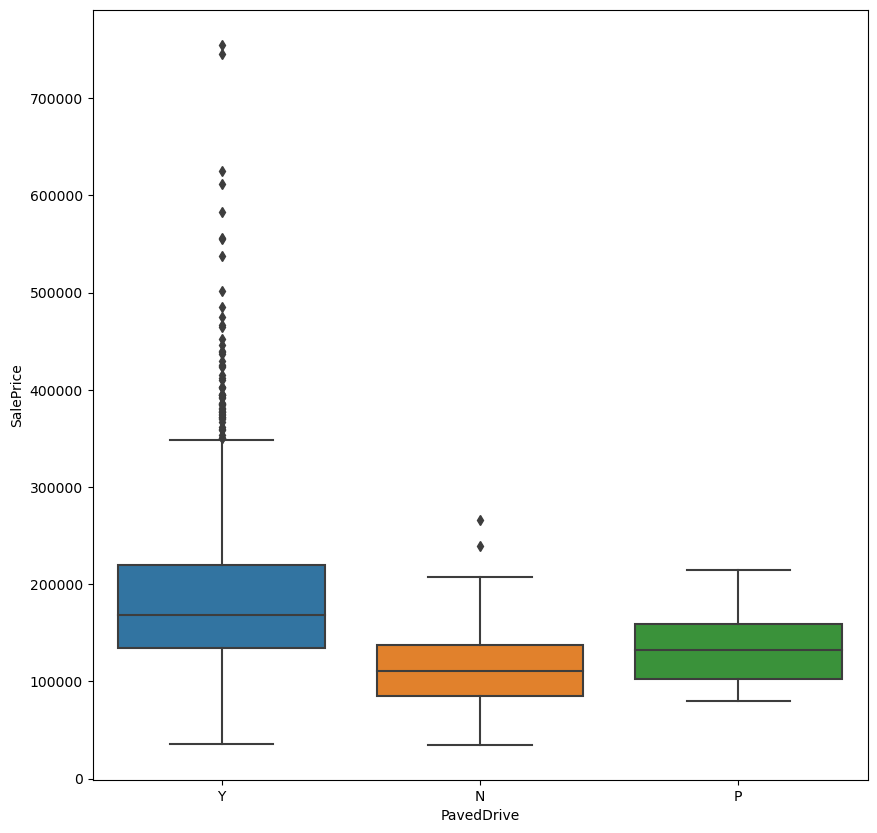

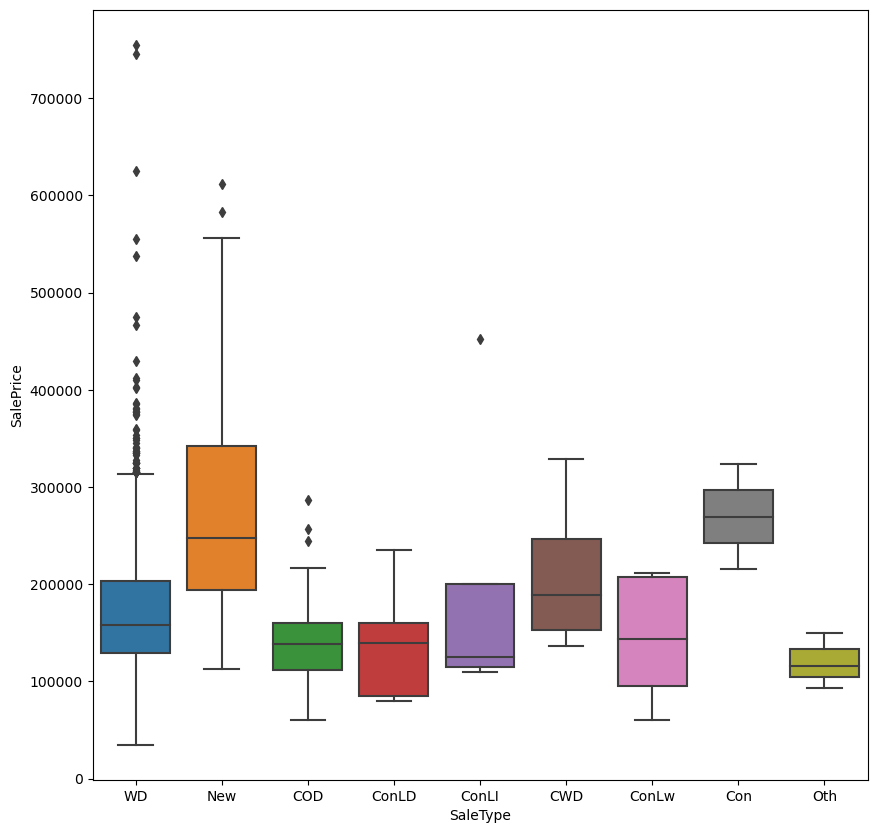

<Figure size 1000x1000 with 0 Axes>

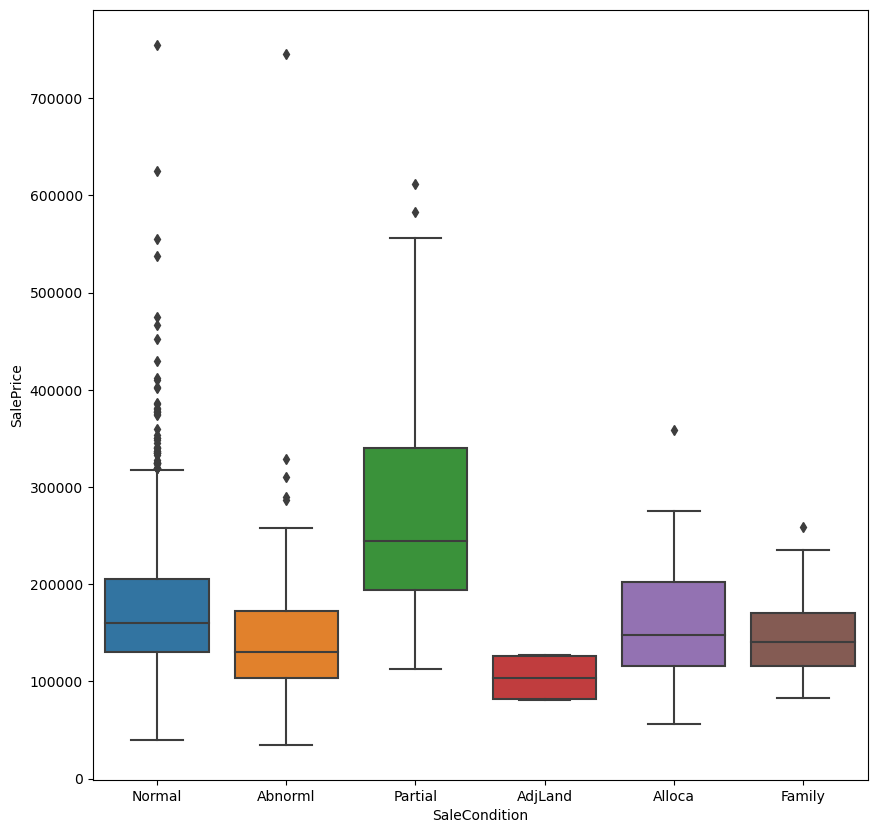

In [1834]:
#Ploting the graph for all Categorical variables
for index, col in enumerate(Catagorial_col_list):
    CategoryColPlots(Price, index, col, 'SalePrice')
    

## Step:2 Data Preperation

     1. Creating Dummy variables of all catergorical values.
     2. Spliting into train and test
     3. Rescaling of variables

In [1835]:
#Defining method for outliers  treatment
def dropOutliers(df, columns):
    list = []
    for col in columns:
        Q1 = df[col].quantile(.25)
        Q3 = df[col].quantile(.95)
        IQR = Q3-Q1
        df =  df[(df[col] >= (Q1-(1.5*IQR))) & (df[col] <= (Q3+(1.5*IQR)))] 
    return df

In [1836]:
dropOutliers(Price,Numerical_col_list)

MSSubClass MSZoning  LotArea LotShape LandContour LotConfig LandSlope  \
0             60       RL     8450      Reg         Lvl    Inside       Gtl   
1             20       RL     9600      Reg         Lvl       FR2       Gtl   
2             60       RL    11250      IR1         Lvl    Inside       Gtl   
3             70       RL     9550      IR1         Lvl    Corner       Gtl   
4             60       RL    14260      IR1         Lvl       FR2       Gtl   
...          ...      ...      ...      ...         ...       ...       ...   
1454          20       FV     7500      Reg         Lvl    Inside       Gtl   
1455          60       RL     7917      Reg         Lvl    Inside       Gtl   
1456          20       RL    13175      Reg         Lvl    Inside       Gtl   
1457          70       RL     9042      Reg         Lvl    Inside       Gtl   
1459          20       RL     9937      Reg         Lvl    Inside       Gtl   

     Neighborhood Condition1 BldgType  ... EnclosedPorch  ScreenPorch  MoSold  \
0         CollgCr       Norm     1Fam  ...             0            0       2   
1         Veenker      Feedr     1Fam  ...             0            0       5   
2         CollgCr       Norm     1Fam  ...             0            0       9   
3         Crawfor       Norm     1Fam  ...           272            0       2   
4         NoRidge       Norm     1Fam  ...             0            0      12   
...           ...        ...      ...  ...           ...          ...     ...   
1454      Somerst       Norm     1Fam  ...             0            0      10   
1455      Gilbert       Norm     1Fam  ...             0            0       8   
1456       NWAmes       Norm     1Fam  ...             0            0       2   
1457      Crawfor       Norm     1Fam  ...             0            0       5   
1459      Edwards       Norm     1Fam  ...             0            0       6   

     SaleType SaleCondition SalePrice YearBuilt_Age  YearRemodAdd_Age  \
0          WD        Normal    208500             7                 7   
1          WD        Normal    181500            34                34   
2          WD        Normal    223500             9                 8   
3          WD       Abnorml    140000            95                40   
4          WD        Normal    250000            10                10   
...       ...           ...       ...           ...               ...   
1454       WD        Normal    185000             6                 5   
1455       WD        Normal    175000            11                10   
1456       WD        Normal    210000            32                22   
1457       WD        Normal    266500            69                 4   
1459       WD        Normal    147500            45                45   

     GarageYrBlt_Age YrSold_Age  
0                  7          2  
1                 34          3  
2                  9          2  
3                 12          4  
4                 10          2  
...              ...        ...  
1454               6          1  
1455              11          3  
1456              32          0  
1457              69          0  
1459              45          2  

[1413 rows x 62 columns]

In [1837]:
Price.shape

(1460, 62)

In [1838]:
Price[Catagorial_col_list].head()

MSZoning LotShape LandContour LotConfig LandSlope Neighborhood Condition1  \
0       RL      Reg         Lvl    Inside       Gtl      CollgCr       Norm   
1       RL      Reg         Lvl       FR2       Gtl      Veenker      Feedr   
2       RL      IR1         Lvl    Inside       Gtl      CollgCr       Norm   
3       RL      IR1         Lvl    Corner       Gtl      Crawfor       Norm   
4       RL      IR1         Lvl       FR2       Gtl      NoRidge       Norm   

  BldgType HouseStyle RoofStyle  ... HeatingQC CentralAir Electrical  \
0     1Fam     2Story     Gable  ...        Ex          Y      SBrkr   
1     1Fam     1Story     Gable  ...        Ex          Y      SBrkr   
2     1Fam     2Story     Gable  ...        Ex          Y      SBrkr   
3     1Fam     2Story     Gable  ...        Gd          Y      SBrkr   
4     1Fam     2Story     Gable  ...        Ex          Y      SBrkr   

  KitchenQual Functional GarageType GarageFinish PavedDrive SaleType  \
0          Gd        Typ     Attchd          RFn          Y       WD   
1          TA        Typ     Attchd          RFn          Y       WD   
2          Gd        Typ     Attchd          RFn          Y       WD   
3          Gd        Typ     Detchd          Unf          Y       WD   
4          Gd        Typ     Attchd          RFn          Y       WD   

  SaleCondition  
0        Normal  
1        Normal  
2        Normal  
3       Abnorml  
4        Normal  

[5 rows x 31 columns]

In [1839]:
# Lets create dummy variables for the catagorial variables
Cat_dummies = pd.get_dummies(Price[Catagorial_col_list], drop_first=True)
Cat_dummies.head()


MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  \
0            0            0            1            0             0   
1            0            0            1            0             0   
2            0            0            1            0             0   
3            0            0            1            0             0   
4            0            0            1            0             0   

   LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
0             0             1                0                0   
1             0             1                0                0   
2             0             0                0                0   
3             0             0                0                0   
4             0             0                0                0   

   LandContour_Lvl  ...  SaleType_ConLI  SaleType_ConLw  SaleType_New  \
0                1  ...               0               0             0   
1                1  ...               0               0             0   
2                1  ...               0               0             0   
3                1  ...               0               0             0   
4                1  ...               0               0             0   

   SaleType_Oth  SaleType_WD  SaleCondition_AdjLand  SaleCondition_Alloca  \
0             0            1                      0                     0   
1             0            1                      0                     0   
2             0            1                      0                     0   
3             0            1                      0                     0   
4             0            1                      0                     0   

   SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
0                     0                     1                      0  
1                     0                     1                      0  
2                     0                     1                      0  
3                     0                     0                      0  
4                     0                     1                      0  

[5 rows x 167 columns]

In [1840]:
Price.shape

(1460, 62)

In [1841]:
# drop categorical variables for which dummies are creates
Price = Price.drop(list(Price[Catagorial_col_list].columns), axis=1)

In [1842]:
Price.head()
Price.shape

(1460, 31)

In [1843]:
# concat dummy variables with dataset Price
Price= pd.concat([Price, Cat_dummies], axis=1)

In [1844]:
Price.shape

(1460, 198)

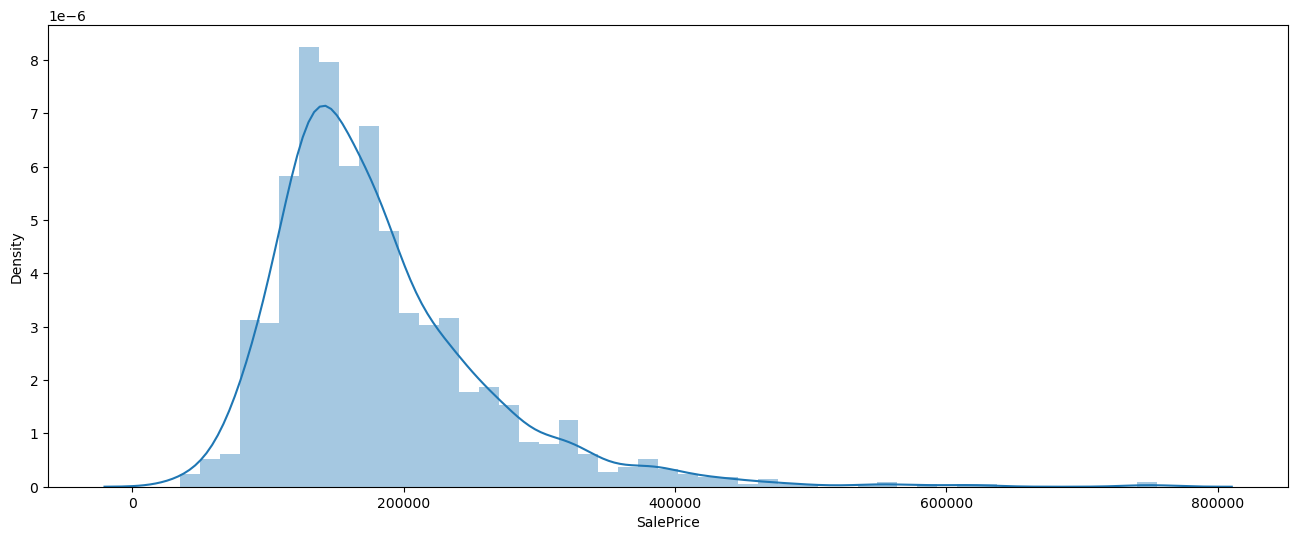

In [1845]:
# Plotting the graph to check the distribution of SalesPrice variable before scaling and Splitting
plt.figure(figsize=(16,6))
sns.distplot(Price.SalePrice)
plt.show()

In [1846]:
## Spliting the dataset into train and test for modeling

In [1847]:
df_train,df_test = train_test_split(Price,train_size=0.7,test_size=0.3,random_state=100)

 scaling doesn't impact the predictions,as we know there are two common ways of rescaling:
 1. Min-Max scaling
 2. Standardisation (mean-0, sigma-1)

In [1848]:
## Scaling the train dataset using minmax method
numerical_columns =Price.select_dtypes(include=np.number).columns.tolist()
scaler = MinMaxScaler()
df_train[numerical_columns] = scaler.fit_transform(df_train[numerical_columns])
df_test[numerical_columns] = scaler.transform(df_test[numerical_columns])

<Axes: xlabel='SalePrice', ylabel='Density'>

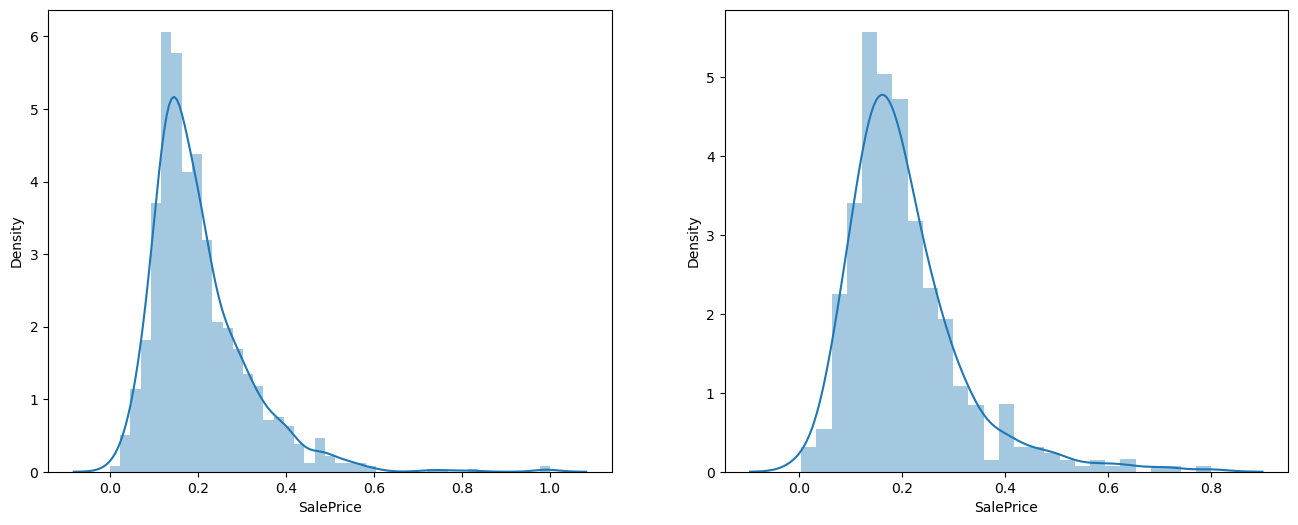

In [1849]:
# distribution after scaling the data
plt.figure(figsize=(16,6))
plt.subplot(121)
sns.distplot(df_train.SalePrice)
plt.subplot(122)
sns.distplot(df_test.SalePrice)

# Step 3: Training the Model

In [1850]:
## Let's divide into X and y sets for the model building.
y_train = df_train.pop('SalePrice')
X_train = df_train
y_test = df_test.pop('SalePrice')
X_test = df_test

In [1851]:
Price.shape

(1460, 198)

In [1852]:
### Using RFE to find the optimal number of feature
# Running RFE with the output number of the variable equal to 100
lm  = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm, n_features_to_select=100,step=1)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=100)

In [1853]:
rfe_scores = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))
rfe_scores.columns = ['Column_Names','Status','Rank']

In [1854]:
#Check RFE selected variables
rfe_sel_columns = list(rfe_scores[rfe_scores.Status==True].Column_Names)
rfe_sel_columns

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'BedroomAbvGr',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'YearBuilt_Age',
 'YearRemodAdd_Age',
 'GarageYrBlt_Age',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'LotShape_IR3',
 'LandContour_HLS',
 'LandContour_Low',
 'LandContour_Lvl',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LandSlope_Sev',
 'Neighborhood_BrDale',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_MeadowV',
 'Neighborhood_NPkVill',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_SWISU',
 'Neighborhood_SawyerW',
 'Neighborhood_Somerst',
 'Neighborhood_StoneBr',
 'Neighborhood_Veenker',
 'Condition1_Norm',
 'Condition1_PosA',
 'Condition1_PosN',
 'Condition1_RRAn',
 'BldgType_Duplex

In [1855]:

### Lets filter the train and test set for the RFE selected columns/
X_train = X_train[rfe_sel_columns]
X_test = X_test[rfe_sel_columns]

In [1856]:
ridge = Ridge(alpha=0.001)
ridge.fit(X_train,y_train)

y_train_pred = ridge.predict(X_train)
print(r2_score(y_train,y_train_pred))
y_test_pred = ridge.predict(X_test)
print(r2_score(y_test,y_test_pred))

0.8902790277571839
0.8559910362539224


In [1857]:
folds  = 5

hyper_params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

model = Ridge()

model_cv = GridSearchCV(estimator=model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        n_jobs = -1,
                        return_train_score=True)
                        

model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1.0, 5.0,
                                   10.0, 20.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [1858]:
cv_result_r = pd.DataFrame(model_cv.cv_results_)
cv_result_r['param_alpha'] = cv_result_r['param_alpha'].astype('float32')
cv_result_r.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_alpha  \
0       0.032129      0.010851         0.005261        0.000769        0.001   
1       0.026687      0.013312         0.005587        0.004050        0.010   
2       0.024051      0.006702         0.003737        0.001783        0.100   
3       0.014433      0.021907         0.007132        0.007120        0.200   
4       0.012927      0.007366         0.003339        0.002767        0.500   

             params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.001}           0.870962           0.743569           0.782027   
1   {'alpha': 0.01}           0.871376           0.743792           0.783103   
2    {'alpha': 0.1}           0.873574           0.745955           0.787461   
3    {'alpha': 0.2}           0.875262           0.748151           0.790555   
4    {'alpha': 0.5}           0.878657           0.753672           0.797312   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0           0.875803  ...         0.827871        0.054577                9   
1           0.875942  ...         0.828296        0.054458                8   
2           0.877089  ...         0.830494        0.053781                7   
3           0.878083  ...         0.832219        0.053133                6   
4           0.880172  ...         0.835945        0.051372                5   

   split0_train_score  split1_train_score  split2_train_score  \
0            0.889372            0.908632            0.904865   
1            0.889368            0.908630            0.904850   
2            0.889273            0.908563            0.904687   
3            0.889085            0.908417            0.904465   
4            0.888235            0.907736            0.903522   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0            0.888352            0.889151          0.896074         0.008803  
1            0.888350            0.889146          0.896069         0.008801  
2            0.888278            0.889049          0.895970         0.008792  
3            0.888109            0.888867          0.895789         0.008793  
4            0.887344            0.888084          0.894984         0.008798  

[5 rows x 21 columns]

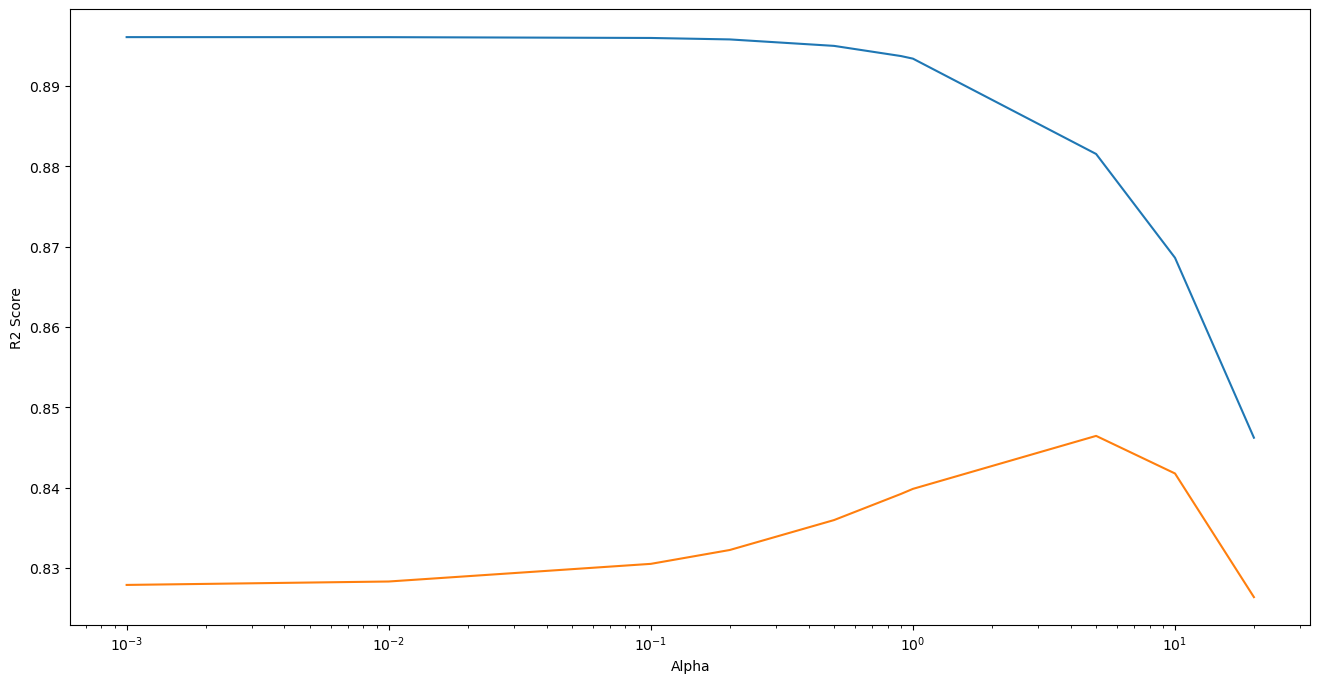

In [1859]:
# Plot showing comparision of test and train score
plt.figure(figsize=(16,8))
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_train_score'])
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_test_score'])
plt.xlabel('Alpha')
plt.xscale('log')
plt.ylabel('R2 Score')
plt.show()

In [1860]:
# Checking the best parameter(Alpha value)
model_cv.best_params_


{'alpha': 5.0}

In [1861]:
# After performing grid search we found the optimal alpha to be 20, so let's predict the test and train scores.
ridge = Ridge(alpha = 5.0)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print(r2_score(y_test,y_pred_test))


ls1=[]
r2_train_lr = r2_score(y_train,y_pred_train )
ls1.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
ls1.append(r2_test_lr)

0.8794600026778578
0.8544162742916209


In [1862]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = df_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']

In [1863]:
# Significant variables which predict price of house when used ridge
ridge_coef.sort_values(by = 'Coef',ascending = False).head(10)

Feaure      Coef
3        OverallCond  0.099612
11         GrLivArea  0.092591
12      BsmtFullBath  0.091285
42     LotConfig_FR3  0.078126
10          2ndFlrSF  0.066492
0         MSSubClass  0.048048
15          HalfBath  0.045333
43  LotConfig_Inside  0.043318
18        Fireplaces  0.043188
38   LandContour_Low  0.040887

## Lets try the Lasso regression model

In [1864]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = hyper_param, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1.0, 5.0,
                                   10.0, 20.0]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [1865]:
cv_result_l = pd.DataFrame(model_cv.cv_results_)

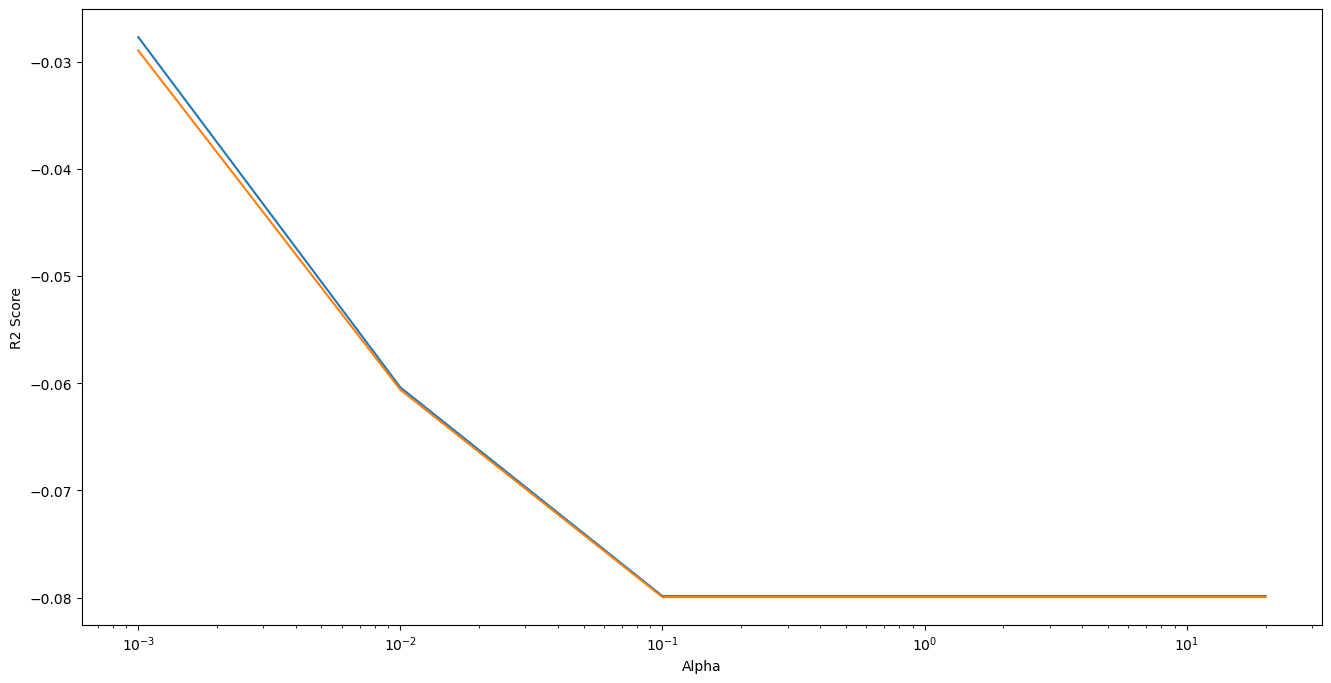

In [1866]:
# Plot showing comparision of test and train score
plt.figure(figsize=(16,8))
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_train_score'])
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_test_score'])
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.show()

In [1867]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.001}


In [1868]:
# After performing grid search we found the same alpha that ue use before
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))


ls2=[]
r2_train_lr = r2_score(y_train,y_train_pred )
ls2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_test_pred)
ls2.append(r2_test_lr)

0.8297288178248567
0.8142728074978638


In [1869]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = df_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']

In [1872]:
# Significant variables which predict price of house when used lasso
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

Featuere      Coef
12         BsmtFullBath  0.226183
3           OverallCond  0.190485
42        LotConfig_FR3  0.066155
0            MSSubClass  0.061263
18           Fireplaces  0.057714
17         TotRmsAbvGrd  0.036770
43     LotConfig_Inside  0.032423
83    HouseStyle_1Story  0.028505
15             HalfBath  0.016484
98  Exterior1st_CemntBd  0.012427

In [1783]:
resultTable = {'Metric':["R2 Score Train", "R2Score Test"],
              'Ridge regression':ls1}
rg_metric = pd.DataFrame(resultTable, columns=["Metric", 'Ridge regression'])
ls_metric = pd.Series(ls2, name ='Lasso regression')
final = pd.concat([rg_metric,ls_metric],axis=1)
final

Metric  Ridge regression  Lasso regression
0  R2 Score Train          0.879460          0.829729
1    R2Score Test          0.854416          0.814273

# Final Model

In [1784]:
# We have used Ridge for building the model as we got r2 score as 88 and 85 for train and test respectively
ridge = Ridge(alpha = 5.0)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.8794600026778578
0.8544162742916209


# Conclusion:

__These variables are significant in predicting the price of a house :__
- OverallCon::Rates the overall condition of the house
- GrLivArea::Above grade (ground) living area square feet
- BsmtFullBath::Basement full bathrooms	
- LotConfig_FR3::Lot configuration- Frontage on 3 sides of property
- 2ndFlrSF::Second floor square feet
- MSSubClass	::Identifies the type of dwelling involved in the sale.
- HalfBath	::Half baths above grade
- LotConfig_Insid::Lot configuration-Inside lot
- Fireplaces	::Number of fireplaces
- LandContour_Low:Flatness of the property Depression

__The optimal value of lambda for ridge and lasso regression are :__

Best alpha value for Lasso : 0.001

Best alpha value for Ridge : 5.0

Question 1::What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model 
if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

- Ridge - 5.0
- Lasso - 0.001

  Double the values of alpha
- Ridge - 10
- Lasso - 0.002

  Lets analyze the model with these alpha values

In [1790]:
# We have used Ridge for building the model as we got r2 score as 88 and 85 for train and test respectively
ridge = Ridge(alpha = 10.0)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

list1=[]
r2_train_lr = r2_score(y_train,y_pred_train )
list1.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
list1.append(r2_test_lr)

In [1791]:
# After performing grid search we found the same alpha that ue use before
lasso = Lasso(alpha=0.002)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

list2=[]
r2_train_lr = r2_score(y_train,y_train_pred )
list2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_test_pred)
list2.append(r2_test_lr)

__Comparing the Ridge and Lasso after double the vlaues of alpha__

In [1787]:
resultTable1 = {'Metric':["R2 Score Train", "R2 Score Test"],
              'Ridge regression':list1}
rg_metric = pd.DataFrame(resultTable1, columns=["Metric", 'Ridge regression'])
ls_metric = pd.Series(list2, name ='Lasso regression')
final = pd.concat([rg_metric,ls_metric],axis=1)
final

Metric  Ridge regression  Lasso regression
0  R2 Score Train          0.869387          0.781764
1   R2 Score Test          0.847304          0.760613

In [1788]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = df_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']

In [1789]:
# Significant variables which predict price of house when used ridge when alpha is doubled
ridge_coef.sort_values(by = 'Coef',ascending = False).head(10)

Feaure      Coef
3        OverallCond  0.087967
12      BsmtFullBath  0.074436
11         GrLivArea  0.074154
42     LotConfig_FR3  0.071454
0         MSSubClass  0.070023
10          2ndFlrSF  0.054496
15          HalfBath  0.045349
18        Fireplaces  0.040100
43  LotConfig_Inside  0.039386
17      TotRmsAbvGrd  0.038448

__Significant variables which predict price of house when used ridge when alpha is doubled__
- OverallCond	
- BsmtFullBath	
- GrLivArea		
- LotConfig_FR3	
- MSSubClass	
- 2ndFlrSF		
- HalfBath		
- Fireplaces	
- LotConfig_Inside
- TotRmsAbvGrd	
	
